<a href="https://colab.research.google.com/github/Da-Heon/Project/blob/main/01_%EC%98%A4%ED%8D%BC%EA%B8%B0%EB%8A%A5%EC%97%AC%EB%B6%80_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 환경 설정

In [2]:
# import
!pip install koreanize_matplotlib -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore')
pd.set_option('display.max_columns', None)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 58.7 MB/s eta 0:00:00


In [4]:
# 원본 데이터 읽어오기
data1_path = "/content/drive/MyDrive/데이터 분석/09_데이터모음집/log_2023.csv"
log2023_df = pd.read_csv(data1_path)

data2_path = "/content/drive/MyDrive/데이터 분석/09_데이터모음집/JobBookmark.csv"
bookmark_df = pd.read_csv(data2_path)

data3_path = "/content/drive/MyDrive/데이터 분석/09_데이터모음집/Application.csv"
application_df = pd.read_csv(data3_path)

# 1. AARRR 프레임워크

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Acquisition (유입)

```
우리는 2023년 수 많은 사람들 중에서 어떤 행동을 한 유저를 우리들의 고객으로 잡을 것인가?
채용 플랫폼의 목적은 채용지원이다! 그러기 위해서는 적어도 회원가입을 해야한다!
그래서 우리는 2023년 신규 회원가입을 한 사람을 고객으로 정의하고,
다른 데이터를 통해 2023년 전에 활동을 한 기록이 있으면 삭제를 하고 데이터셋을 EDA 해야한다!
```

### 1. 유입 정의

- 과정1.
    - log DataFrame을 분석하여 신규 회원가입 고객을 정의하고자 했습니다.
    - URL 컬럼에 'signup'이 포함된 데이터를 추출하여 고객의 log를 확인했으나, 공통 요소를 찾는 데 어려움이 있었습니다.
    - signup/step1, signup/step2, signup/step3 등의 값이 있었으나 사용 여부와 순서가 달라 어떤 과정의 log인지 확인할 수 없었습니다.
    - 이러한 이유로 해당 데이터로 신규 회원가입 고객을 특정하는 데 어려움이 있었습니다.

- 과정2.
    - 회원가입이 완료된 고객만 접근할 수 있는 자신의 프로필 페이지인 @user_id의 log가 남은 고객을 신규 회원가입 고객으로 정의했습니다.
    - 그러나 추가적인 데이터 분석에서 @user_id의 URL이 타인의 프로필에 접속해도 log에 남는다는 것을 확인하여, 고객 정의가 잘못되었음을 깨달았습니다.

- 최종 정의 내용
    - 지원자는 공고를 찾아보기 전과 지원하기 전에 공통적으로 'signup/detail' URL에 접속하는 것으로 확인하였고, 이는 'signup/detail' URL이 회원가입 페이지임을 유추하였습니다.
    - 최종적으로 'signup/detail' URL에 접속한 지원자를 신규 회원가입 고객으로 정의하였습니다.
    - 또한, 분석 오류 방지를 위해 첫 회원 가입 시점 이전에 북마크를 했거나, 지원서를 제출한 기록이 있는 유저는 신규 유입 고객에서 제외하였습니다.

### 2. EDA

In [ ]:
# URL 컬럼에 'signup/detail' 값만 추출
detail_log = log2023_df[log2023_df['URL'] == 'signup/detail']
detail_log

,Unnamed: 0,user_uuid,URL,timestamp,date,response_code,method
11609,11609,7687ce86-9ccf-46b9-8cac-5d4dbfb631f8,signup/detail,2023-11-27 09:21:26.294057 UTC,2023-11-27,302,GET
12278,12278,2e312b5f-b5d0-464e-9c7e-50016c7628ff,signup/detail,2023-12-28 06:17:17.290127 UTC,2023-12-28,302,GET
14359,14359,2583bcc4-c1a4-4473-ae56-16b4916edaaa,signup/detail,2023-12-14 11:42:32.406088 UTC,2023-12-14,302,GET
26472,26472,57e28997-6198-4df7-aab9-f33fb1ceee1c,signup/detail,2023-03-14 00:41:59.376332 UTC,2023-03-14,302,GET
27848,27848,a0e3db58-701a-45b5-bdf2-6820eb5c0186,signup/detail,2023-10-05 15:48:59.878872 UTC,2023-10-06,302,GET
...,...,...,...,...,...,...,...
7184920,7184920,864836ac-ed4f-46ce-99d0-c354a27ad19e,signup/detail,2023-03-31 02:01:06.348879 UTC,2023-03-31,302,GET
7185827,7185827,31d0f51d-a771-4977-a33a-24fb4d403c6d,signup/detail,2023-02-01 03:28:34.487548 UTC,2023-02-01,302,GET
7185997,7185997,baf3c121-cbae-42ae-88f3-2a016a096193,signup/detail,2023-02-01 12:18:02.038429 UTC,2023-02-01,302,GET
7186531,7186531,9619197d-f6c3-4ea4-bbc6-477b40d02c3e,signup/detail,2023-12-27 22:57:40.860005 UTC,2023-12-28,302,GET


In [ ]:
# timestamp 데이터 타입 변경
detail_log['timestamp'] = pd.to_datetime(detail_log['timestamp'])

In [ ]:
start_date = '2023-01-01'
end_date = '2023-12-31'

In [ ]:
# 2023년에 대한 데이터만 추출
detail_log = detail_log[(detail_log['timestamp'] >= start_date) & (detail_log['timestamp'] <= end_date)]

In [ ]:
# user_uuid 중복 제거
detail_log_sorted = detail_log.drop_duplicates(subset='user_uuid')

In [ ]:
# 'signup/detail'기록이 있는 user_uuid 고유값 추출 완료
user_uuids = detail_log_sorted['user_uuid'].unique()

In [ ]:
# 'signup/detail'기록이 있는 user_uuid의 2023 log 데이터 전처리 완료
detail_df = log2023_df[log2023_df['user_uuid'].isin(user_uuids)]

In [ ]:
detail_df = detail_df[(detail_df['timestamp'] >= start_date) & (detail_df['timestamp'] <= end_date)]

In [ ]:
# 불필요한 컬럼 제거
detail_df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
# 결측치 제거
detail_df = detail_df.dropna()

In [ ]:
# 인덱스 정렬
detail_df.reset_index(drop=True, inplace=True)

In [ ]:
# JobBookmark 데이터프레임에서 2023년 이전에 기록이 있는 ‘user_uuid' 값 추출
user_bookmark_df = bookmark_df[bookmark_df['user_uuid'].isin(user_uuids)]

In [ ]:
# 'cdate' 데이터 타입 변경
user_bookmark_df['cdate'] = pd.to_datetime(user_bookmark_df['cdate'])

In [ ]:
# 신규 회원 가입의 북마크 이력 중 2023년 이전 기록만 추출
bookmark_del = user_bookmark_df[user_bookmark_df['cdate'] < '2023-01-01']

In [ ]:
# 2023년 이전에 북마크 기록이 없는 user_uuid 에 대한 로그 데이터만 추출
detail_df_bookmark = detail_df[~detail_df['user_uuid'].isin(bookmark_del['user_uuid'])]

In [ ]:
# Application 데이터프레임에서 2023년 이전에 기록이 있는 ‘user_uuid' 값
user_application_df = application_df[application_df['user_uuid'].isin(user_uuids)]

In [ ]:
# 'cdate' 데이터 타입 변경
user_application_df['cdate'] = pd.to_datetime(user_application_df['cdate'], format='mixed')

In [ ]:
# 신규 회원 가입의 지원서 제출 이력 중 2023년 이전 기록만 추출
application_del = user_application_df[user_application_df['cdate'] < '2023-01-01']

In [ ]:
# 2023년 이전에 지원서 제출 이력이 없는 user_uuid 에 대한 로그 데이터만 추출
acquisition_df = detail_df_bookmark[~detail_df_bookmark['user_uuid'].isin(application_del['user_uuid'])]

In [ ]:
acquisition_total = acquisition_df['user_uuid'].nunique()
print(f'유입 고객의 수는 {acquisition_total}명 입니다.')

유입 고객의 수는 2061명 입니다.


## 2. Activation (활성화)

```
이렇게 2023년 신규 회원가입한 사람들만 추출해서 고객을 정의했다!
그렇다면, 유입된 고객들이 어떤 행동을 해야 우리 핵심가치를 이용했다고 할 수 있을까?
즉, 아하모먼트는 무엇일까? 채용 플랫폼은 지원을 했을 때가 가장 가치가 있다고 생각한다!
그래서 우리는 핵심 가치를 채용공고를 지원으로 정의하고, 아하 모먼트를 경험한 고객을 알아볼까?
```

### 1. 아하 모먼트(핵심 가치) 정의

- 과정1.
    - Acquisition(유입) 단계에서 정의된 고객의 로그 데이터를 탐색 중,
    - ‘jobs/id/apply/complete’값이‘지원을 완료하다’라는 의미로 직관적으로 해석되어 해당 값을 가진 고객을 공고에 지원한 고객으로 정의하였습니다.
    - 그러나 ‘jobs/id/apply/complete’ 값이 2023년 5월 24일 이전에는 존재하지 않는다는 사실을 확인하였고, 이를 사이트에서 2023년 5월 24일에 새롭게 추가한 이벤트로 판단하였습니다.

- 과정2.
    - 지원서 제출 기록이 포함된 application DataFrame의 'cdate' 컬럼과 log_2023 DataFrame의 'timestamp' 컬럼을 비교한 결과,
    - log_2023 DataFrame의 URL 컬럼에 ‘api/jobs/id/apply/step4’ 값이 나타난 로그의 'timestamp'와 application DataFrame의 'cdate'가 일치하는 것으로 나타났습니다.
    - 이를 바탕으로 ‘api/jobs/id/apply/step4’ 값을 핵심 가치인 채용 공고 지원 행동으로 판단하여 activation 단계의 EDA를 진행하였습니다.

- 과정3.
    - 데이터 전처리 과정 중, 신규 회원 가입 이전에 공고 지원을 한 이력이 있는 경우가 발견되어,
    - 분석 오류 방지를 위해 2023년 최초 회원 가입 시점 이전의 로그 기록은 삭제 후 진행하였습니다.

### 2. EDA

In [ ]:
# acquisition 고객에 대한 로그 데이터프레임 'timestamp' 데이터 타입 변경
# ' UTC' → '+00:00' 변환
acquisition_df['timestamp'] = acquisition_df['timestamp'].str.replace(' UTC', '+00:00')

# datetime으로 변환
acquisition_df['timestamp'] = pd.to_datetime(acquisition_df['timestamp'], errors='coerce')

In [ ]:
acquisition_df_copy = acquisition_df.copy()

In [ ]:
# 2023년 최초 회원 가입 시점 이전의 로그 기록은 삭제

rows_to_delete = []

for user_id, group in acquisition_df_copy.groupby('user_uuid'):
    # 시간 순으로 정렬
    group = group.sort_values('timestamp')

    # 첫 signup/detail 찾기
    signup_row = group[group['URL'] == 'signup/detail'].head(1)

    # signup/detail이 존재하는 경우에만 처리
    if not signup_row.empty:
        first_signup_time = signup_row['timestamp'].iloc[0]

        # 해당 시간보다 이전에 찍힌 apply 로그 찾기
        early_apply_rows = group[
            (group['URL'] == 'api/jobs/id/apply/step4') &
            (group['timestamp'] < first_signup_time)
        ]

        # 삭제할 인덱스 저장
        rows_to_delete.extend(early_apply_rows.index)

In [ ]:
acquisition_df_copy = acquisition_df_copy.drop(index=rows_to_delete).reset_index(drop=True)

In [ ]:
application_df.head()

,Unnamed: 0,cdate,company_uuid,job_uuid,user_uuid,application_uuid
0,0,2017-02-25 23:45:01,de4b3596-b4ab-47cd-b8ea-6f9e14170064,459e461d-a571-4ed3-8751-8f4cb5b9ff37,b0329bd7-fc45-4e83-993a-b73bd9d3549c,59c42363-f764-4cbd-aafd-20eb663ea5d7
1,1,2020-11-23 14:46:07.329731,f6156b12-d4d7-469f-84be-31799c765211,e5ed4f4a-08aa-4f2d-9042-1e9bbd36803f,b0329bd7-fc45-4e83-993a-b73bd9d3549c,425db0e8-87f8-4b4d-8248-7f24c31d49d3
2,2,2017-10-28 22:30:10.631568,2ed05b18-c735-474a-9faa-02095b25729a,0f636d7a-53f7-485e-8a08-33253ddab380,b0329bd7-fc45-4e83-993a-b73bd9d3549c,be4d9e85-dc53-4e70-90af-64d2d6b117d2
3,3,2017-07-03 17:40:05.317255,3d6730ee-b869-47b7-90c6-1e074e4eb15b,3cade56a-6354-411a-82a6-f2c7774539c1,b0329bd7-fc45-4e83-993a-b73bd9d3549c,d43879d1-c424-4192-9eae-4537fa6687cb
4,4,2017-02-10 10:53:39,de4b3596-b4ab-47cd-b8ea-6f9e14170064,459e461d-a571-4ed3-8751-8f4cb5b9ff37,a7593a15-b93e-4bc3-91bf-e4074c931d33,61873fd7-f075-44c0-90fe-f6521226550d


In [ ]:
# '지원 완료' 기록이 있는 유저 기록 추출
activation_df_sorted = acquisition_df_copy[(acquisition_df_copy['URL'] == 'api/jobs/id/apply/step4') & (acquisition_df_copy['response_code'] == 200)]
activation_df_sorted

,user_uuid,URL,timestamp,date,response_code,method
246,7687ce86-9ccf-46b9-8cac-5d4dbfb631f8,api/jobs/id/apply/step4,2023-12-17 10:01:54.120376+00:00,2023-12-17,200,POST
321,7687ce86-9ccf-46b9-8cac-5d4dbfb631f8,api/jobs/id/apply/step4,2023-12-10 13:43:38.294498+00:00,2023-12-10,200,POST
430,7687ce86-9ccf-46b9-8cac-5d4dbfb631f8,api/jobs/id/apply/step4,2023-12-24 12:00:46.868657+00:00,2023-12-24,200,POST
628,2e312b5f-b5d0-464e-9c7e-50016c7628ff,api/jobs/id/apply/step4,2023-12-28 19:59:45.399763+00:00,2023-12-29,200,POST
810,2583bcc4-c1a4-4473-ae56-16b4916edaaa,api/jobs/id/apply/step4,2023-12-29 13:27:23.359941+00:00,2023-12-29,200,POST
...,...,...,...,...,...,...
1790381,d0e19142-945b-4e4f-8a08-38e1bbc1e155,api/jobs/id/apply/step4,2023-04-05 04:51:30.259661+00:00,2023-04-05,200,POST
1790514,5e4cd7af-d86e-41e2-a8b5-8e23d26c0dec,api/jobs/id/apply/step4,2023-10-29 05:38:11.433891+00:00,2023-10-29,200,POST
1790643,6e312b0c-f631-4d24-a504-22b66f2fc420,api/jobs/id/apply/step4,2023-03-20 07:27:17.663942+00:00,2023-03-20,200,POST
1790899,baf3c121-cbae-42ae-88f3-2a016a096193,api/jobs/id/apply/step4,2023-02-01 12:36:34.812215+00:00,2023-02-01,200,POST


In [ ]:
# activation 해당 유저 고유값 추출
activ_user_uuid_unique = activation_df_sorted['user_uuid'].unique()

In [ ]:
# activation 로그 데이터프레임 생성
activation_df = acquisition_df_copy[acquisition_df_copy['user_uuid'].isin(activ_user_uuid_unique)]

In [ ]:
activation_total = activation_df['user_uuid'].nunique()
print(f'활성화 고객의 수는 {activation_total}명 입니다.')

활성화 고객의 수는 2001명 입니다.


## 3. Retention (유지)

```
핵심 가치를 '지원하기'로 정의하여 activation 프레임 구성 완료!
그렇다면, 핵심가치를 경험한 고객들의 retention은 어떨까?
채용 플랫폼 이용에 대한 retention 이 얼마나 되는지 분석해보자!
```

### 1. 리텐션 정의

- 우리의 핵심가치인 '지원하기'를 경험한 고객들의 첫 시점 이후의 로그를 추출하여 사용자들에 대한 행동 패턴을 분석해보았습니다.\
(첫 지원 이후 유지에 대한 분석)
- 채용 플랫폼 이용에 대한 행동을 정의하여 그 행동을 한 유저들에 대한 리텐션을 분석하였습니다.
- 리텐션 행동 정의는 다음과 같습니다. (프로필, 이력서, 기업 탐색, 공고 탐색, 지원 단계, 북마크)
- 아래에 해당하는 행동을 한번이라도 한 유저는 유지 고객이라고 정의하였습니다.

```
retention_keywords = [
    "api/users/id/education", "api/users/id/career", "api/users/id/project",
    "api/users/id/image", "api/users/id/resume", "api/search/companies",
    "companies/company_id/jobs", "api/companies/id/view", "jobs/id",
    "jobs/id/apply", "api/users/id/sns"
]
```

- 유형별 리텐션 분석을 진행하였습니다.
    - 월, 주차별로 범위 리텐션 분석을 진행하였습니다.
    - 일별로 롤링 리텐션 분석을 진행하였습니다.

### 2. EDA

In [ ]:
activation_df_copy = activation_df.copy()

In [ ]:
# 첫 지원 이휴 로그 데이터들만 추출

# '지원 완료' 로그 필터링
step4_logs = activation_df_copy[activation_df_copy["URL"].str.contains("api/jobs/id/apply/step4")]

# 사용자별 첫 번째 지원 완료 시점 추출
first_apply = step4_logs.groupby("user_uuid")["timestamp"].min().reset_index()
first_apply.columns = ["user_uuid", "first_apply_time"]

# 원본 로그에 merge
df_with_apply = activation_df_copy.merge(first_apply, on="user_uuid", how="left")

# 첫 지원 완료 이후의 로그만 필터링
df_with_apply_copy = df_with_apply[df_with_apply["timestamp"] > df_with_apply["first_apply_time"]].copy()

# 필터링 확인
df_with_apply_copy['user_uuid'].nunique()

1995

In [ ]:
retention_user = df_with_apply_copy['user_uuid'].nunique()
print(f'{activation_total - retention_user}명은 첫 지원 이후 이탈자 수 입니다.')
print(f'따라서, {retention_user}명에 대한 리텐션 분석이 가능합니다.')

6명은 첫 지원 이후 이탈자 수 입니다.
따라서, 1995명에 대한 리텐션 분석이 가능합니다.


In [ ]:
# 리텐션 행동을 정의하는 키워드
# 프로필 수정
# 이력서
# 기업 검색
# 지원 시도
# 기업 정보 확인
# 북마크
retention_keywords = [
    "api/users/id/education", "api/users/id/career", "api/users/id/project",
    "api/users/id/image", "api/users/id/resume", "api/search/companies",
    "companies/company_id/jobs", "api/companies/id/view", "jobs/id",
    "jobs/id/apply", "api/users/id/sns", 'api/jobs/id/bookmark'
]

# 1. 리텐션 행동이 포함된 로그만 필터링
retention_df = df_with_apply_copy[df_with_apply_copy["URL"].apply(
    lambda x: any(keyword in x for keyword in retention_keywords)
)].copy()

# 2. 주차 계산 (지원 완료일 기준으로 몇 주차인지)
retention_df["weeks_since_support"] = ((retention_df["timestamp"] - retention_df["first_apply_time"]).dt.days // 7)

# 3. cohort 생성 (지원 완료일을 주차 단위로 변환하여 그룹화)
retention_df["cohort_week"] = retention_df["first_apply_time"].dt.to_period("W").apply(lambda r: r.start_time)

# 4. 주차별 사용자 수 집계
retention_counts = retention_df.groupby(["cohort_week", "weeks_since_support"])["user_uuid"].nunique().unstack(fill_value=0)

# 5. cohort 별 초기 사용자 수 (Week 0 기준)
cohort_sizes = retention_counts[0]

# 6. 클래식 리텐션 계산
retention_rate = retention_counts.divide(cohort_sizes, axis=0).round(4)

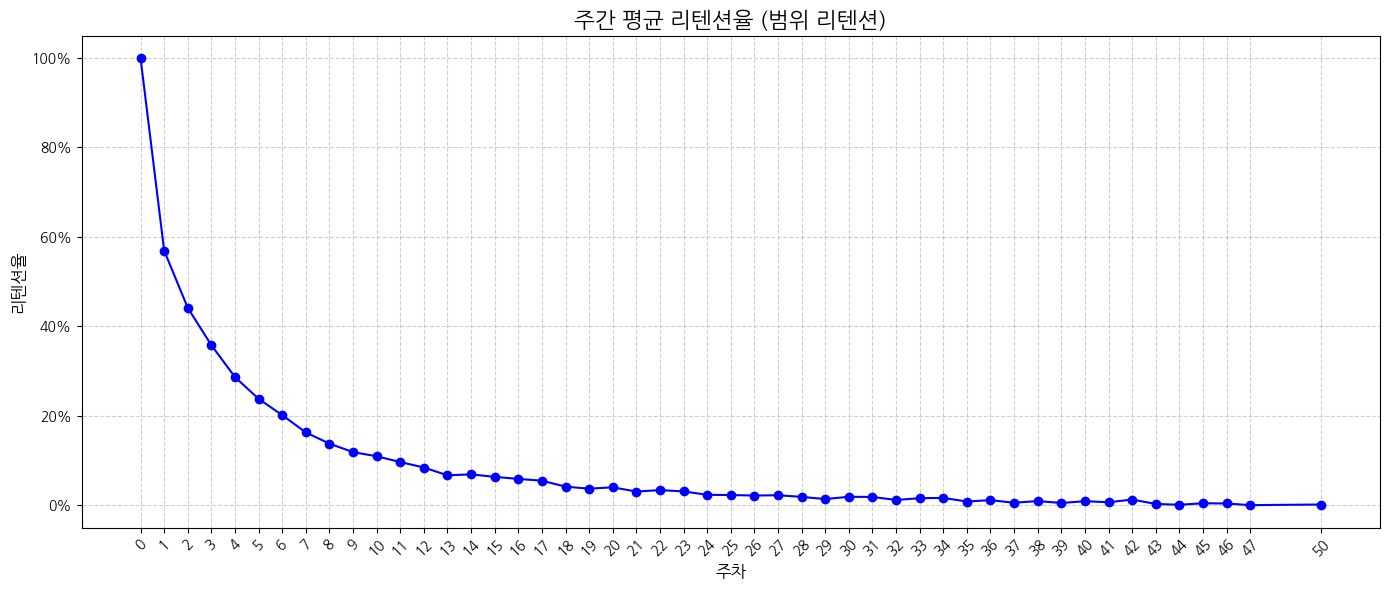

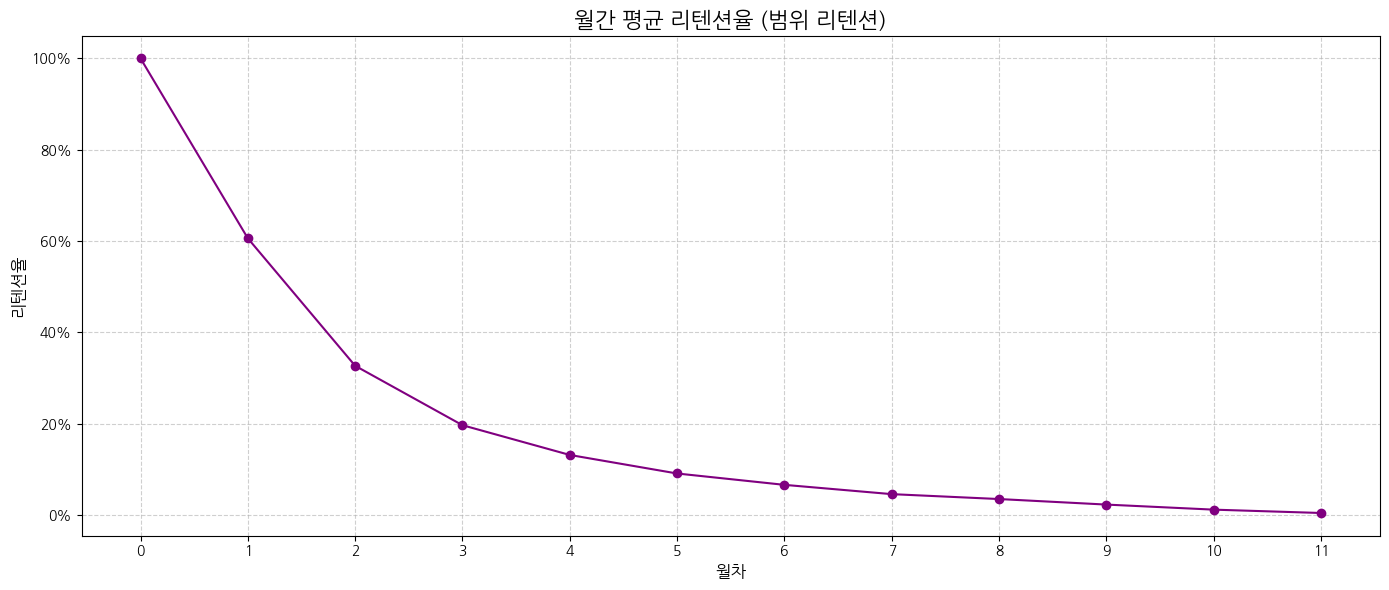

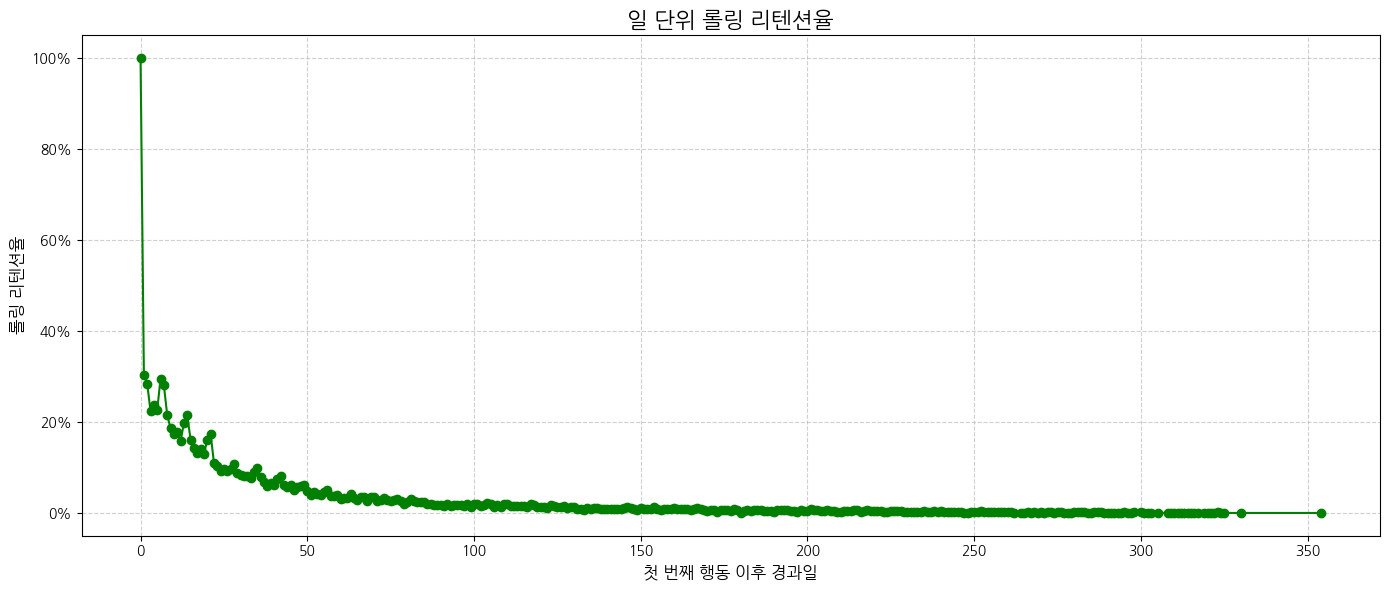

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib # 설치 및 임포트하여 한글 라벨이 표시되도록 합니다.

# df_with_apply_copy가 이미 정의되어 있고 필요한 데이터
# 'user_uuid', 'timestamp', 'URL', 'first_apply_time'을 포함하고 있다고 가정합니다.

retention_keywords = [
    "api/users/id/education", "api/users/id/career", "api/users/id/project",
    "api/users/id/image", "api/users/id/resume", "api/search/companies",
    "companies/company_id/jobs", "api/companies/id/view", "jobs/id",
    "jobs/id/apply", "api/users/id/sns", 'api/jobs/id/bookmark'
]

# 1. 리텐션 키워드를 포함하는 로그만 필터링합니다.
retention_df = df_with_apply_copy[df_with_apply_copy["URL"].apply(
    lambda x: any(keyword in x for keyword in retention_keywords)
)].copy()

# 타임스탬프가 datetime 형식인지 확인합니다.
retention_df['timestamp'] = pd.to_datetime(retention_df['timestamp'])
retention_df['first_apply_time'] = pd.to_datetime(retention_df['first_apply_time'])

# --- 주간 리텐션 분석 ---

# 첫 번째 지원 이후 주차를 계산합니다.
retention_df["weeks_since_support"] = ((retention_df["timestamp"] - retention_df["first_apply_time"]).dt.days // 7)

# 주간 코호트를 생성합니다.
retention_df["cohort_week"] = retention_df["first_apply_time"].dt.to_period("W").apply(lambda r: r.start_time)

# 코호트 주차 및 첫 번째 지원 이후 주차별 고유 사용자 수를 집계합니다.
weekly_retention_counts = retention_df.groupby(["cohort_week", "weeks_since_support"])["user_uuid"].nunique().unstack(fill_value=0)

# 코호트 크기 (0주차 사용자)를 계산합니다.
weekly_cohort_sizes = weekly_retention_counts[0]

# 주간 리텐션율을 계산합니다.
weekly_retention_rate = weekly_retention_counts.divide(weekly_cohort_sizes, axis=0)

# 전체 평균 주간 리텐션을 계산합니다.
weekly_average_retention = weekly_retention_rate.mean(axis=0)

# --- 월간 리텐션 분석 ---

# 월간 코호트를 생성합니다.
retention_df["cohort_month"] = retention_df["first_apply_time"].dt.to_period("M")

# 첫 번째 지원 이후 월을 계산합니다.
retention_df['months_since_support'] = ((retention_df['timestamp'].dt.to_period('M') - retention_df['first_apply_time'].dt.to_period('M')).apply(lambda x: x.n))

# 코호트 월 및 첫 번째 지원 이후 월별 고유 사용자 수를 집계합니다.
monthly_retention_counts = retention_df.groupby(["cohort_month", "months_since_support"])["user_uuid"].nunique().unstack(fill_value=0)

# 코호트 크기 (0월차 사용자)를 계산합니다.
monthly_cohort_sizes = monthly_retention_counts[0]

# 월간 리텐션율을 계산합니다.
monthly_retention_rate = monthly_retention_counts.divide(monthly_cohort_sizes, axis=0)

# 전체 평균 월간 리텐션을 계산합니다.
monthly_average_retention = monthly_retention_rate.mean(axis=0)


# --- 시각화 ---

# 주간 리텐션 플롯
plt.figure(figsize=(14, 6))
plt.plot(weekly_average_retention.index, weekly_average_retention.values, marker='o', color='blue')
plt.title("주간 평균 리텐션율 (범위 리텐션)", fontsize=16)
plt.xlabel("주차", fontsize=12)
plt.ylabel("리텐션율", fontsize=12)
plt.xticks(ticks=weekly_average_retention.index, labels=weekly_average_retention.index, rotation=45)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 월간 리텐션 플롯
plt.figure(figsize=(14, 6))
plt.plot(monthly_average_retention.index, monthly_average_retention.values, marker='o', color='purple')
plt.title("월간 평균 리텐션율 (범위 리텐션)", fontsize=16)
plt.xlabel("월차", fontsize=12)
plt.ylabel("리텐션율", fontsize=12)
plt.xticks(ticks=monthly_average_retention.index, labels=monthly_average_retention.index, rotation=0)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- 롤링 리텐션 플롯 (일 단위) ---
# 이것은 첫 번째 행동 이후 특정 날짜에 *활동하는* 사용자 비율을 계산합니다.
# 이는 위에서 계산한 '범위 리텐션'(기간(주/월) 내 *언제든지* 활동하는 사용자 비율)과는 약간 다릅니다.

# 첫 번째 지원 이후 일수를 계산합니다.
retention_df["days_since_support"] = (retention_df["timestamp"] - retention_df["first_apply_time"]).dt.days

# 각 사용자의 첫 번째 행동 타임스탬프를 가져옵니다.
first_action_time = retention_df.groupby('user_uuid')['timestamp'].min().reset_index()
first_action_time.columns = ['user_uuid', 'first_action_timestamp']

# 첫 번째 행동 타임스탬프를 retention_df에 병합합니다.
rolling_retention_df = retention_df.merge(first_action_time, on='user_uuid', how='left')

# 첫 번째 행동 이후 일수를 계산합니다 (롤링 리텐션용).
rolling_retention_df['days_since_first_action'] = (rolling_retention_df['timestamp'] - rolling_retention_df['first_action_timestamp']).dt.days

# 롤링 리텐션의 경우, 첫 번째 행동에 대해 특정 날짜에 활동하는 사용자에게 관심이 있습니다.
# 첫 번째 행동에 대해 각 날짜에 활동하는 고유 사용자를 가져옵니다.
daily_active_users = rolling_retention_df.groupby('days_since_first_action')['user_uuid'].nunique().reset_index()
daily_active_users.columns = ['days_since_first_action', 'active_users']

# 첫 번째 행동을 수행한 총 사용자 수를 가져옵니다.
total_initial_users = rolling_retention_df['user_uuid'].nunique()

# 롤링 리텐션율을 계산합니다: X일차 활동 사용자 수 / 총 초기 사용자 수
daily_active_users['rolling_retention_rate'] = daily_active_users['active_users'] / total_initial_users

# 롤링 리텐션 플롯
plt.figure(figsize=(14, 6))
plt.plot(daily_active_users['days_since_first_action'], daily_active_users['rolling_retention_rate'], marker='o', color='green')
plt.title("일 단위 롤링 리텐션율", fontsize=16)
plt.xlabel("첫 번째 행동 이후 경과일", fontsize=12)
plt.ylabel("롤링 리텐션율", fontsize=12)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

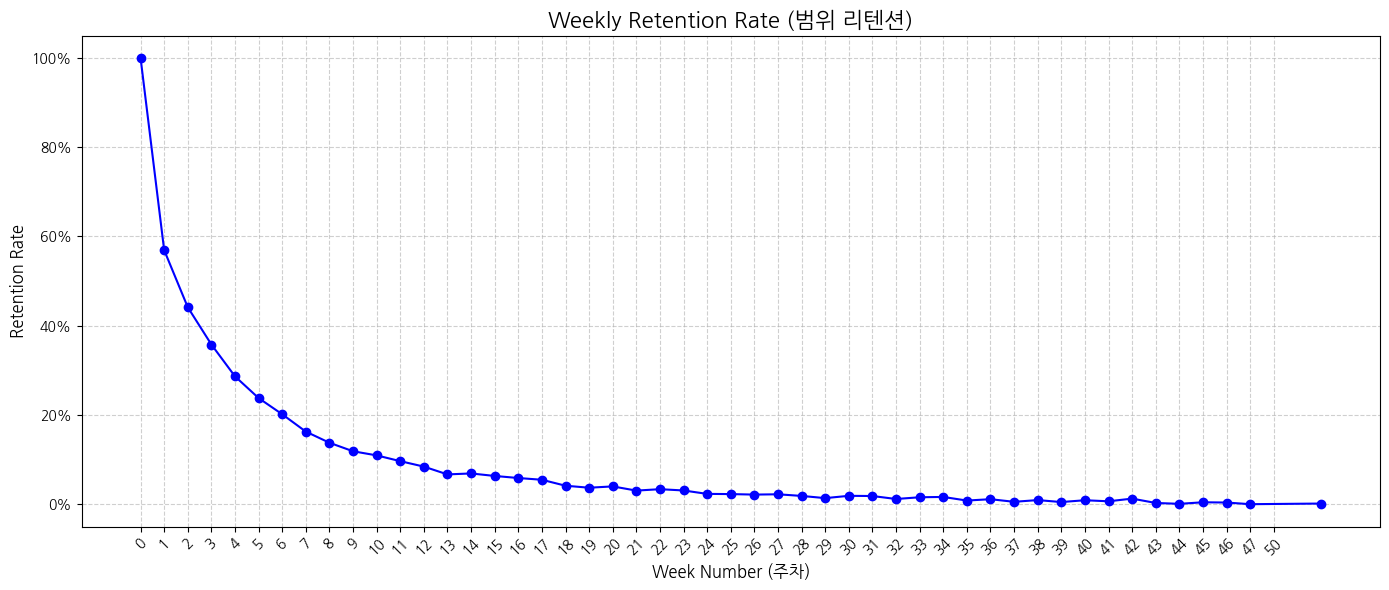

In [ ]:
# 주차별 전체 cohort 평균 리텐션율 계산
weekly_average_retention = retention_rate.mean(axis=0)

# 범위 리텐션 그래프 스타일로 시각화
plt.figure(figsize=(14, 6))
plt.plot(weekly_average_retention.index, weekly_average_retention.values, marker='o', color='blue')
plt.title("Weekly Retention Rate (범위 리텐션)", fontsize=16)
plt.xlabel("Week Number (주차)", fontsize=12)
plt.ylabel("Retention Rate", fontsize=12)
plt.xticks(ticks=range(len(weekly_average_retention)), labels=weekly_average_retention.index, rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)

# y축 퍼센트로 표현
plt.gca().set_yticklabels(['{:.0%}'.format(y) for y in plt.gca().get_yticks()])
plt.tight_layout()
plt.show()


In [ ]:
# 범위 리텐션 그래프를 위한 주차별 평균 리텐션율 DataFrame 생성
retention_curve_df = pd.DataFrame({
    "week_number": weekly_average_retention.index,
    "average_retention_rate": weekly_average_retention.values
})

# retention_rate는 0~1 범위 값이므로 퍼센트(%) 형식으로 보기 좋게 변환
retention_curve_df["average_retention_rate(%)"] = (retention_curve_df["average_retention_rate"] * 100).round(2)

retention_curve_df

,week_number,average_retention_rate,average_retention_rate(%)
0,0,1.000000,100.00
1,1,0.569351,56.94
2,2,0.441423,44.14
3,3,0.357938,35.79
4,4,0.286623,28.66
5,5,0.237981,23.80
6,6,0.201702,20.17
7,7,0.162858,16.29
8,8,0.137900,13.79
9,9,0.118830,11.88


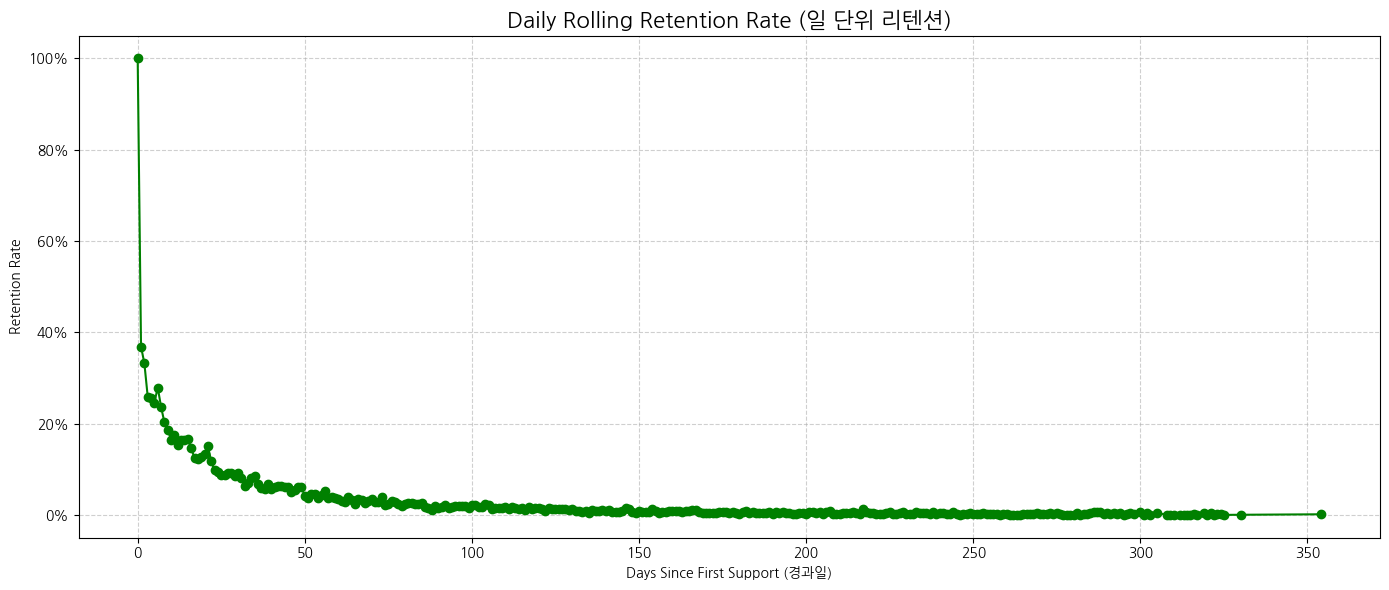

In [ ]:
# 일 단위 리텐션을 위한 준비
# 먼저 지원 후 며칠이 지났는지 계산
retention_df["days_since_support"] = (retention_df["timestamp"] - retention_df["first_apply_time"]).dt.days

# cohort 날짜는 first_support_time의 날짜 단위로 (일 단위)
retention_df["cohort_day"] = retention_df["first_apply_time"].dt.date

# 1. 일 단위 리텐션 수치 집계
daily_retention_counts = retention_df.groupby(["cohort_day", "days_since_support"])["user_uuid"].nunique().unstack(fill_value=0)

# 2. cohort별 첫 날 사용자 수
daily_cohort_sizes = daily_retention_counts[0]

# 3. 리텐션율 계산
daily_retention_rate = daily_retention_counts.divide(daily_cohort_sizes, axis=0).round(4)

# 4. 전체 cohort의 평균 리텐션율 계산 (롤링 리텐션 곡선용)
rolling_retention = daily_retention_rate.mean(axis=0)

# 시각화
plt.figure(figsize=(14, 6))
plt.plot(rolling_retention.index, rolling_retention.values, marker='o', color='green')
plt.title("Daily Rolling Retention Rate (일 단위 리텐션)", fontsize=16)
plt.xlabel("Days Since First Support (경과일)")
plt.ylabel("Retention Rate")
plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().set_yticklabels(['{:.0%}'.format(y) for y in plt.gca().get_yticks()])
plt.tight_layout()
plt.show()

### 3. 결과 정리

- 월별 리텐션
    - 4월(12.22%)과 5월(10.55%) 간의 하락율이 높았습니다.(이탈률 상승)
- 주차별 리텐션
    - Week 2~6 사이에 56% → 20% 이하로 급격한 이탈 구간이었습니다.
- 일별 리텐션
    - Day 0 ~ 50에 서비스 첫 이용일 직후 롤링 리텐션율이 매우 급격하게 하락하였습니다.
    - 이는 상당수의 사용자가 서비스를 처음 이용한 후 단기간 내에 다시 이용하지 않는 급격한 이탈 구간임을 나타냅니다.
    - 현재 서비스의 사용자 유지율은 매우 심각한 상황으로 판단되므로, 초기 사용자 이탈을 막고 기존 사용자의 장기적인 만족도를 높이며,
    - 하반기 리텐션 하락의 원인을 해결하지 못하면 서비스의 지속적인 성장과 수익성 확보에 어려움을 겪을 수밖에 없기 때문에, 데이터 기반의 심층적인 분석을 바탕으로 사용자 경험 전반을 개선하고 사용자 유지율을 높이기 위한 적극적이고 즉각적인 조치가 필요합니다.


## 4. Revenue (수익)

### 1. EDA

In [ ]:
# URL 정보 중,'pricing'을 포함하고 있는 로그 추출
pricing_log = acquisition_df[acquisition_df['URL'].str.contains('pricing')]
pricing_log.head(2)

,user_uuid,URL,timestamp,date,response_code,method
9159,1e5230bb-37bf-40be-86e5-816cc5b883b4,pricing/recruiting,2023-07-06 01:17:13.520271+00:00,2023-07-06,200,GET
9160,1e5230bb-37bf-40be-86e5-816cc5b883b4,pricing,2023-07-06 01:17:13.448705+00:00,2023-07-06,302,GET


In [ ]:
# 'pricing' 을 포함하고 있는 모든 URL 정보 확인
pricing_log['URL'].unique()

array(['pricing/recruiting', 'pricing', 'pricing/advertising',
       'continue?next=/pricing',
       'pricing/advertising?utm_source=email&utm_medium=email&utm_campaign=advertisement&utm_content=email-20220311-RP',
       'signup/detail?next_url=/pricing/recruiting'], dtype=object)

### 2. 결과

# 새 섹션

- 수익과 관련된 로그 정보를 탐색해본 결과,'pricing' 을 포함하고 있는 로그를 발견하였지만,
- 수익의 구체적 수치를 알 수 있는 정보, 사용자가 결제를 성공 하였는지에 대한 정보는 확인할 수 없어 우리 데이터로 수익 정보를 파악할 수 없다고 판단하여 수익에 대한 분석은 주어진 데이터로 불가능하다고 판단했습니다.

## 5. Referral (추천)

```
추천에 대한 정보를 로그데이터를 이용하여 얻을 수 있을까?
utm parameter 의 정보를 통해 추천 관련 링크를 확인해보면 어떨까?
추천 링크를 통해 유입된 유저가 얼마나 되는지 분석해보자!
```

### 1. UTM Parameter

- utm parameter 정보를 활용하여 추천 관련 링크를 통해 유입된 유저 분석
    - utm_source : 마케팅 분석에서 "사용자가 어디서 왔는가?", 즉 유입의 출처(source) 를 나타내는 파라미터
    - utm_medium : 마케팅 분석에서 "유입 경로의 매체(방식)" 를 나타내는 항목
    - utm_campaign : 해당 유입이 어떤 캠페인 또는 목적으로 발생했는지를 나타내는 파라미터
    - utm_content : "같은 캠페인 내에서 어떤 콘텐츠 요소가 클릭되었는가"
    를 추적하기 위한 파라미터

### 2. EDA

In [ ]:
# 유입 고객 데이터프레임의 URL 정보 중에 'utm'이 포함된 로그 데이터 추출
utm_df = acquisition_df[acquisition_df['URL'].astype(str).str.contains('utm')]

In [ ]:
# 불필요한 정보는 삭제하여 utm parameter 정보만 분석
# 처음 utm이 나오기 전에 내용은 모두 삭제 후 저장
utm_df['URL'] = utm_df['URL'].str.extract(r'(utm_.*)', expand=False)

In [ ]:
# utm_parameter는 4개의 종류의 세부 경로를 파악할 수 있습니다.
# source, medium, campaign, content
utm_df["URL"].value_counts()

,count
URL,
utm_source=excel&utm_medium=alink&utm_campaign=jobs,8351
utm_source=excel&utm_medium=alink&utm_campaign=company,6276
utm_source=notification&utm_medium=email&utm_campaign=job_matching&utm_content=view_company,861
utm_source=notification&utm_medium=email&utm_campaign=job_matching&utm_content=view_job,808
utm_source=notification&utm_medium=email&utm_campaign=email_verify&utm_content=verify_button,433
...,...
utm_source=notification&utm_medium=email&utm_campaign=likes_digest&utm_content=email_setting,1
utm_source=notification&utm_medium=email&utm_campaign=recommend_people&utm_content=user_191640_profile,1
utm_source=notification&utm_medium=email&utm_campaign=friend_request&utm_content=user_581343_profile,1


In [ ]:
# 결측치 제거
utm_df = utm_df.dropna()

In [ ]:
# 4개 세부 경로를 분류하여 확인

from urllib.parse import parse_qs

def parse_utm(url):
    return parse_qs(url)

# 예시 적용
parsed = utm_df['URL'].apply(lambda x: parse_utm(x))
utm_df['utm_source'] = parsed.apply(lambda x: x.get('utm_source', [''])[0])
utm_df['utm_medium'] = parsed.apply(lambda x: x.get('utm_medium', [''])[0])
utm_df['utm_campaign'] = parsed.apply(lambda x: x.get('utm_campaign', [''])[0])
utm_df['utm_content'] = parsed.apply(lambda x: x.get('utm_content', [''])[0])

In [ ]:
# utm_source 에 대한 정보 확인
utm_df['utm_source'].unique()

array(['excel', 'notification', 'google_jobs_apply', 'email', '',
       'kakaochatbot'], dtype=object)

In [ ]:
# utm_medium 에 대한 정보 확인
utm_df['utm_medium'].unique()

array(['alink', 'email', '', 'organic'], dtype=object)

In [ ]:
# utm_campaign 에 대한 정보 확인
utm_df['utm_campaign'].unique()

array(['jobs', 'application_open', '', 'recommend_people',
       'experience_verify', 'application_reminder', 'job_matching',
       'jobs,2024-02-29', 'jobs,2023-12-31', 'jobs,2023-12-11',
       'jobs,2024-01-31,🚀', 'jobs,수시', 'company', 'reference_add',
       'friend_request', 'email_verify', 'job_offer', 'password_reset',
       'add_member', 'job_bookmark_finish', 'request_reference',
       'job_bookmarked_users', 'application_passed',
       'application_reviewing', 'application_failed', 'welcome',
       'new_user_alumni', 'new_card', "company'", 'new_user_colleague',
       'jobsvv', 'jobs\\', 'google_jobs_apply', 'advertisement',
       'offer-reminder', 'interview_pased', 'company,프론트엔드', 'jobs]',
       'project_add', 'likes_digest', 'update_company_member',
       'specialty_recommend', 'jobs4', 'interview_failed',
       'recruit_stopped', 'company\\', 'jobs 임시 필터 1 범위: A1:M186',
       'company 임시 필터 1 범위: A1:M188', "jobs'", 'reference_check',
       'company;', 'jobs3

In [ ]:
# utm_content 에 대한 정보 확인
utm_df['utm_content'].unique()

array(['', 'view_job_button', 'view_company', 'recommend_people',
       'experience_verify_button', 'view_application_button',
       'email_setting', 'view_job', 'reference_check_button',
       'user_13993_profile', 'user_625987_profile', 'verify_button',
       'user_626181_profile', 'user_352404_profile', 'offer_check',
       'reset_button', 'reply_button', 'user_83976_profile',
       'view_user_profile', 'user_317183_profile', 'user_621975_profile',
       'user_624630_profile', 'request_referenc_button', 'profile_button',
       'user_524227_profile', 'user_234572_profile',
       'user_625944_profile', 'user_437342_profile',
       'user_618565_profile', 'user_632466_profile', 'user_28351_profile',
       'new_card', 'user_623374_profile', 'job_company',
       'user_610356_profile', 'user_437350_profile',
       'user_269707_profile', 'user_615958_profile',
       'user_590780_profile', 'user_100239_profile',
       'user_627450_profile', 'user_611266_profile',
       'user_

In [ ]:
# 해당 유입이 어떤 캠페인 또는 목적으로 발생했는지를 알 수 있는 utm_campaign의 정보가 중요합니다.
# 그렇다면, utm_campaign 정보 중 추천 목적과 관련된 링크를 정의하고,
# 해당 로그 기록을 가진 유저를 추출해봅시다.


# 추천을 받아서 들어온 사람들의 utm 정의
referral_df = utm_df[(utm_df['utm_campaign'] == 'recommend_people') |
(utm_df['utm_campaign'] == ('friend_request')) |
(utm_df['utm_campaign'] == ('reference_add'))  |
(utm_df['utm_campaign'] == ('advertisement'))  |
(utm_df['utm_campaign'] == ('add_member'))
]
referral_df = referral_df[['user_uuid', 'utm_source', 'utm_medium','utm_campaign', 'utm_content']]
referral_df.head()

,user_uuid,utm_source,utm_medium,utm_campaign,utm_content
3935,57e28997-6198-4df7-aab9-f33fb1ceee1c,notification,email,recommend_people,recommend_people
4371,57e28997-6198-4df7-aab9-f33fb1ceee1c,notification,email,recommend_people,recommend_people
32474,df02210d-2dfe-4f83-a725-2c5ab0d7a995,notification,email,reference_add,reference_check_button
45027,8c957a8d-55b5-4bbe-a54e-608a4cf7250e,notification,email,friend_request,user_13993_profile
45404,8c957a8d-55b5-4bbe-a54e-608a4cf7250e,notification,email,friend_request,user_625987_profile


In [ ]:
referral_total = referral_df['user_uuid'].nunique()
print(f'추천링크를 통해 유입된 고객의 수는 {referral_total}명 입니다.')

추천링크를 통해 유입된 고객의 수는 259명 입니다.


In [ ]:
# 추천 경로로 유입된 고객 로그 중 utm_campaign 에 대한 분포
referral_df['utm_campaign'].value_counts()

,count
utm_campaign,
recommend_people,239
friend_request,177
reference_add,130
advertisement,11
add_member,3


```
- utm_source는 마케팅 분석에서 "사용자가 어디서 왔는가?", 즉 유입의 출처(source) 를 나타내는 파라미터
- notification : 플랫폼 내 알림 (예: 웹/앱 푸시 알림 또는 서비스 내 알림함에서 클릭)
- excel : 엑셀로 제공된 문서나 파일에서 복사된 링크를 클릭한 경우 (예: 추천서 링크, 내부 공유 문서 등)
- google_jobs_apply : Google for Jobs 같은 플랫폼에서 “Apply” 버튼 클릭 시 유입됨
- kakaochatbot : 카카오톡 챗봇 또는 카카오 알림톡을 통해 전달된 링크 클릭 시 유입
- email : 이메일을 통해 전달된 링크를 클릭하여 유입됨 (뉴스레터, 알림 메일 등)
```

In [ ]:
# 추천 경로로 유입된 고객 로그 중 utm_source 에 대한 분포
referral_df['utm_source'].value_counts()

,count
utm_source,
notification,549
email,11


```
- utm_medium은 마케팅 분석에서 "유입 경로의 매체(방식)" 를 나타내는 항목
- 사용자가 링크를 어떻게 클릭했는지를 구분
- email : 이메일을 통해 전달된 링크를 클릭한 경우 (뉴스레터, 알림 메일 등)
- alink : 앱 내부 링크(app link) 또는 특정 알림 내부 링크에서 유입된 것으로 보임. 조직마다 커스텀으로 쓰는 경우도 있어서 “알림 링크” 정도로 해석 가능
- organic : 자연 검색 유입. 광고 없이 구글, 네이버, 다음 등에서 직접 검색해서 들어온 경우. SEO 성과를 판단할 때 중요
```

In [ ]:
# 추천 경로로 유입된 고객 로그 중 utm_medium 에 대한 분포
referral_df['utm_medium'].value_counts()

,count
utm_medium,
email,560


```
- utm_content : "같은 캠페인 내에서 어떤 콘텐츠 요소가 클릭되었는가" 를 추적하기 위한 파라미터
- 유입 후의 클릭한 행동에 대한 로그 정보
```

In [ ]:
referral_df['utm_content'].value_counts()

,count
utm_content,
reference_check_button,124
recommend_people,46
email_setting,20
view_user_profile,14
user_151979_profile,12
...,...
user_309951_profile,1
user_189138_profile,1
user_95233_profile,1


<Figure size 1200x600 with 0 Axes>

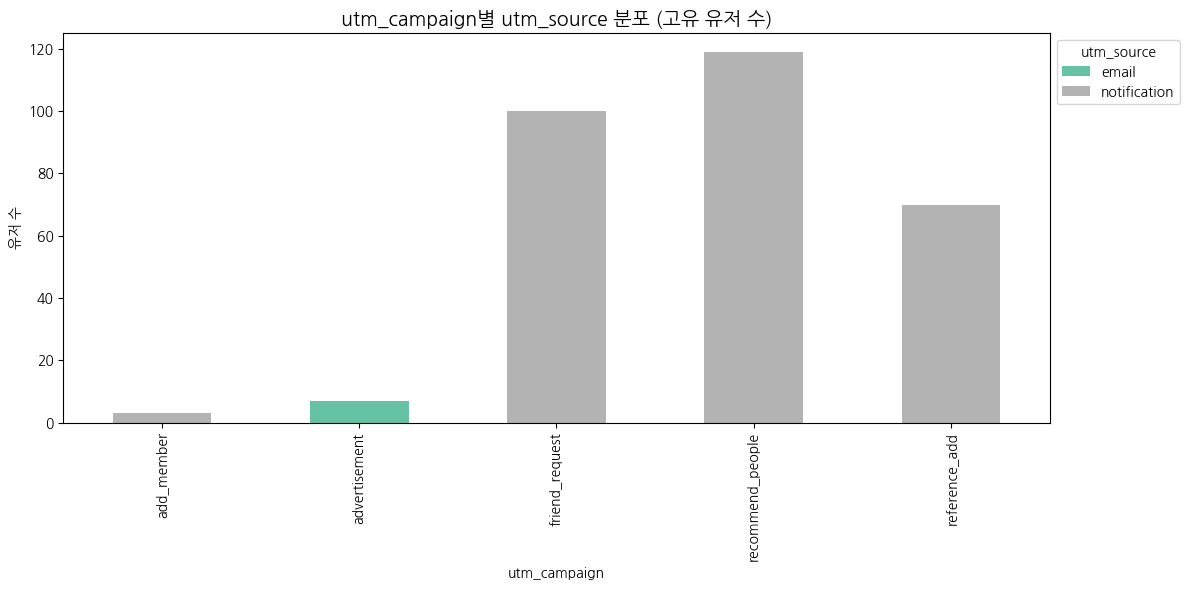

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 예시 데이터 (실제 데이터로 대체하세요)
data = {
    'user_uuid': referral_df['user_uuid'],
    'utm_source': referral_df['utm_source'],
    'utm_campaign': referral_df['utm_campaign']
}

referral_df = pd.DataFrame(data)

# 캠페인과 소스별 고유 유저 수 집계
source_distribution = referral_df.groupby(['utm_campaign', 'utm_source'])['user_uuid'].nunique().unstack(fill_value=0)

# 시각화: Stacked Bar Chart
plt.figure(figsize=(12, 6))
source_distribution.plot(
    kind='bar',
    stacked=True,
    colormap='Set2',
    figsize=(12, 6)
)

plt.title('utm_campaign별 utm_source 분포 (고유 유저 수)', fontsize=14)
plt.xlabel('utm_campaign')
plt.ylabel('유저 수')
plt.legend(title='utm_source', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# 캠페인과 소스별 고유 유저 수 집계
source_distribution_df = referral_df.groupby(['utm_campaign', 'utm_source'])['user_uuid'] \
                                    .nunique() \
                                    .unstack(fill_value=0)

# 결과 확인
print(source_distribution_df)

utm_source        email  notification
utm_campaign                         
add_member            0             3
advertisement         7             0
friend_request        0           100
recommend_people      0           119
reference_add         0            70


### 3. 결과

- 추천 링크를 통해 유입된 유저들의 경로 특징은 대부분 이메일을 통해 추천링크를 받아 알림 메일로 유입된 경우가 많았습니다.
- 또한 campaign 경로는 'recommend_people' 로 유입된 경우가 가장 많았고, 'friend_request'로도 상당히 많은 기록이 있었습니다.
- 이 결과는 대부분 주변인이나 지인을 통해 유입되는 경우가 많음을 알 수 있습니다.
- 따라서, 인사이트를 제시한다면,
    - 이메일 알림 메시지의 내용과 UI/UX를 수정 보완하는 작업을 통해 더 나은 알림 메시지를 전달하여 추천 유입 수를 올리는 방안,
    - 이메일과 알림 메시지를 통해 친구나 동료 구직자를 추천하고,
    - 추천받은 친구가 가입하거나 특정 활동(이력서 업데이트, 공고 지원 등)을 완료했을 때 양쪽 모두에게 무료 이력서/ 자소서 탬플릿, 기업 분석 자료, 면접 컨설팅 등 다양한 혜택을 제공하는 캠페인을 통해 신규 구직자 유입을 늘릴 수 있을 것으로 보입니다.

# 2. 퍼널 분석

## 1. 퍼널 정의

- 퍼널 단계 정의
    - 1단계 : signup/detail (회원 가입 완료)
    - 2단계 : jobs/job_title (지원 할 공고 진입)
    - 3단계 : api/jobs/id/apply/step1(채용공고 지원 1단계 제출), api/job/id/apply/step2 (채용공고 지원 2단계 제출), api/jobs/id/apply/step3 (채용공고 지원 3단계 제출)를 순서 관계없이 모두 진행
    - 4단계: api/jobs/id/apply/step4 (채용공고 지원 4단계 제출, 지원 완료 처리)

- 예외 상황에 대한 분석법 정의
    - 1. 각 단계에서 응답코드가 200인 경우만 정상 로그로 판단
    - 2. 지원서 작성 단계에서 step1, step2, step3 을 순서대로 하지 않은 경우
        - 단계 3개를 각각 퍼널 단계로서 부여하지 않고,
        - 순서 상관없이, step1 ~ step3 까지 3개를 모두 진행한 경우를 퍼널단계 중 하나의 단계로 설정.
        - 따라서, 퍼널 단계는 총 4단계로 구성.

## 2. EDA

### 1. 퍼널 1단계 : 회원가입 완료

- 우선, signup/detail 기록이 있는 user_uuid를 추출한 후,
- 유저별 처음 signup/detail 기록시간 이후 로그 데이터만 필터링

In [ ]:
# 유입 대상 데이터 프레임 생성
acquisition_df_co = acquisition_df.copy()


# 유저별 처음 회원가입 완료 시간 구하기
first_signup = acquisition_df_co[acquisition_df_co['URL'] == 'signup/detail'] \
    .groupby('user_uuid')['timestamp'].min().reset_index()
first_signup.columns = ['user_uuid', 'first_signup_time']

# 전체 로그와 처음 회원가입 시간 merge
log_with_first_signup = acquisition_df_co.merge(first_signup, on='user_uuid', how='inner')

# 처음 회원가입 기록부터 필터링
first_signup_log = log_with_first_signup[
    log_with_first_signup['timestamp'] >= log_with_first_signup['first_signup_time']
].copy()

# 유저별 URL 로그 시퀀스 정렬
first_signup_sorted = first_signup_log.sort_values(by=['user_uuid', 'timestamp'])

# 확인해보기
first_signup_sorted

,user_uuid,URL,timestamp,date,response_code,method,first_signup_time
979849,000b55ad-5c86-438b-a5b0-9ea3a2917789,signup/detail,2023-06-21 11:01:34.663903+00:00,2023-06-21,302,GET,2023-06-21 11:01:34.663903+00:00
979834,000b55ad-5c86-438b-a5b0-9ea3a2917789,signup/step1/name,2023-06-21 11:01:34.772232+00:00,2023-06-21,200,GET,2023-06-21 11:01:34.663903+00:00
979808,000b55ad-5c86-438b-a5b0-9ea3a2917789,signup/step2/career,2023-06-21 11:01:52.901332+00:00,2023-06-21,200,GET,2023-06-21 11:01:34.663903+00:00
979831,000b55ad-5c86-438b-a5b0-9ea3a2917789,api/recommend_specialty,2023-06-21 11:01:54.763335+00:00,2023-06-21,200,POST,2023-06-21 11:01:34.663903+00:00
979835,000b55ad-5c86-438b-a5b0-9ea3a2917789,api/users/id/image,2023-06-21 11:02:01.742970+00:00,2023-06-21,200,POST,2023-06-21 11:01:34.663903+00:00
...,...,...,...,...,...,...,...
1730937,ffee959d-51e1-41d1-b662-1e55c7c379bf,jobs/id/id_title,2023-01-05 14:00:48.572689+00:00,2023-01-05,200,GET,2023-01-05 11:10:38.521088+00:00
1730979,ffee959d-51e1-41d1-b662-1e55c7c379bf,api/jobs/id/other_jobs?offset=0&limit=5,2023-01-05 14:00:48.824484+00:00,2023-01-05,200,GET,2023-01-05 11:10:38.521088+00:00
1730836,ffee959d-51e1-41d1-b662-1e55c7c379bf,?utm_source=notification,2023-04-30 16:20:58.372236+00:00,2023-05-01,200,GET,2023-01-05 11:10:38.521088+00:00
1730835,ffee959d-51e1-41d1-b662-1e55c7c379bf,@user_id/applications,2023-04-30 16:21:05.919764+00:00,2023-05-01,200,GET,2023-01-05 11:10:38.521088+00:00


In [ ]:
# 퍼널 분석 1단계 : 회원가입하기는 총 2061명
# 이탈율 0%
first_signup_sorted['user_uuid'].nunique()

2061

In [ ]:
signup_conversion = first_signup_sorted['user_uuid'].nunique() / acquisition_df_co['user_uuid'].nunique()
print(f'- 퍼널 1단계인 회원가입 완료 전환율은 {signup_conversion * 100}% 입니다.')

- 퍼널 1단계인 회원가입 완료 전환율은 100.0% 입니다.


### 2. 퍼널 2단계 : 지원 할 공고 진입

- 퍼널 2단계는 지원 할 공고 진입으로 정의하였고,
- 지원 할 공고 진입에 대한 URL 정보는 아래와 같이 정의하였습니다.
    - api/jobs/job_title

In [ ]:
# 유저별 처음 지원 할 공고 진입 완료 시간 구하기
first_jobtitle = first_signup_sorted[(first_signup_sorted['URL'] == 'api/jobs/job_title') & (first_signup_sorted['response_code'] == 200)] \
    .groupby('user_uuid')['timestamp'].min().reset_index()
first_jobtitle.columns = ['user_uuid', 'jobtitle_time']

# 전체 로그와 처음 지원 할 공고 진입 시간 merge
log_with_first_jobtitle = first_signup_sorted.merge(first_jobtitle, on='user_uuid', how='inner')

# 처음 지원 할 공고 진입 기록부터 필터링
first_jobtitle_log = log_with_first_jobtitle[
    log_with_first_jobtitle['timestamp'] >= log_with_first_jobtitle['jobtitle_time']
].copy()

# 유저별 URL 로그 시퀀스 정렬
first_jobtitle_sorted = first_jobtitle_log.sort_values(by=['user_uuid', 'timestamp'])

# 확인해보기
first_jobtitle_sorted

,user_uuid,URL,timestamp,date,response_code,method,first_signup_time,jobtitle_time
48,000b55ad-5c86-438b-a5b0-9ea3a2917789,api/jobs/job_title,2023-06-21 11:04:20.387654+00:00,2023-06-21,200,GET,2023-06-21 11:01:34.663903+00:00,2023-06-21 11:04:20.387654+00:00
49,000b55ad-5c86-438b-a5b0-9ea3a2917789,api/jobs/job_title?keywords=블록체인,2023-06-21 11:04:53.322030+00:00,2023-06-21,200,GET,2023-06-21 11:01:34.663903+00:00,2023-06-21 11:04:20.387654+00:00
50,000b55ad-5c86-438b-a5b0-9ea3a2917789,jobs/id/id_title,2023-06-21 11:05:51.275521+00:00,2023-06-21,200,GET,2023-06-21 11:01:34.663903+00:00,2023-06-21 11:04:20.387654+00:00
51,000b55ad-5c86-438b-a5b0-9ea3a2917789,api/jobs/job_title?page=2&keywords=블록체인,2023-06-21 11:06:33.877161+00:00,2023-06-21,200,GET,2023-06-21 11:01:34.663903+00:00,2023-06-21 11:04:20.387654+00:00
52,000b55ad-5c86-438b-a5b0-9ea3a2917789,api/jobs/job_title?page=3&keywords=블록체인,2023-06-21 11:07:03.953804+00:00,2023-06-21,200,GET,2023-06-21 11:01:34.663903+00:00,2023-06-21 11:04:20.387654+00:00
...,...,...,...,...,...,...,...,...
1111706,ff2d1be1-2629-401e-ba35-0031fa6c8c5a,jobs/id/apply/step3,2023-04-18 13:02:44.397702+00:00,2023-04-18,200,GET,2023-02-09 14:36:33.743047+00:00,2023-04-14 14:14:11.934008+00:00
1111707,ff2d1be1-2629-401e-ba35-0031fa6c8c5a,api/jobs/id/apply/step3,2023-04-18 13:03:02.602264+00:00,2023-04-18,200,POST,2023-02-09 14:36:33.743047+00:00,2023-04-14 14:14:11.934008+00:00
1111708,ff2d1be1-2629-401e-ba35-0031fa6c8c5a,jobs/id/apply/step4,2023-04-18 13:03:02.949636+00:00,2023-04-18,200,GET,2023-02-09 14:36:33.743047+00:00,2023-04-14 14:14:11.934008+00:00
1111709,ff2d1be1-2629-401e-ba35-0031fa6c8c5a,api/jobs/id/apply/step4,2023-04-18 13:03:08.557647+00:00,2023-04-18,200,POST,2023-02-09 14:36:33.743047+00:00,2023-04-14 14:14:11.934008+00:00


In [ ]:
first_jobtitle_sorted['signup_to_job_hr'] = (
    first_jobtitle_sorted['jobtitle_time'] - first_jobtitle_sorted['first_signup_time']
).dt.total_seconds() / 3600

In [ ]:
first_jobtitle_sorted

,user_uuid,URL,timestamp,date,response_code,method,first_signup_time,jobtitle_time,signup_to_job_hr
48,000b55ad-5c86-438b-a5b0-9ea3a2917789,api/jobs/job_title,2023-06-21 11:04:20.387654+00:00,2023-06-21,200,GET,2023-06-21 11:01:34.663903+00:00,2023-06-21 11:04:20.387654+00:00,0.046034
49,000b55ad-5c86-438b-a5b0-9ea3a2917789,api/jobs/job_title?keywords=블록체인,2023-06-21 11:04:53.322030+00:00,2023-06-21,200,GET,2023-06-21 11:01:34.663903+00:00,2023-06-21 11:04:20.387654+00:00,0.046034
50,000b55ad-5c86-438b-a5b0-9ea3a2917789,jobs/id/id_title,2023-06-21 11:05:51.275521+00:00,2023-06-21,200,GET,2023-06-21 11:01:34.663903+00:00,2023-06-21 11:04:20.387654+00:00,0.046034
51,000b55ad-5c86-438b-a5b0-9ea3a2917789,api/jobs/job_title?page=2&keywords=블록체인,2023-06-21 11:06:33.877161+00:00,2023-06-21,200,GET,2023-06-21 11:01:34.663903+00:00,2023-06-21 11:04:20.387654+00:00,0.046034
52,000b55ad-5c86-438b-a5b0-9ea3a2917789,api/jobs/job_title?page=3&keywords=블록체인,2023-06-21 11:07:03.953804+00:00,2023-06-21,200,GET,2023-06-21 11:01:34.663903+00:00,2023-06-21 11:04:20.387654+00:00,0.046034
...,...,...,...,...,...,...,...,...,...
1111706,ff2d1be1-2629-401e-ba35-0031fa6c8c5a,jobs/id/apply/step3,2023-04-18 13:02:44.397702+00:00,2023-04-18,200,GET,2023-02-09 14:36:33.743047+00:00,2023-04-14 14:14:11.934008+00:00,1535.627275
1111707,ff2d1be1-2629-401e-ba35-0031fa6c8c5a,api/jobs/id/apply/step3,2023-04-18 13:03:02.602264+00:00,2023-04-18,200,POST,2023-02-09 14:36:33.743047+00:00,2023-04-14 14:14:11.934008+00:00,1535.627275
1111708,ff2d1be1-2629-401e-ba35-0031fa6c8c5a,jobs/id/apply/step4,2023-04-18 13:03:02.949636+00:00,2023-04-18,200,GET,2023-02-09 14:36:33.743047+00:00,2023-04-14 14:14:11.934008+00:00,1535.627275
1111709,ff2d1be1-2629-401e-ba35-0031fa6c8c5a,api/jobs/id/apply/step4,2023-04-18 13:03:08.557647+00:00,2023-04-18,200,POST,2023-02-09 14:36:33.743047+00:00,2023-04-14 14:14:11.934008+00:00,1535.627275


In [ ]:
# 'signup_to_job_hr' 의 평균
user_avg = first_jobtitle_sorted.groupby('user_uuid')['signup_to_job_hr'].mean()
overall_avg = user_avg.mean()

print("User-level average of signup_to_job_hr:", overall_avg)

User-level average of signup_to_job_hr: 633.0355145358027


In [ ]:
# '평균값'이상인 데이터를 삭제
first_jobtitle_sorted = first_jobtitle_sorted[first_jobtitle_sorted['signup_to_job_hr'] <= overall_avg]

In [ ]:
first_jobtitle_sorted['user_uuid'].nunique()

831

In [ ]:
jobtitle_conversion = first_jobtitle_sorted['user_uuid'].nunique() / first_signup_sorted['user_uuid'].nunique()
print(f'- 퍼널 2단계인 지원할 공고 진입 전환율은 {jobtitle_conversion * 100}% 입니다.')

- 퍼널 2단계인 지원할 공고 진입 전환율은 40.32023289665211% 입니다.


### 3. 퍼널 3단계 : 지원하기 작성 단계

- 퍼널 3단계는 지원하기 작성 단계로 정의하였고,
- 지원하기 작성 단계에 대한 URL 정보는 아래와 같이 정의하였습니다.
    - api/jobs/id/apply/step1
    - api/jobs/id/apply/step2
    - api/jobs/id/apply/step3
- 위 URL 3개를 순서와 상관없이 모두 기록이 있는 유저를 퍼널 3단계를 성공했다고 판단합니다.

In [ ]:
# 각 step의 최초 기록 시간 추출
# 1. step1_time을 구해서 Series로 변환
step1_time_series = (
    first_jobtitle_sorted[first_jobtitle_sorted['URL'] == 'api/jobs/id/apply/step1']
    .groupby('user_uuid')['timestamp']
    .min()
)

# 2. user_uuid 기준으로 map해서 컬럼 생성
first_jobtitle_sorted['step1_time'] = first_jobtitle_sorted['user_uuid'].map(step1_time_series)

# 1. step2_time을 구해서 Series로 변환
step2_time_series = (
    first_jobtitle_sorted[first_jobtitle_sorted['URL'] == 'api/jobs/id/apply/step2']
    .groupby('user_uuid')['timestamp']
    .min()
)

# 2. user_uuid 기준으로 map해서 컬럼 생성
first_jobtitle_sorted['step2_time'] = first_jobtitle_sorted['user_uuid'].map(step2_time_series)


# 1. step3_time을 구해서 Series로 변환
step3_time_series = (
    first_jobtitle_sorted[first_jobtitle_sorted['URL'] == 'api/jobs/id/apply/step3']
    .groupby('user_uuid')['timestamp']
    .min()
)

# 2. user_uuid 기준으로 map해서 컬럼 생성
first_jobtitle_sorted['step3_time'] = first_jobtitle_sorted['user_uuid'].map(step3_time_series)

In [ ]:
first_jobtitle_sorted.head(2)

,user_uuid,URL,timestamp,date,response_code,method,first_signup_time,jobtitle_time,signup_to_job_hr,step1_time,step2_time,step3_time
48,000b55ad-5c86-438b-a5b0-9ea3a2917789,api/jobs/job_title,2023-06-21 11:04:20.387654+00:00,2023-06-21,200,GET,2023-06-21 11:01:34.663903+00:00,2023-06-21 11:04:20.387654+00:00,0.046034,2023-07-06 11:08:28.739175+00:00,2023-07-06 11:08:36.020144+00:00,2023-07-12 07:10:27.631190+00:00
49,000b55ad-5c86-438b-a5b0-9ea3a2917789,api/jobs/job_title?keywords=블록체인,2023-06-21 11:04:53.322030+00:00,2023-06-21,200,GET,2023-06-21 11:01:34.663903+00:00,2023-06-21 11:04:20.387654+00:00,0.046034,2023-07-06 11:08:28.739175+00:00,2023-07-06 11:08:36.020144+00:00,2023-07-12 07:10:27.631190+00:00


In [ ]:
# 1. 각 행에서 가장 늦은 시간 계산 (step1_time, step2_time, step3_time 중)
first_jobtitle_sorted['max_step_time'] = first_jobtitle_sorted[['step1_time', 'step2_time', 'step3_time']].max(axis=1)

In [ ]:
first_jobtitle_sorted.isna().sum()

,0
user_uuid,0
URL,0
timestamp,0
date,0
response_code,0
method,0
first_signup_time,0
jobtitle_time,0
signup_to_job_hr,0
step1_time,8362


In [ ]:
# step1, step2, step3 모두 한 경우만 추출
# 하나라도 결측이면 제거
first_apply_step = first_jobtitle_sorted.dropna(subset=['step1_time', 'step2_time', 'step3_time'])

In [ ]:
# timestamp와 max_step_time을 비교해서 조건 만족하는 데이터만 필터링
first_apply_step = first_apply_step[first_apply_step['timestamp'] >= first_apply_step['max_step_time']]

In [ ]:
first_apply_step['job_to_step_hr'] = (
    first_apply_step['max_step_time'] - first_apply_step['jobtitle_time']
).dt.total_seconds() / 3600

In [ ]:
# 유저별 URL 로그 시퀀스 정렬
first_apply_step_sorted = first_apply_step.sort_values(by=['user_uuid', 'timestamp'])

In [ ]:
# 'job_to_step_hr' 의 평균
user_avg = first_apply_step_sorted.groupby('user_uuid')['job_to_step_hr'].mean()
overall_avg = user_avg.mean()

print("User-level average of job_to_step_hr:", overall_avg)

User-level average of job_to_step_hr: 632.228615285705


In [ ]:
# '평균값'이상인 데이터를 삭제
first_apply_step_sorted = first_apply_step_sorted[first_apply_step_sorted['job_to_step_hr'] <= overall_avg]

In [ ]:
first_apply_step_sorted['user_uuid'].nunique()

491

In [ ]:
step_conversion = first_apply_step_sorted['user_uuid'].nunique() / first_jobtitle_sorted['user_uuid'].nunique()
print(f'- 퍼널 3단계인 지원단계 전환율은 {step_conversion * 100}% 입니다.')

- 퍼널 3단계인 지원단계 전환율은 59.08543922984356% 입니다.


### 4. 퍼널 4단계 : 지원하기 4단계 (지원완료)

- 퍼널 6단계는 지원완료로 정의하였고,
- 지원완료에 대한 URL 정보는 아래와 같이 정의하였습니다.
    - api/jobs/id/apply/step4

In [ ]:
# 유저별 처음 지원하기 4단계 완료 시간 구하기
first_apply_step4 = first_apply_step_sorted[(first_apply_step_sorted['URL'] == 'api/jobs/id/apply/step4') & (first_apply_step_sorted['response_code'] == 200)] \
    .groupby('user_uuid')['timestamp'].min().reset_index()
first_apply_step4.columns = ['user_uuid', 'first_apply_step4_time']

# 전체 로그와 처음 지원하기 4단계 시간 merge
log_with_first_apply_step4 = first_apply_step_sorted.merge(first_apply_step4, on='user_uuid', how='inner')

log_with_first_apply_step4

,user_uuid,URL,timestamp,date,response_code,method,first_signup_time,jobtitle_time,signup_to_job_hr,step1_time,step2_time,step3_time,max_step_time,job_to_step_hr,first_apply_step4_time
0,000b55ad-5c86-438b-a5b0-9ea3a2917789,api/jobs/id/apply/step3,2023-07-12 07:10:27.631190+00:00,2023-07-12,400,POST,2023-06-21 11:01:34.663903+00:00,2023-06-21 11:04:20.387654+00:00,0.046034,2023-07-06 11:08:28.739175+00:00,2023-07-06 11:08:36.020144+00:00,2023-07-12 07:10:27.631190+00:00,2023-07-12 07:10:27.631190+00:00,500.102012,2023-07-12 07:11:34.468428+00:00
1,000b55ad-5c86-438b-a5b0-9ea3a2917789,api/jobs/id/apply/step3,2023-07-12 07:10:44.655427+00:00,2023-07-12,400,POST,2023-06-21 11:01:34.663903+00:00,2023-06-21 11:04:20.387654+00:00,0.046034,2023-07-06 11:08:28.739175+00:00,2023-07-06 11:08:36.020144+00:00,2023-07-12 07:10:27.631190+00:00,2023-07-12 07:10:27.631190+00:00,500.102012,2023-07-12 07:11:34.468428+00:00
2,000b55ad-5c86-438b-a5b0-9ea3a2917789,api/jobs/id/apply/step3,2023-07-12 07:11:13.506157+00:00,2023-07-12,200,POST,2023-06-21 11:01:34.663903+00:00,2023-06-21 11:04:20.387654+00:00,0.046034,2023-07-06 11:08:28.739175+00:00,2023-07-06 11:08:36.020144+00:00,2023-07-12 07:10:27.631190+00:00,2023-07-12 07:10:27.631190+00:00,500.102012,2023-07-12 07:11:34.468428+00:00
3,000b55ad-5c86-438b-a5b0-9ea3a2917789,jobs/id/apply/step4,2023-07-12 07:11:13.917267+00:00,2023-07-12,200,GET,2023-06-21 11:01:34.663903+00:00,2023-06-21 11:04:20.387654+00:00,0.046034,2023-07-06 11:08:28.739175+00:00,2023-07-06 11:08:36.020144+00:00,2023-07-12 07:10:27.631190+00:00,2023-07-12 07:10:27.631190+00:00,500.102012,2023-07-12 07:11:34.468428+00:00
4,000b55ad-5c86-438b-a5b0-9ea3a2917789,api/jobs/id/apply/step4,2023-07-12 07:11:34.468428+00:00,2023-07-12,200,POST,2023-06-21 11:01:34.663903+00:00,2023-06-21 11:04:20.387654+00:00,0.046034,2023-07-06 11:08:28.739175+00:00,2023-07-06 11:08:36.020144+00:00,2023-07-12 07:10:27.631190+00:00,2023-07-12 07:10:27.631190+00:00,500.102012,2023-07-12 07:11:34.468428+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268203,fe51a2fa-8890-4092-b4af-16f7073a5793,api/companies/id/view,2023-12-29 11:40:41.285034+00:00,2023-12-29,200,POST,2023-04-10 14:40:49.143433+00:00,2023-04-13 13:07:56.129453+00:00,70.451941,2023-04-13 13:17:18.536257+00:00,2023-04-13 13:18:45.172816+00:00,2023-04-13 13:30:36.186135+00:00,2023-04-13 13:30:36.186135+00:00,0.377794,2023-04-13 13:32:14.151287+00:00
268204,fe51a2fa-8890-4092-b4af-16f7073a5793,@user_id,2023-12-29 11:40:42.034199+00:00,2023-12-29,200,GET,2023-04-10 14:40:49.143433+00:00,2023-04-13 13:07:56.129453+00:00,70.451941,2023-04-13 13:17:18.536257+00:00,2023-04-13 13:18:45.172816+00:00,2023-04-13 13:30:36.186135+00:00,2023-04-13 13:30:36.186135+00:00,0.377794,2023-04-13 13:32:14.151287+00:00
268205,fe51a2fa-8890-4092-b4af-16f7073a5793,api/users/id/template,2023-12-29 11:40:42.469934+00:00,2023-12-29,200,POST,2023-04-10 14:40:49.143433+00:00,2023-04-13 13:07:56.129453+00:00,70.451941,2023-04-13 13:17:18.536257+00:00,2023-04-13 13:18:45.172816+00:00,2023-04-13 13:30:36.186135+00:00,2023-04-13 13:30:36.186135+00:00,0.377794,2023-04-13 13:32:14.151287+00:00
268206,fe51a2fa-8890-4092-b4af-16f7073a5793,@user_id,2023-12-29 11:40:44.236187+00:00,2023-12-29,200,GET,2023-04-10 14:40:49.143433+00:00,2023-04-13 13:07:56.129453+00:00,70.451941,2023-04-13 13:17:18.536257+00:00,2023-04-13 13:18:45.172816+00:00,2023-04-13 13:30:36.186135+00:00,2023-04-13 13:30:36.186135+00:00,0.377794,2023-04-13 13:32:14.151287+00:00


In [ ]:
# timestamp와 max_step_time을 비교해서 조건 만족하는 데이터만 필터링
first_apply_step4 = log_with_first_apply_step4[log_with_first_apply_step4['timestamp'] >= log_with_first_apply_step4['first_apply_step4_time']]

In [ ]:
first_apply_step4['step_to_apply_hr'] = (
first_apply_step4['first_apply_step4_time'] - first_apply_step4['max_step_time']
).dt.total_seconds() / 3600

In [ ]:
# 'step_to_apply_hr' 의 평균
user_avg = first_apply_step4.groupby('user_uuid')['step_to_apply_hr'].mean()
overall_avg = user_avg.mean()

print("User-level average of step_to_apply_hr:", overall_avg)

User-level average of step_to_apply_hr: 41.31400622754269


In [ ]:
# '평균값'이상인 데이터를 삭제
first_apply_step4 = first_apply_step4[first_apply_step4['step_to_apply_hr'] <= overall_avg]

In [ ]:
# 유저별 URL 로그 시퀀스 정렬
first_apply_step4_sorted = first_apply_step4.sort_values(by=['user_uuid', 'timestamp'])

# 확인해보기
first_apply_step4_sorted.head(2)

,user_uuid,URL,timestamp,date,response_code,method,first_signup_time,jobtitle_time,signup_to_job_hr,step1_time,step2_time,step3_time,max_step_time,job_to_step_hr,first_apply_step4_time,step_to_apply_hr
4,000b55ad-5c86-438b-a5b0-9ea3a2917789,api/jobs/id/apply/step4,2023-07-12 07:11:34.468428+00:00,2023-07-12,200,POST,2023-06-21 11:01:34.663903+00:00,2023-06-21 11:04:20.387654+00:00,0.046034,2023-07-06 11:08:28.739175+00:00,2023-07-06 11:08:36.020144+00:00,2023-07-12 07:10:27.631190+00:00,2023-07-12 07:10:27.631190+00:00,500.102012,2023-07-12 07:11:34.468428+00:00,0.018566
5,000b55ad-5c86-438b-a5b0-9ea3a2917789,jobs/id/apply/complete,2023-07-12 07:11:35.168731+00:00,2023-07-12,200,GET,2023-06-21 11:01:34.663903+00:00,2023-06-21 11:04:20.387654+00:00,0.046034,2023-07-06 11:08:28.739175+00:00,2023-07-06 11:08:36.020144+00:00,2023-07-12 07:10:27.631190+00:00,2023-07-12 07:10:27.631190+00:00,500.102012,2023-07-12 07:11:34.468428+00:00,0.018566


In [ ]:
first_apply_step4_sorted['user_uuid'].nunique()

453

In [ ]:
apply_conversion = first_apply_step4_sorted['user_uuid'].nunique() / first_apply_step_sorted['user_uuid'].nunique()
print(f'- 퍼널 3단계인 지원단계 전환율은 {apply_conversion * 100}% 입니다.')

- 퍼널 3단계인 지원단계 전환율은 92.26069246435846% 입니다.


In [ ]:
# 각 단계별 해당 URL 조건과 response_code가 200 인 경우에 대한 고객 수
print(first_signup_sorted['user_uuid'].nunique(),
first_jobtitle_sorted['user_uuid'].nunique(),
first_apply_step_sorted['user_uuid'].nunique(),
first_apply_step4_sorted['user_uuid'].nunique())

2061 831 491 453


### 5. 결과 정리

In [ ]:
step1 = first_signup_sorted['user_uuid'].nunique()
step2 = first_jobtitle_sorted['user_uuid'].nunique()
step3 = first_apply_step_sorted['user_uuid'].nunique()
step4 = first_apply_step4_sorted['user_uuid'].nunique()

In [ ]:
# 각 단계별 유저 수 (이미 계산된 값)
step_counts = {
    'Step 1: Signup': step1,
    'Step 2: Job View': step2,
    'Step 3: Step1 ~ Step3 Apply': step3,
    'Step 4: Apply': step4
}

steps = list(step_counts.keys())
users = list(step_counts.values())

# 전환율, 이탈자 수, 이탈률 계산
conversion_rates = ['100.0%']  # 첫 단계는 기준
dropouts = ['0명']
dropout_rates = ['0.0%']

for i in range(1, len(users)):
    prev = users[i-1]
    curr = users[i]
    conv_rate = (curr / prev * 100) if prev != 0 else 0
    dropout_num = prev - curr
    dropout_rate = (dropout_num / prev * 100) if prev != 0 else 0

    conversion_rates.append(f"{conv_rate:.1f}%")
    dropouts.append(f"{dropout_num}명")
    dropout_rates.append(f"{dropout_rate:.1f}%")

# 사용자 수에 '명' 단위 붙이기
users_with_unit = [f"{u}명" for u in users]

# 최종 요약표 만들기
funnel_df = pd.DataFrame({
    'Step': steps,
    'Users': users_with_unit,
    'Conversion Rate': conversion_rates,
    'Dropouts': dropouts,
    'Dropout Rate': dropout_rates
})

funnel_df

,Step,Users,Conversion Rate,Dropouts,Dropout Rate
0,Step 1: Signup,2061명,100.0%,0명,0.0%
1,Step 2: Job View,831명,40.3%,1230명,59.7%
2,Step 3: Step1 ~ Step3 Apply,491명,59.1%,340명,40.9%
3,Step 4: Apply,453명,92.3%,38명,7.7%


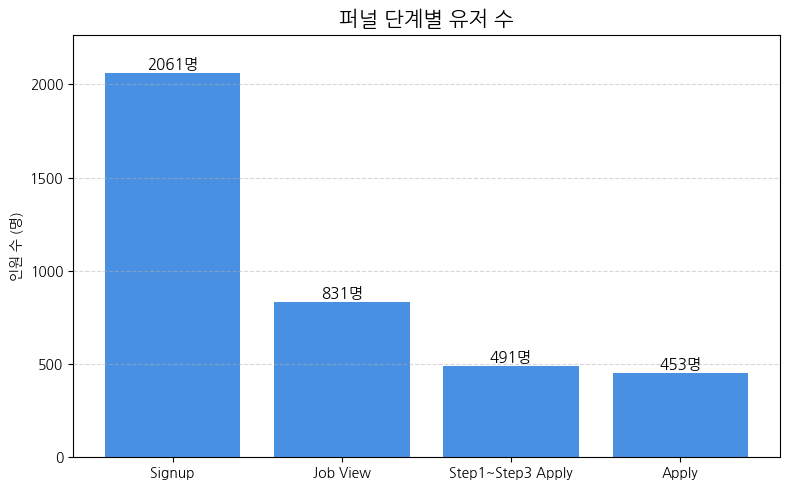

In [ ]:
# 결과 시각화

# 단계명과 유저 수 리스트
steps = ['Signup', 'Job View', 'Step1~Step3 Apply', 'Apply']
user_counts = [step1, step2, step3, step4]

# 시각화
plt.figure(figsize=(8, 5))
bars = plt.bar(steps, user_counts, color='#4a90e2')

# 막대 위에 값 표시
for bar, count in zip(bars, user_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5,
             f'{count}명', ha='center', va='bottom', fontsize=11)

plt.title('퍼널 단계별 유저 수', fontsize=15)
plt.ylabel('인원 수 (명)')
plt.ylim(0, max(user_counts) * 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# 퍼널형 시각화
import plotly.graph_objects as go

# 단계 이름과 인원 수
steps = ['Signup', 'Job View', 'Step1~Step3 Apply', 'Apply']
user_counts = [step1, step2, step3, step4]

# 퍼널 차트 생성
fig = go.Figure(go.Funnel(
    y = steps,
    x = user_counts,
    textinfo = "value+percent previous+percent initial",  # 숫자, 전단계 대비 %, 최초 대비 %
    marker = {"color": ["#4a90e2", "#50e3c2", "#f5a623", "#d0021b"]}
))

# 레이아웃 설정
fig.update_layout(
    title="퍼널 분석 시각화",
    margin=dict(l=80, r=80, t=80, b=80),
    font=dict(size=14)
)

fig.show()

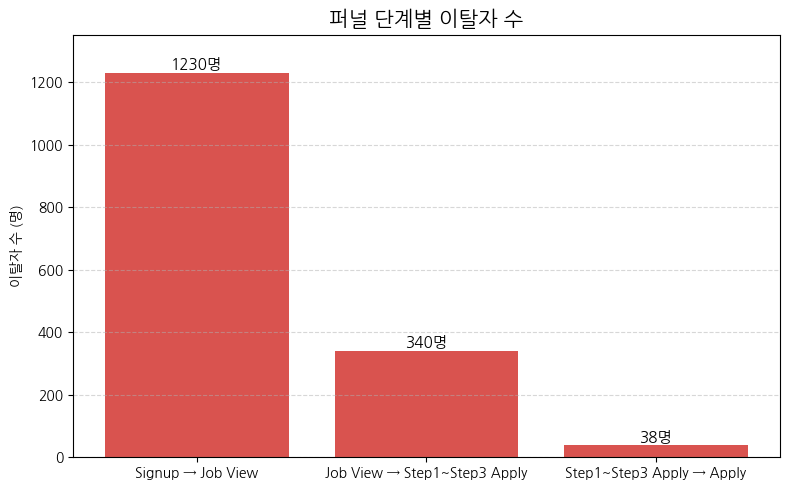

In [ ]:
# 단계별 이탈자 수 시각화

# 각 단계 이름과 이탈자 수
steps = ['Signup → Job View', 'Job View → Step1~Step3 Apply', 'Step1~Step3 Apply → Apply']
dropouts = [step1 - step2, step2 - step3, step3 - step4]

# 시각화
plt.figure(figsize=(8, 5))
bars = plt.bar(steps, dropouts, color='#d9534f')

# 막대 위에 값 표시
for bar, count in zip(bars, dropouts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2,
             f'{count}명', ha='center', va='bottom', fontsize=11)

plt.title('퍼널 단계별 이탈자 수', fontsize=15)
plt.ylabel('이탈자 수 (명)')
plt.ylim(0, max(dropouts) * 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 3. 세그먼트 분석

## 1. 세그먼트 정의

- offer(제안) 을 받은 그룹과 받지 않은 그룹으로 나누어 퍼널 분석 진행하였습니다.
    - offer 를 받은 기록에 대한 관련 URL은 다음과 같습니다.
    - '@user_id/job_offer/received'

In [ ]:
# 유입 고객 데이터프레임 생성
acquisition_df_cop = acquisition_df.copy()

# '?'뒤에 있는 내용도 세부적인 행동이기 때문에,
# 우선 전체적으로 행동의 종류를 파악하기 위해서는
# 삭제를 진행한 후에 분류해보자.
acquisition_df_cop['URL'] = acquisition_df_cop['URL'].str.split('?').str[0]

In [ ]:

# 오퍼를 받은 고객의 user_uuid 추출
offer_received_users = acquisition_df_cop[acquisition_df_cop['URL'] == '@user_id/job_offer/received']['user_uuid'].unique()

# 오퍼를 받은 고객 데이터프레임 생성
offer_received_df = acquisition_df_cop[acquisition_df_cop['user_uuid'].isin(offer_received_users)]

# 오퍼를 받지 않은 고객 데이터프레임 생성
offer_not_received_df = acquisition_df_cop[~acquisition_df_cop['user_uuid'].isin(offer_received_users)]

In [ ]:
offer_received_df['user_uuid'].nunique()

611

In [ ]:
offer_not_received_df['user_uuid'].nunique()

1450

### 1. 오퍼를 받은 그룹

In [ ]:
# 유저별 처음 오퍼 받은 시간 구하기
first_offer = offer_received_df[(offer_received_df['URL'] == '@user_id/job_offer/received') & (offer_received_df['response_code'] == 200)] \
    .groupby('user_uuid')['timestamp'].min().reset_index()
first_offer.columns = ['user_uuid', 'first_offer_time']

# 전체 로그와 처음 오퍼 받은 시간 merge
offer_received_df = offer_received_df.merge(first_offer, on='user_uuid', how='inner')


# 유저별 URL 로그 시퀀스 정렬
offer_received_df = offer_received_df.sort_values(by=['user_uuid', 'timestamp'])

# 확인해보기
offer_received_df

,user_uuid,URL,timestamp,date,response_code,method,first_offer_time
623813,00b43208-7cc2-4a35-b8fb-73baa3258dcf,signup/detail,2023-05-07 15:34:34.078864+00:00,2023-05-08,302,GET,2023-05-17 03:07:43.637236+00:00
623913,00b43208-7cc2-4a35-b8fb-73baa3258dcf,signup/step1/name,2023-05-07 15:34:34.186563+00:00,2023-05-08,200,GET,2023-05-17 03:07:43.637236+00:00
623869,00b43208-7cc2-4a35-b8fb-73baa3258dcf,signup/step2/career,2023-05-07 15:34:39.194408+00:00,2023-05-08,200,GET,2023-05-17 03:07:43.637236+00:00
623884,00b43208-7cc2-4a35-b8fb-73baa3258dcf,api/recommend_specialty,2023-05-07 15:34:40.244628+00:00,2023-05-08,200,POST,2023-05-17 03:07:43.637236+00:00
623873,00b43208-7cc2-4a35-b8fb-73baa3258dcf,api/users/id/image,2023-05-07 15:38:22.044741+00:00,2023-05-08,200,POST,2023-05-17 03:07:43.637236+00:00
...,...,...,...,...,...,...,...
305638,ff75a922-f16b-41b2-9ca7-954a61ac08f2,api/users/id/form,2023-12-16 13:35:00.907128+00:00,2023-12-16,200,POST,2023-02-14 08:22:47.755422+00:00
305632,ff75a922-f16b-41b2-9ca7-954a61ac08f2,api/users/id/template,2023-12-16 13:35:02.439489+00:00,2023-12-16,200,POST,2023-02-14 08:22:47.755422+00:00
305634,ff75a922-f16b-41b2-9ca7-954a61ac08f2,@user_id,2023-12-16 13:35:06.975752+00:00,2023-12-16,200,GET,2023-02-14 08:22:47.755422+00:00
305636,ff75a922-f16b-41b2-9ca7-954a61ac08f2,api/current_guided_action/id,2023-12-16 13:35:07.665410+00:00,2023-12-16,200,POST,2023-02-14 08:22:47.755422+00:00


In [ ]:
# 유저별 처음 지원완료 시간 구하기
first_apply_step4 = offer_received_df[(offer_received_df['URL'] == 'api/jobs/id/apply/step4') & (offer_received_df['response_code'] == 200)] \
    .groupby('user_uuid')['timestamp'].min().reset_index()
first_apply_step4.columns = ['user_uuid', 'first_apply_step4_time']

# 전체 로그와 처음 지원완료 시간 merge
offer_received_df = offer_received_df.merge(first_apply_step4, on='user_uuid', how='inner')

# 유저별 URL 로그 시퀀스 정렬
offer_received_df = offer_received_df.sort_values(by=['user_uuid', 'timestamp'])

# 확인해보기
offer_received_df

,user_uuid,URL,timestamp,date,response_code,method,first_offer_time,first_apply_step4_time
0,00b43208-7cc2-4a35-b8fb-73baa3258dcf,signup/detail,2023-05-07 15:34:34.078864+00:00,2023-05-08,302,GET,2023-05-17 03:07:43.637236+00:00,2023-05-13 08:21:54.797772+00:00
1,00b43208-7cc2-4a35-b8fb-73baa3258dcf,signup/step1/name,2023-05-07 15:34:34.186563+00:00,2023-05-08,200,GET,2023-05-17 03:07:43.637236+00:00,2023-05-13 08:21:54.797772+00:00
2,00b43208-7cc2-4a35-b8fb-73baa3258dcf,signup/step2/career,2023-05-07 15:34:39.194408+00:00,2023-05-08,200,GET,2023-05-17 03:07:43.637236+00:00,2023-05-13 08:21:54.797772+00:00
3,00b43208-7cc2-4a35-b8fb-73baa3258dcf,api/recommend_specialty,2023-05-07 15:34:40.244628+00:00,2023-05-08,200,POST,2023-05-17 03:07:43.637236+00:00,2023-05-13 08:21:54.797772+00:00
4,00b43208-7cc2-4a35-b8fb-73baa3258dcf,api/users/id/image,2023-05-07 15:38:22.044741+00:00,2023-05-08,200,POST,2023-05-17 03:07:43.637236+00:00,2023-05-13 08:21:54.797772+00:00
...,...,...,...,...,...,...,...,...
772064,ff75a922-f16b-41b2-9ca7-954a61ac08f2,api/users/id/form,2023-12-16 13:35:00.907128+00:00,2023-12-16,200,POST,2023-02-14 08:22:47.755422+00:00,2023-02-14 02:43:24.148255+00:00
772065,ff75a922-f16b-41b2-9ca7-954a61ac08f2,api/users/id/template,2023-12-16 13:35:02.439489+00:00,2023-12-16,200,POST,2023-02-14 08:22:47.755422+00:00,2023-02-14 02:43:24.148255+00:00
772066,ff75a922-f16b-41b2-9ca7-954a61ac08f2,@user_id,2023-12-16 13:35:06.975752+00:00,2023-12-16,200,GET,2023-02-14 08:22:47.755422+00:00,2023-02-14 02:43:24.148255+00:00
772067,ff75a922-f16b-41b2-9ca7-954a61ac08f2,api/current_guided_action/id,2023-12-16 13:35:07.665410+00:00,2023-12-16,200,POST,2023-02-14 08:22:47.755422+00:00,2023-02-14 02:43:24.148255+00:00


In [ ]:
# first_offer_time이first_apply_step4_time보다 이전인 데이터만 추출
offer_received_df_sort = offer_received_df[offer_received_df['first_offer_time'] < offer_received_df['first_apply_step4_time']]

In [ ]:
uuids_received_offer = offer_received_df_sort['user_uuid'].unique()

In [ ]:
# 2. signup_df에서 해당 user_uuid만 필터링
offer_received_df = offer_received_df[offer_received_df['user_uuid'].isin(uuids_received_offer)]

In [ ]:
offer_received_df['user_uuid'].nunique()

181

### 2. 오퍼를 받지 않은 그룹

In [ ]:
# 1. user_uuid 고유값 추출
unique_uuids = offer_not_received_df['user_uuid'].drop_duplicates()

# 2. 랜덤으로 181명 추출
sampled_uuids = unique_uuids.sample(n=181, random_state=42)

# 3. 해당 user_uuid에 대한 전체 데이터 추출
offer_not_received_df = offer_not_received_df[offer_not_received_df['user_uuid'].isin(sampled_uuids)]

In [ ]:
uuids_not_received_offer = offer_not_received_df['user_uuid'].unique()

In [ ]:
# 2. signup_df에서 해당 user_uuid만 필터링
offer_not_received_df = acquisition_df_cop[acquisition_df_cop['user_uuid'].isin(uuids_not_received_offer)]

In [ ]:
offer_not_received_df

,user_uuid,URL,timestamp,date,response_code,method
29108,6d28f470-d76a-4637-b062-5e08cf22b95b,api/users/id/career,2023-12-29 03:01:50.916804+00:00,2023-12-29,200,POST
29109,6d28f470-d76a-4637-b062-5e08cf22b95b,api/search/companies,2023-12-29 03:01:12.874146+00:00,2023-12-29,200,GET
29110,6d28f470-d76a-4637-b062-5e08cf22b95b,api/users/id/template,2023-12-29 03:02:42.537846+00:00,2023-12-29,200,POST
29111,6d28f470-d76a-4637-b062-5e08cf22b95b,api/users/id/experience/form,2023-12-29 03:02:15.729431+00:00,2023-12-29,200,POST
29112,6d28f470-d76a-4637-b062-5e08cf22b95b,api/users/id/career/template,2023-12-29 03:02:30.467075+00:00,2023-12-29,200,GET
...,...,...,...,...,...,...
2096081,d978bd10-235a-48fd-85a7-88eab4716289,api/timeline,2023-02-22 03:30:38.803035+00:00,2023-02-22,200,GET
2096082,d978bd10-235a-48fd-85a7-88eab4716289,jobs/id/apply/step2,2023-02-22 03:52:53.105138+00:00,2023-02-22,200,GET
2096083,d978bd10-235a-48fd-85a7-88eab4716289,@user_id/resume/step1,2023-02-22 03:52:36.684722+00:00,2023-02-22,200,GET
2096084,d978bd10-235a-48fd-85a7-88eab4716289,api/current_guided_action/id,2023-02-22 03:30:40.767550+00:00,2023-02-22,200,POST


In [ ]:
offer_not_received_df['user_uuid'].nunique()

181

In [ ]:
offer_received_df.drop(columns = 'first_apply_step4_time', inplace=True)

## 2. 세그먼트별 퍼널 분석

### 1. 오퍼를 받은 그룹

 ```
 퍼널1단계 : 회원가입 완료
 ```

In [ ]:
# 유저별 처음 회원가입 완료 시간 구하기
first_signup = offer_received_df[offer_received_df['URL'] == 'signup/detail'] \
    .groupby('user_uuid')['timestamp'].min().reset_index()
first_signup.columns = ['user_uuid', 'first_signup_time']

# 전체 로그와 처음 회원가입 시간 merge
log_with_first_signup = offer_received_df.merge(first_signup, on='user_uuid', how='inner')

# 처음 회원가입 기록부터 필터링
first_signup_log = log_with_first_signup[
    log_with_first_signup['timestamp'] >= log_with_first_signup['first_signup_time']
].copy()

# 유저별 URL 로그 시퀀스 정렬
first_signup_sorted = first_signup_log.sort_values(by=['user_uuid', 'timestamp'])

# 확인해보기
first_signup_sorted

,user_uuid,URL,timestamp,date,response_code,method,first_offer_time,first_signup_time
0,015484d5-0df3-4719-b801-471170a384aa,signup/detail,2023-04-01 16:27:33.553945+00:00,2023-04-02,302,GET,2023-06-09 08:41:27.314867+00:00,2023-04-01 16:27:33.553945+00:00
1,015484d5-0df3-4719-b801-471170a384aa,signup/step1/name,2023-04-01 16:27:33.716259+00:00,2023-04-02,200,GET,2023-06-09 08:41:27.314867+00:00,2023-04-01 16:27:33.553945+00:00
2,015484d5-0df3-4719-b801-471170a384aa,signup/step2/career,2023-04-01 16:28:12.410005+00:00,2023-04-02,200,GET,2023-06-09 08:41:27.314867+00:00,2023-04-01 16:27:33.553945+00:00
3,015484d5-0df3-4719-b801-471170a384aa,api/recommend_specialty,2023-04-01 16:28:13.019813+00:00,2023-04-02,200,POST,2023-06-09 08:41:27.314867+00:00,2023-04-01 16:27:33.553945+00:00
4,015484d5-0df3-4719-b801-471170a384aa,api/users/id/specialty,2023-04-01 16:28:29.416145+00:00,2023-04-02,200,POST,2023-06-09 08:41:27.314867+00:00,2023-04-01 16:27:33.553945+00:00
...,...,...,...,...,...,...,...,...
238256,fdc18ad4-4d27-4e31-834f-d78f46b6021b,@user_id,2023-04-06 01:58:01.193877+00:00,2023-04-06,200,GET,2023-03-06 03:42:14.729699+00:00,2023-02-21 06:06:58.291432+00:00
238257,fdc18ad4-4d27-4e31-834f-d78f46b6021b,api/current_guided_action/id,2023-04-06 01:58:01.734824+00:00,2023-04-06,200,POST,2023-03-06 03:42:14.729699+00:00,2023-02-21 06:06:58.291432+00:00
238258,fdc18ad4-4d27-4e31-834f-d78f46b6021b,api/recommend_specialty,2023-04-06 01:58:01.797862+00:00,2023-04-06,200,POST,2023-03-06 03:42:14.729699+00:00,2023-02-21 06:06:58.291432+00:00
238259,fdc18ad4-4d27-4e31-834f-d78f46b6021b,api/users/id/template,2023-04-06 01:58:02.202451+00:00,2023-04-06,200,POST,2023-03-06 03:42:14.729699+00:00,2023-02-21 06:06:58.291432+00:00


In [ ]:
# 퍼널 분석 1단계 : 회원가입하기는 총 2061명
# 이탈율 0%
first_signup_sorted['user_uuid'].nunique()

181

In [ ]:
signup_conversion = first_signup_sorted['user_uuid'].nunique() / offer_received_df['user_uuid'].nunique()
print(f'- 퍼널 1단계인 회원가입 완료 전환율은 {signup_conversion * 100}% 입니다.')

- 퍼널 1단계인 회원가입 완료 전환율은 100.0% 입니다.


 ```
 퍼널2단계 : 지원 할 공고 진입
 ```

In [ ]:
# 유저별 처음 지원 할 공고 진입 완료 시간 구하기
first_jobtitle = first_signup_sorted[(first_signup_sorted['URL'] == 'api/jobs/job_title') & (first_signup_sorted['response_code'] == 200)] \
    .groupby('user_uuid')['timestamp'].min().reset_index()
first_jobtitle.columns = ['user_uuid', 'jobtitle_time']

# 전체 로그와 처음 지원 할 공고 진입 시간 merge
log_with_first_jobtitle = first_signup_sorted.merge(first_jobtitle, on='user_uuid', how='inner')

# 처음 지원 할 공고 진입 기록부터 필터링
first_jobtitle_log = log_with_first_jobtitle[
    log_with_first_jobtitle['timestamp'] >= log_with_first_jobtitle['jobtitle_time']
].copy()

# 유저별 URL 로그 시퀀스 정렬
first_jobtitle_sorted = first_jobtitle_log.sort_values(by=['user_uuid', 'timestamp'])

# 확인해보기
first_jobtitle_sorted

,user_uuid,URL,timestamp,date,response_code,method,first_offer_time,first_signup_time,jobtitle_time
36,015484d5-0df3-4719-b801-471170a384aa,api/jobs/job_title,2023-04-01 16:30:16.630071+00:00,2023-04-02,200,GET,2023-06-09 08:41:27.314867+00:00,2023-04-01 16:27:33.553945+00:00,2023-04-01 16:30:16.630071+00:00
37,015484d5-0df3-4719-b801-471170a384aa,api/jobs/job_title,2023-04-01 16:30:20.598496+00:00,2023-04-02,200,GET,2023-06-09 08:41:27.314867+00:00,2023-04-01 16:27:33.553945+00:00,2023-04-01 16:30:16.630071+00:00
38,015484d5-0df3-4719-b801-471170a384aa,api/jobs/job_title,2023-04-01 16:30:23.877351+00:00,2023-04-02,200,GET,2023-06-09 08:41:27.314867+00:00,2023-04-01 16:27:33.553945+00:00,2023-04-01 16:30:16.630071+00:00
39,015484d5-0df3-4719-b801-471170a384aa,api/jobs/job_title,2023-04-01 16:30:41.660733+00:00,2023-04-02,200,POST,2023-06-09 08:41:27.314867+00:00,2023-04-01 16:27:33.553945+00:00,2023-04-01 16:30:16.630071+00:00
40,015484d5-0df3-4719-b801-471170a384aa,jobs/id/id_title,2023-04-01 16:30:53.097824+00:00,2023-04-02,200,GET,2023-06-09 08:41:27.314867+00:00,2023-04-01 16:27:33.553945+00:00,2023-04-01 16:30:16.630071+00:00
...,...,...,...,...,...,...,...,...,...
227667,fdc18ad4-4d27-4e31-834f-d78f46b6021b,@user_id,2023-04-06 01:58:01.193877+00:00,2023-04-06,200,GET,2023-03-06 03:42:14.729699+00:00,2023-02-21 06:06:58.291432+00:00,2023-03-03 02:17:51.175278+00:00
227668,fdc18ad4-4d27-4e31-834f-d78f46b6021b,api/current_guided_action/id,2023-04-06 01:58:01.734824+00:00,2023-04-06,200,POST,2023-03-06 03:42:14.729699+00:00,2023-02-21 06:06:58.291432+00:00,2023-03-03 02:17:51.175278+00:00
227669,fdc18ad4-4d27-4e31-834f-d78f46b6021b,api/recommend_specialty,2023-04-06 01:58:01.797862+00:00,2023-04-06,200,POST,2023-03-06 03:42:14.729699+00:00,2023-02-21 06:06:58.291432+00:00,2023-03-03 02:17:51.175278+00:00
227670,fdc18ad4-4d27-4e31-834f-d78f46b6021b,api/users/id/template,2023-04-06 01:58:02.202451+00:00,2023-04-06,200,POST,2023-03-06 03:42:14.729699+00:00,2023-02-21 06:06:58.291432+00:00,2023-03-03 02:17:51.175278+00:00


In [ ]:
first_jobtitle_sorted['signup_to_job_hr'] = (
    first_jobtitle_sorted['jobtitle_time'] - first_jobtitle_sorted['first_signup_time']
).dt.total_seconds() / 3600

In [ ]:
# 'signup_to_job_hr' 의 평균
user_avg = first_jobtitle_sorted.groupby('user_uuid')['signup_to_job_hr'].mean()
overall_avg = user_avg.mean()

print("User-level average of signup_to_job_hr:", overall_avg)

User-level average of signup_to_job_hr: 437.6032265303636


In [ ]:
# '평균값'이상인 데이터를 삭제
first_jobtitle_sorted = first_jobtitle_sorted[first_jobtitle_sorted['signup_to_job_hr'] <= overall_avg]

In [ ]:
first_jobtitle_sorted['user_uuid'].nunique()

140

In [ ]:
jobtitle_conversion = first_jobtitle_sorted['user_uuid'].nunique() / first_signup_sorted['user_uuid'].nunique()
print(f'- 퍼널 2단계인 지원할 공고 진입 전환율은 {jobtitle_conversion * 100}% 입니다.')

- 퍼널 2단계인 지원할 공고 진입 전환율은 77.34806629834254% 입니다.


 ```
퍼널3단계 : 지원하기 작성 단계
 ```

In [ ]:
# 각 step의 최초 기록 시간 추출
# 1. step1_time을 구해서 Series로 변환
step1_time_series = (
    first_jobtitle_sorted[first_jobtitle_sorted['URL'] == 'api/jobs/id/apply/step1']
    .groupby('user_uuid')['timestamp']
    .min()
)

# 2. user_uuid 기준으로 map해서 컬럼 생성
first_jobtitle_sorted['step1_time'] = first_jobtitle_sorted['user_uuid'].map(step1_time_series)

# 1. step2_time을 구해서 Series로 변환
step2_time_series = (
    first_jobtitle_sorted[first_jobtitle_sorted['URL'] == 'api/jobs/id/apply/step2']
    .groupby('user_uuid')['timestamp']
    .min()
)

# 2. user_uuid 기준으로 map해서 컬럼 생성
first_jobtitle_sorted['step2_time'] = first_jobtitle_sorted['user_uuid'].map(step2_time_series)


# 1. step3_time을 구해서 Series로 변환
step3_time_series = (
    first_jobtitle_sorted[first_jobtitle_sorted['URL'] == 'api/jobs/id/apply/step3']
    .groupby('user_uuid')['timestamp']
    .min()
)

# 2. user_uuid 기준으로 map해서 컬럼 생성
first_jobtitle_sorted['step3_time'] = first_jobtitle_sorted['user_uuid'].map(step3_time_series)

In [ ]:
# 1. 각 행에서 가장 늦은 시간 계산 (step1_time, step2_time, step3_time 중)
first_jobtitle_sorted['max_step_time'] = first_jobtitle_sorted[['step1_time', 'step2_time', 'step3_time']].max(axis=1)

In [ ]:
first_jobtitle_sorted.isna().sum()

,0
user_uuid,0
URL,0
timestamp,0
date,0
response_code,0
method,0
first_offer_time,0
first_signup_time,0
jobtitle_time,0
signup_to_job_hr,0


In [ ]:
# step1, step2, step3 모두 한 경우만 추출
# 하나라도 결측이면 제거
first_apply_step = first_jobtitle_sorted.dropna(subset=['step1_time', 'step2_time', 'step3_time'])

In [ ]:
# timestamp와 max_step_time을 비교해서 조건 만족하는 데이터만 필터링
first_apply_step = first_apply_step[first_apply_step['timestamp'] >= first_apply_step['max_step_time']]

In [ ]:
first_apply_step['job_to_step_hr'] = (
    first_apply_step['max_step_time'] - first_apply_step['jobtitle_time']
).dt.total_seconds() / 3600

In [ ]:
# 유저별 URL 로그 시퀀스 정렬
first_apply_step_sorted = first_apply_step.sort_values(by=['user_uuid', 'timestamp'])

In [ ]:
# 'job_to_step_hr' 의 평균
user_avg = first_apply_step_sorted.groupby('user_uuid')['job_to_step_hr'].mean()
overall_avg = user_avg.mean()

print("User-level average of job_to_step_hr:", overall_avg)

User-level average of job_to_step_hr: 850.3908959882538


In [ ]:
# '평균값'이상인 데이터를 삭제
first_apply_step_sorted = first_apply_step_sorted[first_apply_step_sorted['job_to_step_hr'] <= overall_avg]

In [ ]:
first_apply_step_sorted['user_uuid'].nunique()

85

In [ ]:
step_conversion = first_apply_step_sorted['user_uuid'].nunique() / first_jobtitle_sorted['user_uuid'].nunique()
print(f'- 퍼널 3단계인 지원단계 전환율은 {step_conversion * 100}% 입니다.')

- 퍼널 3단계인 지원단계 전환율은 60.71428571428571% 입니다.


 ```
퍼널 4단계 : 지원하기 4단계(지원 완료)
 ```

In [ ]:
# 유저별 처음 지원하기 4단계 완료 시간 구하기
first_apply_step4 = first_apply_step_sorted[(first_apply_step_sorted['URL'] == 'api/jobs/id/apply/step4') & (first_apply_step_sorted['response_code'] == 200)] \
    .groupby('user_uuid')['timestamp'].min().reset_index()
first_apply_step4.columns = ['user_uuid', 'first_apply_step4_time']

# 전체 로그와 처음 지원하기 4단계 시간 merge
log_with_first_apply_step4 = first_apply_step_sorted.merge(first_apply_step4, on='user_uuid', how='inner')

log_with_first_apply_step4

,user_uuid,URL,timestamp,date,response_code,method,first_offer_time,first_signup_time,jobtitle_time,signup_to_job_hr,step1_time,step2_time,step3_time,max_step_time,job_to_step_hr,first_apply_step4_time
0,054e6af5-a8fc-4e67-b8b6-81783708194d,api/jobs/id/apply/step3,2023-01-31 15:31:01.226813+00:00,2023-02-01,200,POST,2023-01-25 11:14:49.230437+00:00,2023-01-24 14:20:07.917446+00:00,2023-01-24 14:26:43.941148+00:00,0.110007,2023-01-31 15:14:53.294930+00:00,2023-01-31 15:16:04.849642+00:00,2023-01-31 15:31:01.226813+00:00,2023-01-31 15:31:01.226813+00:00,169.071468,2023-01-31 15:33:20.468024+00:00
1,054e6af5-a8fc-4e67-b8b6-81783708194d,jobs/id/apply/step4,2023-01-31 15:31:02.059430+00:00,2023-02-01,200,GET,2023-01-25 11:14:49.230437+00:00,2023-01-24 14:20:07.917446+00:00,2023-01-24 14:26:43.941148+00:00,0.110007,2023-01-31 15:14:53.294930+00:00,2023-01-31 15:16:04.849642+00:00,2023-01-31 15:31:01.226813+00:00,2023-01-31 15:31:01.226813+00:00,169.071468,2023-01-31 15:33:20.468024+00:00
2,054e6af5-a8fc-4e67-b8b6-81783708194d,jobs/id/apply/step3,2023-01-31 15:31:32.459820+00:00,2023-02-01,200,GET,2023-01-25 11:14:49.230437+00:00,2023-01-24 14:20:07.917446+00:00,2023-01-24 14:26:43.941148+00:00,0.110007,2023-01-31 15:14:53.294930+00:00,2023-01-31 15:16:04.849642+00:00,2023-01-31 15:31:01.226813+00:00,2023-01-31 15:31:01.226813+00:00,169.071468,2023-01-31 15:33:20.468024+00:00
3,054e6af5-a8fc-4e67-b8b6-81783708194d,api/jobs/id/apply/step3,2023-01-31 15:32:18.503757+00:00,2023-02-01,200,POST,2023-01-25 11:14:49.230437+00:00,2023-01-24 14:20:07.917446+00:00,2023-01-24 14:26:43.941148+00:00,0.110007,2023-01-31 15:14:53.294930+00:00,2023-01-31 15:16:04.849642+00:00,2023-01-31 15:31:01.226813+00:00,2023-01-31 15:31:01.226813+00:00,169.071468,2023-01-31 15:33:20.468024+00:00
4,054e6af5-a8fc-4e67-b8b6-81783708194d,jobs/id/apply/step4,2023-01-31 15:32:19.143603+00:00,2023-02-01,200,GET,2023-01-25 11:14:49.230437+00:00,2023-01-24 14:20:07.917446+00:00,2023-01-24 14:26:43.941148+00:00,0.110007,2023-01-31 15:14:53.294930+00:00,2023-01-31 15:16:04.849642+00:00,2023-01-31 15:31:01.226813+00:00,2023-01-31 15:31:01.226813+00:00,169.071468,2023-01-31 15:33:20.468024+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56292,fdc18ad4-4d27-4e31-834f-d78f46b6021b,@user_id,2023-04-06 01:58:01.193877+00:00,2023-04-06,200,GET,2023-03-06 03:42:14.729699+00:00,2023-02-21 06:06:58.291432+00:00,2023-03-03 02:17:51.175278+00:00,236.181357,2023-03-08 07:02:38.187931+00:00,2023-03-08 07:04:11.311937+00:00,2023-03-08 07:04:22.246763+00:00,2023-03-08 07:04:22.246763+00:00,124.775298,2023-03-08 07:07:45.532534+00:00
56293,fdc18ad4-4d27-4e31-834f-d78f46b6021b,api/current_guided_action/id,2023-04-06 01:58:01.734824+00:00,2023-04-06,200,POST,2023-03-06 03:42:14.729699+00:00,2023-02-21 06:06:58.291432+00:00,2023-03-03 02:17:51.175278+00:00,236.181357,2023-03-08 07:02:38.187931+00:00,2023-03-08 07:04:11.311937+00:00,2023-03-08 07:04:22.246763+00:00,2023-03-08 07:04:22.246763+00:00,124.775298,2023-03-08 07:07:45.532534+00:00
56294,fdc18ad4-4d27-4e31-834f-d78f46b6021b,api/recommend_specialty,2023-04-06 01:58:01.797862+00:00,2023-04-06,200,POST,2023-03-06 03:42:14.729699+00:00,2023-02-21 06:06:58.291432+00:00,2023-03-03 02:17:51.175278+00:00,236.181357,2023-03-08 07:02:38.187931+00:00,2023-03-08 07:04:11.311937+00:00,2023-03-08 07:04:22.246763+00:00,2023-03-08 07:04:22.246763+00:00,124.775298,2023-03-08 07:07:45.532534+00:00
56295,fdc18ad4-4d27-4e31-834f-d78f46b6021b,api/users/id/template,2023-04-06 01:58:02.202451+00:00,2023-04-06,200,POST,2023-03-06 03:42:14.729699+00:00,2023-02-21 06:06:58.291432+00:00,2023-03-03 02:17:51.175278+00:00,236.181357,2023-03-08 07:02:38.187931+00:00,2023-03-08 07:04:11.311937+00:00,2023-03-08 07:04:22.246763+00:00,2023-03-08 07:04:22.246763+00:00,124.775298,2023-03-08 07:07:45.532534+00:00


In [ ]:
# timestamp와 max_step_time을 비교해서 조건 만족하는 데이터만 필터링
first_apply_step4 = log_with_first_apply_step4[log_with_first_apply_step4['timestamp'] >= log_with_first_apply_step4['first_apply_step4_time']]

In [ ]:
first_apply_step4['step_to_apply_hr'] = (
first_apply_step4['first_apply_step4_time'] - first_apply_step4['max_step_time']
).dt.total_seconds() / 3600

In [ ]:
# 'step_to_apply_hr' 의 평균
user_avg = first_apply_step4.groupby('user_uuid')['step_to_apply_hr'].mean()
overall_avg = user_avg.mean()

print("User-level average of step_to_apply_hr:", overall_avg)

User-level average of step_to_apply_hr: 31.98718558960131


In [ ]:
# '평균값'이상인 데이터를 삭제
first_apply_step4 = first_apply_step4[first_apply_step4['step_to_apply_hr'] <= overall_avg]

In [ ]:
# 유저별 URL 로그 시퀀스 정렬
first_apply_step4_sorted = first_apply_step4.sort_values(by=['user_uuid', 'timestamp'])

# 확인해보기
first_apply_step4_sorted.head(2)

,user_uuid,URL,timestamp,date,response_code,method,first_offer_time,first_signup_time,jobtitle_time,signup_to_job_hr,step1_time,step2_time,step3_time,max_step_time,job_to_step_hr,first_apply_step4_time,step_to_apply_hr
5,054e6af5-a8fc-4e67-b8b6-81783708194d,api/jobs/id/apply/step4,2023-01-31 15:33:20.468024+00:00,2023-02-01,200,POST,2023-01-25 11:14:49.230437+00:00,2023-01-24 14:20:07.917446+00:00,2023-01-24 14:26:43.941148+00:00,0.110007,2023-01-31 15:14:53.294930+00:00,2023-01-31 15:16:04.849642+00:00,2023-01-31 15:31:01.226813+00:00,2023-01-31 15:31:01.226813+00:00,169.071468,2023-01-31 15:33:20.468024+00:00,0.038678
6,054e6af5-a8fc-4e67-b8b6-81783708194d,jobs,2023-01-31 15:33:45.177029+00:00,2023-02-01,200,GET,2023-01-25 11:14:49.230437+00:00,2023-01-24 14:20:07.917446+00:00,2023-01-24 14:26:43.941148+00:00,0.110007,2023-01-31 15:14:53.294930+00:00,2023-01-31 15:16:04.849642+00:00,2023-01-31 15:31:01.226813+00:00,2023-01-31 15:31:01.226813+00:00,169.071468,2023-01-31 15:33:20.468024+00:00,0.038678


In [ ]:
first_apply_step4_sorted['user_uuid'].nunique()

76

In [ ]:
apply_conversion = first_apply_step4_sorted['user_uuid'].nunique() / first_apply_step_sorted['user_uuid'].nunique()
print(f'- 퍼널 3단계인 지원단계 전환율은 {apply_conversion * 100}% 입니다.')

- 퍼널 3단계인 지원단계 전환율은 89.41176470588236% 입니다.


```
결과 정리
```

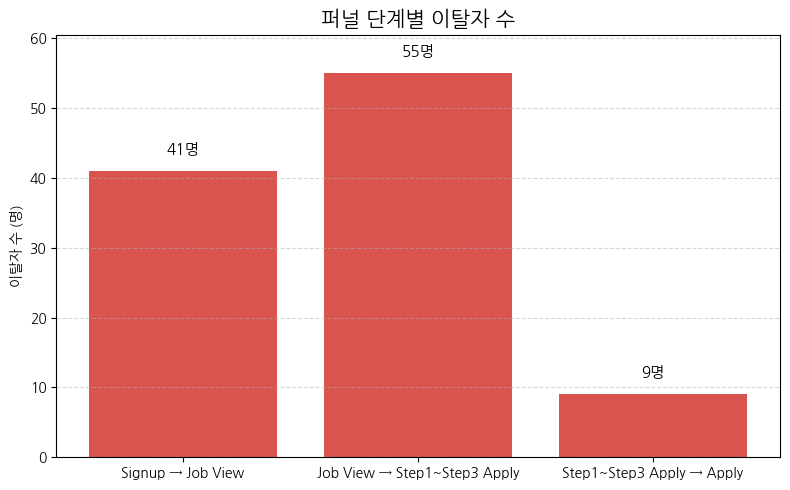

In [ ]:
# 단계별 이탈자 수 시각화

# 각 단계 이름과 이탈자 수
steps = ['Signup → Job View', 'Job View → Step1~Step3 Apply', 'Step1~Step3 Apply → Apply']
dropouts = [step1 - step2, step2 - step3, step3 - step4]

# 시각화
plt.figure(figsize=(8, 5))
bars = plt.bar(steps, dropouts, color='#d9534f')

# 막대 위에 값 표시
for bar, count in zip(bars, dropouts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2,
             f'{count}명', ha='center', va='bottom', fontsize=11)

plt.title('퍼널 단계별 이탈자 수', fontsize=15)
plt.ylabel('이탈자 수 (명)')
plt.ylim(0, max(dropouts) * 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 2. 오퍼를 받지 않은 그룹

```
퍼널1단계 : 회원가입 완료
```

In [ ]:
# 유저별 처음 회원가입 완료 시간 구하기
first_signup_b = offer_not_received_df[offer_not_received_df['URL'] == 'signup/detail'] \
    .groupby('user_uuid')['timestamp'].min().reset_index()
first_signup_b.columns = ['user_uuid', 'first_signup_time']

# 전체 로그와 처음 회원가입 시간 merge
log_with_first_signup_b = offer_not_received_df.merge(first_signup_b, on='user_uuid', how='inner')

# 처음 회원가입 기록부터 필터링
first_signup_log_b = log_with_first_signup_b[
    log_with_first_signup_b['timestamp'] >= log_with_first_signup_b['first_signup_time']
].copy()

# 유저별 URL 로그 시퀀스 정렬
first_signup_sorted_b = first_signup_log_b.sort_values(by=['user_uuid', 'timestamp'])

# 확인해보기
first_signup_sorted_b

,user_uuid,URL,timestamp,date,response_code,method,first_signup_time
88518,00a344d1-230f-4321-8dc9-eb4b97cdf754,signup/detail,2023-08-11 02:13:37.878839+00:00,2023-08-11,302,GET,2023-08-11 02:13:37.878839+00:00
88527,00a344d1-230f-4321-8dc9-eb4b97cdf754,signup/step1/name,2023-08-11 02:13:41.257271+00:00,2023-08-11,200,GET,2023-08-11 02:13:37.878839+00:00
88601,00a344d1-230f-4321-8dc9-eb4b97cdf754,signup/step2/career,2023-08-11 02:13:49.224067+00:00,2023-08-11,200,GET,2023-08-11 02:13:37.878839+00:00
88647,00a344d1-230f-4321-8dc9-eb4b97cdf754,api/recommend_specialty,2023-08-11 02:13:49.760121+00:00,2023-08-11,200,POST,2023-08-11 02:13:37.878839+00:00
88580,00a344d1-230f-4321-8dc9-eb4b97cdf754,api/search/people/job_title,2023-08-11 02:14:11.980543+00:00,2023-08-11,200,GET,2023-08-11 02:13:37.878839+00:00
...,...,...,...,...,...,...,...
111765,fe68de84-9c53-49d0-8299-7c2ce7a301f9,api/users/id/share_increase,2023-05-07 09:58:28.137793+00:00,2023-05-07,200,GET,2023-03-30 22:20:37.628288+00:00
111712,fe68de84-9c53-49d0-8299-7c2ce7a301f9,jobs/id/id_title,2023-05-07 09:59:25.352270+00:00,2023-05-07,200,GET,2023-03-30 22:20:37.628288+00:00
111749,fe68de84-9c53-49d0-8299-7c2ce7a301f9,api/jobs/id/other_jobs,2023-05-07 09:59:26.079698+00:00,2023-05-07,200,GET,2023-03-30 22:20:37.628288+00:00
111711,fe68de84-9c53-49d0-8299-7c2ce7a301f9,companies/company_id/jobs,2023-05-07 09:59:26.900246+00:00,2023-05-07,200,GET,2023-03-30 22:20:37.628288+00:00


In [ ]:
# 퍼널 분석 1단계 : 회원가입하기는 총 2061명
# 이탈율 0%
first_signup_sorted_b['user_uuid'].nunique()

181

In [ ]:
signup_conversion = first_signup_sorted_b['user_uuid'].nunique() / offer_not_received_df['user_uuid'].nunique()
print(f'- 퍼널 1단계인 회원가입 완료 전환율은 {signup_conversion * 100}% 입니다.')

- 퍼널 1단계인 회원가입 완료 전환율은 100.0% 입니다.


```
퍼널2단계 : 지원 할 공고 진입
```

In [ ]:
# 유저별 처음 지원 할 공고 진입 완료 시간 구하기
first_jobtitle_b = first_signup_sorted_b[(first_signup_sorted_b['URL'] == 'api/jobs/job_title') & (first_signup_sorted_b['response_code'] == 200)] \
    .groupby('user_uuid')['timestamp'].min().reset_index()
first_jobtitle_b.columns = ['user_uuid', 'jobtitle_time']

# 전체 로그와 처음 지원 할 공고 진입 시간 merge
log_with_first_jobtitle_b = first_signup_sorted_b.merge(first_jobtitle_b, on='user_uuid', how='inner')

# 처음 지원 할 공고 진입 기록부터 필터링
first_jobtitle_log_b = log_with_first_jobtitle_b[
    log_with_first_jobtitle_b['timestamp'] >= log_with_first_jobtitle_b['jobtitle_time']
].copy()

# 유저별 URL 로그 시퀀스 정렬
first_jobtitle_sorted_b = first_jobtitle_log_b.sort_values(by=['user_uuid', 'timestamp'])

# 확인해보기
first_jobtitle_sorted_b

,user_uuid,URL,timestamp,date,response_code,method,first_signup_time,jobtitle_time
53,00ce67ff-d189-4f0e-80e2-2d5eaa78016e,api/jobs/job_title,2023-09-20 07:10:04.832472+00:00,2023-09-20,200,GET,2023-09-20 07:07:48.423483+00:00,2023-09-20 07:10:04.832472+00:00
54,00ce67ff-d189-4f0e-80e2-2d5eaa78016e,api/jobs/job_title,2023-09-20 07:10:10.004410+00:00,2023-09-20,200,GET,2023-09-20 07:07:48.423483+00:00,2023-09-20 07:10:04.832472+00:00
55,00ce67ff-d189-4f0e-80e2-2d5eaa78016e,api/jobs/job_title,2023-09-20 07:10:16.796315+00:00,2023-09-20,200,GET,2023-09-20 07:07:48.423483+00:00,2023-09-20 07:10:04.832472+00:00
56,00ce67ff-d189-4f0e-80e2-2d5eaa78016e,api/jobs/job_title,2023-09-20 07:10:19.761748+00:00,2023-09-20,200,GET,2023-09-20 07:07:48.423483+00:00,2023-09-20 07:10:04.832472+00:00
57,00ce67ff-d189-4f0e-80e2-2d5eaa78016e,api/jobs/job_title,2023-09-20 07:10:23.114831+00:00,2023-09-20,200,GET,2023-09-20 07:07:48.423483+00:00,2023-09-20 07:10:04.832472+00:00
...,...,...,...,...,...,...,...,...
122737,fe68de84-9c53-49d0-8299-7c2ce7a301f9,api/users/id/share_increase,2023-05-07 09:58:28.137793+00:00,2023-05-07,200,GET,2023-03-30 22:20:37.628288+00:00,2023-04-15 23:28:53.686855+00:00
122738,fe68de84-9c53-49d0-8299-7c2ce7a301f9,jobs/id/id_title,2023-05-07 09:59:25.352270+00:00,2023-05-07,200,GET,2023-03-30 22:20:37.628288+00:00,2023-04-15 23:28:53.686855+00:00
122739,fe68de84-9c53-49d0-8299-7c2ce7a301f9,api/jobs/id/other_jobs,2023-05-07 09:59:26.079698+00:00,2023-05-07,200,GET,2023-03-30 22:20:37.628288+00:00,2023-04-15 23:28:53.686855+00:00
122740,fe68de84-9c53-49d0-8299-7c2ce7a301f9,companies/company_id/jobs,2023-05-07 09:59:26.900246+00:00,2023-05-07,200,GET,2023-03-30 22:20:37.628288+00:00,2023-04-15 23:28:53.686855+00:00


In [ ]:
first_jobtitle_sorted_b['signup_to_job_hr'] = (
    first_jobtitle_sorted_b['jobtitle_time'] - first_jobtitle_sorted_b['first_signup_time']
).dt.total_seconds() / 3600

In [ ]:
# 'signup_to_job_hr' 의 평균
user_avg = first_jobtitle_sorted_b.groupby('user_uuid')['signup_to_job_hr'].mean()
overall_avg = user_avg.mean()

print("User-level average of signup_to_job_hr:", overall_avg)

User-level average of signup_to_job_hr: 318.7506887940204


In [ ]:
# '평균값'이상인 데이터를 삭제
first_jobtitle_sorted_b = first_jobtitle_sorted_b[first_jobtitle_sorted_b['signup_to_job_hr'] <= overall_avg]

In [ ]:
first_jobtitle_sorted_b['user_uuid'].nunique()

127

In [ ]:
jobtitle_conversion = first_jobtitle_sorted_b['user_uuid'].nunique() / first_signup_sorted_b['user_uuid'].nunique()
print(f'- 퍼널 2단계인 지원할 공고 진입 전환율은 {jobtitle_conversion * 100}% 입니다.')

- 퍼널 2단계인 지원할 공고 진입 전환율은 70.1657458563536% 입니다.


```
퍼널3단계 : 지원하기 작성 단계
```

In [ ]:
# 각 step의 최초 기록 시간 추출
# 1. step1_time을 구해서 Series로 변환
step1_time_series = (
    first_jobtitle_sorted_b[first_jobtitle_sorted_b['URL'] == 'api/jobs/id/apply/step1']
    .groupby('user_uuid')['timestamp']
    .min()
)

# 2. user_uuid 기준으로 map해서 컬럼 생성
first_jobtitle_sorted_b['step1_time'] = first_jobtitle_sorted_b['user_uuid'].map(step1_time_series)

# 1. step2_time을 구해서 Series로 변환
step2_time_series = (
    first_jobtitle_sorted_b[first_jobtitle_sorted_b['URL'] == 'api/jobs/id/apply/step2']
    .groupby('user_uuid')['timestamp']
    .min()
)

# 2. user_uuid 기준으로 map해서 컬럼 생성
first_jobtitle_sorted_b['step2_time'] = first_jobtitle_sorted_b['user_uuid'].map(step2_time_series)


# 1. step3_time을 구해서 Series로 변환
step3_time_series = (
    first_jobtitle_sorted_b[first_jobtitle_sorted_b['URL'] == 'api/jobs/id/apply/step3']
    .groupby('user_uuid')['timestamp']
    .min()
)

# 2. user_uuid 기준으로 map해서 컬럼 생성
first_jobtitle_sorted_b['step3_time'] = first_jobtitle_sorted_b['user_uuid'].map(step3_time_series)

In [ ]:
# 1. 각 행에서 가장 늦은 시간 계산 (step1_time, step2_time, step3_time 중)
first_jobtitle_sorted_b['max_step_time'] = first_jobtitle_sorted_b[['step1_time', 'step2_time', 'step3_time']].max(axis=1)

In [ ]:
first_jobtitle_sorted_b.isna().sum()

,0
user_uuid,0
URL,0
timestamp,0
date,0
response_code,0
method,0
first_signup_time,0
jobtitle_time,0
signup_to_job_hr,0
step1_time,1404


In [ ]:
# step1, step2, step3 모두 한 경우만 추출
# 하나라도 결측이면 제거
first_apply_step_b = first_jobtitle_sorted_b.dropna(subset=['step1_time', 'step2_time', 'step3_time'])

In [ ]:
# timestamp와 max_step_time을 비교해서 조건 만족하는 데이터만 필터링
first_apply_step_b = first_apply_step_b[first_apply_step_b['timestamp'] >= first_apply_step_b['max_step_time']]

In [ ]:
first_apply_step_b['job_to_step_hr'] = (
    first_apply_step_b['max_step_time'] - first_apply_step_b['jobtitle_time']
).dt.total_seconds() / 3600

In [ ]:
# 유저별 URL 로그 시퀀스 정렬
first_apply_step_sorted_b = first_apply_step_b.sort_values(by=['user_uuid', 'timestamp'])

In [ ]:
# 'job_to_step_hr' 의 평균
user_avg = first_apply_step_sorted_b.groupby('user_uuid')['job_to_step_hr'].mean()
overall_avg = user_avg.mean()

print("User-level average of job_to_step_hr:", overall_avg)

User-level average of job_to_step_hr: 632.4640263264405


In [ ]:
# '평균값'이상인 데이터를 삭제
first_apply_step_sorted_b = first_apply_step_sorted_b[first_apply_step_sorted_b['job_to_step_hr'] <= overall_avg]

In [ ]:
first_apply_step_sorted_b['user_uuid'].nunique()

63

In [ ]:
step_conversion = first_apply_step_sorted_b['user_uuid'].nunique() / first_jobtitle_sorted_b['user_uuid'].nunique()
print(f'- 퍼널 3단계인 지원단계 전환율은 {step_conversion * 100}% 입니다.')

- 퍼널 3단계인 지원단계 전환율은 49.60629921259843% 입니다.


```
퍼널 4단계 : 지원하기 4단계(지원 완료)
```

In [ ]:
# 유저별 처음 지원하기 4단계 완료 시간 구하기
first_apply_step4_b = first_apply_step_sorted_b[(first_apply_step_sorted_b['URL'] == 'api/jobs/id/apply/step4') & (first_apply_step_sorted_b['response_code'] == 200)] \
    .groupby('user_uuid')['timestamp'].min().reset_index()
first_apply_step4_b.columns = ['user_uuid', 'first_apply_step4_time']

# 전체 로그와 처음 지원하기 4단계 시간 merge
log_with_first_apply_step4_b = first_apply_step_sorted_b.merge(first_apply_step4_b, on='user_uuid', how='inner')

log_with_first_apply_step4_b

,user_uuid,URL,timestamp,date,response_code,method,first_signup_time,jobtitle_time,signup_to_job_hr,step1_time,step2_time,step3_time,max_step_time,job_to_step_hr,first_apply_step4_time
0,028640b7-22ad-4d20-bdb7-f82779e71609,api/jobs/id/apply/step3,2023-02-07 14:14:53.033868+00:00,2023-02-07,200,POST,2023-01-23 07:04:43.305378+00:00,2023-01-30 03:56:00.893000+00:00,164.854885,2023-01-31 17:18:41.113824+00:00,2023-01-31 17:18:47.592821+00:00,2023-02-07 14:14:53.033868+00:00,2023-02-07 14:14:53.033868+00:00,202.314484,2023-02-07 14:15:04.045325+00:00
1,028640b7-22ad-4d20-bdb7-f82779e71609,jobs/id/apply/step4,2023-02-07 14:14:53.428056+00:00,2023-02-07,200,GET,2023-01-23 07:04:43.305378+00:00,2023-01-30 03:56:00.893000+00:00,164.854885,2023-01-31 17:18:41.113824+00:00,2023-01-31 17:18:47.592821+00:00,2023-02-07 14:14:53.033868+00:00,2023-02-07 14:14:53.033868+00:00,202.314484,2023-02-07 14:15:04.045325+00:00
2,028640b7-22ad-4d20-bdb7-f82779e71609,api/jobs/id/apply/step4,2023-02-07 14:15:04.045325+00:00,2023-02-07,200,POST,2023-01-23 07:04:43.305378+00:00,2023-01-30 03:56:00.893000+00:00,164.854885,2023-01-31 17:18:41.113824+00:00,2023-01-31 17:18:47.592821+00:00,2023-02-07 14:14:53.033868+00:00,2023-02-07 14:14:53.033868+00:00,202.314484,2023-02-07 14:15:04.045325+00:00
3,028640b7-22ad-4d20-bdb7-f82779e71609,suggest,2023-02-07 14:15:15.846493+00:00,2023-02-07,200,GET,2023-01-23 07:04:43.305378+00:00,2023-01-30 03:56:00.893000+00:00,164.854885,2023-01-31 17:18:41.113824+00:00,2023-01-31 17:18:47.592821+00:00,2023-02-07 14:14:53.033868+00:00,2023-02-07 14:14:53.033868+00:00,202.314484,2023-02-07 14:15:04.045325+00:00
4,028640b7-22ad-4d20-bdb7-f82779e71609,suggest,2023-02-07 14:15:17.273148+00:00,2023-02-07,200,GET,2023-01-23 07:04:43.305378+00:00,2023-01-30 03:56:00.893000+00:00,164.854885,2023-01-31 17:18:41.113824+00:00,2023-01-31 17:18:47.592821+00:00,2023-02-07 14:14:53.033868+00:00,2023-02-07 14:14:53.033868+00:00,202.314484,2023-02-07 14:15:04.045325+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26101,fbe3c2f6-92ab-47a9-8c9a-93d6bf88db5c,jobs,2023-12-28 13:54:25.338281+00:00,2023-12-28,200,GET,2023-12-24 01:32:05.054866+00:00,2023-12-24 01:33:50.553194+00:00,0.029305,2023-12-28 13:52:12.836388+00:00,2023-12-28 13:52:55.584904+00:00,2023-12-28 13:53:11.035533+00:00,2023-12-28 13:53:11.035533+00:00,108.322356,2023-12-28 13:53:42.541031+00:00
26102,fbe3c2f6-92ab-47a9-8c9a-93d6bf88db5c,api/jobs/job_title,2023-12-28 13:54:27.670209+00:00,2023-12-28,200,GET,2023-12-24 01:32:05.054866+00:00,2023-12-24 01:33:50.553194+00:00,0.029305,2023-12-28 13:52:12.836388+00:00,2023-12-28 13:52:55.584904+00:00,2023-12-28 13:53:11.035533+00:00,2023-12-28 13:53:11.035533+00:00,108.322356,2023-12-28 13:53:42.541031+00:00
26103,fbe3c2f6-92ab-47a9-8c9a-93d6bf88db5c,api/jobs/job_title,2023-12-28 13:54:30.685897+00:00,2023-12-28,200,GET,2023-12-24 01:32:05.054866+00:00,2023-12-24 01:33:50.553194+00:00,0.029305,2023-12-28 13:52:12.836388+00:00,2023-12-28 13:52:55.584904+00:00,2023-12-28 13:53:11.035533+00:00,2023-12-28 13:53:11.035533+00:00,108.322356,2023-12-28 13:53:42.541031+00:00
26104,fbe3c2f6-92ab-47a9-8c9a-93d6bf88db5c,api/jobs/job_title,2023-12-28 13:54:34.094529+00:00,2023-12-28,200,GET,2023-12-24 01:32:05.054866+00:00,2023-12-24 01:33:50.553194+00:00,0.029305,2023-12-28 13:52:12.836388+00:00,2023-12-28 13:52:55.584904+00:00,2023-12-28 13:53:11.035533+00:00,2023-12-28 13:53:11.035533+00:00,108.322356,2023-12-28 13:53:42.541031+00:00


In [ ]:
# timestamp와 max_step_time을 비교해서 조건 만족하는 데이터만 필터링
first_apply_step4_b = log_with_first_apply_step4_b[log_with_first_apply_step4_b['timestamp'] >= log_with_first_apply_step4_b['first_apply_step4_time']]

In [ ]:
first_apply_step4_b['step_to_apply_hr'] = (
first_apply_step4_b['first_apply_step4_time'] - first_apply_step4_b['max_step_time']
).dt.total_seconds() / 3600

In [ ]:
# 'step_to_apply_hr' 의 평균
user_avg = first_apply_step4_b.groupby('user_uuid')['step_to_apply_hr'].mean()
overall_avg = user_avg.mean()

print("User-level average of step_to_apply_hr:", overall_avg)

User-level average of step_to_apply_hr: 38.9614778760979


In [ ]:
# '평균값'이상인 데이터를 삭제
first_apply_step4_b = first_apply_step4_b[first_apply_step4_b['step_to_apply_hr'] <= overall_avg]

In [ ]:
# 유저별 URL 로그 시퀀스 정렬
first_apply_step4_sorted_b = first_apply_step4_b.sort_values(by=['user_uuid', 'timestamp'])

# 확인해보기
first_apply_step4_sorted_b.head(2)

,user_uuid,URL,timestamp,date,response_code,method,first_signup_time,jobtitle_time,signup_to_job_hr,step1_time,step2_time,step3_time,max_step_time,job_to_step_hr,first_apply_step4_time,step_to_apply_hr
2,028640b7-22ad-4d20-bdb7-f82779e71609,api/jobs/id/apply/step4,2023-02-07 14:15:04.045325+00:00,2023-02-07,200,POST,2023-01-23 07:04:43.305378+00:00,2023-01-30 03:56:00.893000+00:00,164.854885,2023-01-31 17:18:41.113824+00:00,2023-01-31 17:18:47.592821+00:00,2023-02-07 14:14:53.033868+00:00,2023-02-07 14:14:53.033868+00:00,202.314484,2023-02-07 14:15:04.045325+00:00,0.003059
3,028640b7-22ad-4d20-bdb7-f82779e71609,suggest,2023-02-07 14:15:15.846493+00:00,2023-02-07,200,GET,2023-01-23 07:04:43.305378+00:00,2023-01-30 03:56:00.893000+00:00,164.854885,2023-01-31 17:18:41.113824+00:00,2023-01-31 17:18:47.592821+00:00,2023-02-07 14:14:53.033868+00:00,2023-02-07 14:14:53.033868+00:00,202.314484,2023-02-07 14:15:04.045325+00:00,0.003059


In [ ]:
first_apply_step4_sorted_b['user_uuid'].nunique()

55

In [ ]:
apply_conversion = first_apply_step4_sorted_b['user_uuid'].nunique() / first_apply_step_sorted_b['user_uuid'].nunique()
print(f'- 퍼널 3단계인 지원단계 전환율은 {apply_conversion * 100}% 입니다.')

- 퍼널 3단계인 지원단계 전환율은 87.3015873015873% 입니다.


In [ ]:
# 각 단계별 해당 URL 조건과 response_code가 200 인 경우에 대한 고객 수
print(first_signup_sorted_b['user_uuid'].nunique(),
first_jobtitle_sorted_b['user_uuid'].nunique(),
first_apply_step_sorted_b['user_uuid'].nunique(),
first_apply_step4_sorted_b['user_uuid'].nunique())

181 127 63 55


```
결과 정리
```

In [ ]:
step1 = first_signup_sorted_b['user_uuid'].nunique()
step2 = first_jobtitle_sorted_b['user_uuid'].nunique()
step3 = first_apply_step_sorted_b['user_uuid'].nunique()
step4 = first_apply_step4_sorted_b['user_uuid'].nunique()

## 3. 세그먼트별 리텐션 분석

In [ ]:
# 유입 고객 데이터프레임 생성
acquisition_df_r = acquisition_df.copy()

# '?'뒤에 있는 내용도 세부적인 행동이기 때문에,
# 우선 전체적으로 행동의 종류를 파악하기 위해서는
# 삭제를 진행한 후에 분류해보자.
acquisition_df_r['URL'] = acquisition_df_r['URL'].str.split('?').str[0]

In [ ]:

# 오퍼를 받은 고객의 user_uuid 추출
offer_received_users = acquisition_df_r[acquisition_df_r['URL'] == '@user_id/job_offer/received']['user_uuid'].unique()

# 오퍼를 받은 고객 데이터프레임 생성
offer_received_df = acquisition_df_r[acquisition_df_r['user_uuid'].isin(offer_received_users)]

# 오퍼를 받지 않은 고객 데이터프레임 생성
offer_not_received_df = acquisition_df_r[~acquisition_df_r['user_uuid'].isin(offer_received_users)]

In [ ]:
# 1. user_uuid 고유값 추출
unique_uuids = offer_not_received_df['user_uuid'].drop_duplicates()

# 2. 랜덤으로 181명 추출
sampled_uuids = unique_uuids.sample(n=181, random_state=42)

# 3. 해당 user_uuid에 대한 전체 데이터 추출
offer_not_received_df = offer_not_received_df[offer_not_received_df['user_uuid'].isin(sampled_uuids)]

In [ ]:
uuids_not_received_offer = offer_not_received_df['user_uuid'].unique()

In [ ]:
# 2. signup_df에서 해당 user_uuid만 필터링
offer_not_received_df = acquisition_df_cop[acquisition_df_cop['user_uuid'].isin(uuids_not_received_offer)]

### 1. 오퍼를 받은 세그먼트

In [ ]:
# timestamp 컬럼을 datetime으로 변환
offer_received_df["timestamp"] = pd.to_datetime(offer_received_df["timestamp"])

# '지원 완료' 로그 필터링
support_complete_logs = offer_received_df[offer_received_df["URL"].str.contains("api/jobs/id/apply/step4", na=False)]

# 사용자별 첫 번째 지원 완료 시점 추출
first_support = support_complete_logs.groupby("user_uuid")["timestamp"].min().reset_index()
first_support.columns = ["user_uuid", "first_support_time"]

# 원본 로그에 merge
df_with_support = offer_received_df.merge(first_support, on="user_uuid", how="left")

# 첫 지원 완료 이후의 로그만 필터링
df_post_support = df_with_support[df_with_support["timestamp"] > df_with_support["first_support_time"]].copy()

# 결과 미리 보기
df_post_support[["user_uuid", "timestamp", "first_support_time", "URL"]]

,user_uuid,timestamp,first_support_time,URL
0,57e28997-6198-4df7-aab9-f33fb1ceee1c,2023-12-29 03:15:16.782833+00:00,2023-04-15 03:56:42.000846+00:00,api/users/id/template
1,57e28997-6198-4df7-aab9-f33fb1ceee1c,2023-12-29 04:47:40.155573+00:00,2023-04-15 03:56:42.000846+00:00,jobs
2,57e28997-6198-4df7-aab9-f33fb1ceee1c,2023-12-29 04:48:46.906699+00:00,2023-04-15 03:56:42.000846+00:00,api/jobs/job_title
3,57e28997-6198-4df7-aab9-f33fb1ceee1c,2023-12-29 03:15:17.399277+00:00,2023-04-15 03:56:42.000846+00:00,api/current_guided_action/id
4,57e28997-6198-4df7-aab9-f33fb1ceee1c,2023-12-29 03:15:16.173123+00:00,2023-04-15 03:56:42.000846+00:00,@user_id
...,...,...,...,...
772691,a16fe71d-4c4e-446e-a665-9705252d0d2c,2023-04-19 02:47:03.434910+00:00,2023-04-19 01:55:01.730527+00:00,api/users/id/experience/form
772692,a16fe71d-4c4e-446e-a665-9705252d0d2c,2023-04-19 03:19:20.270943+00:00,2023-04-19 01:55:01.730527+00:00,api/jobs/id/apply/step1
772693,a16fe71d-4c4e-446e-a665-9705252d0d2c,2023-04-19 05:36:20.653621+00:00,2023-04-19 01:55:01.730527+00:00,api/users/id/timeline
772694,a16fe71d-4c4e-446e-a665-9705252d0d2c,2023-04-19 05:58:52.433175+00:00,2023-04-19 01:55:01.730527+00:00,api/jobs/id/apply/step2


In [ ]:
# timestamp 컬럼을 datetime으로 변환
offer_not_received_df["timestamp"] = pd.to_datetime(offer_not_received_df["timestamp"])

# '지원 완료' 로그 필터링
support_complete_logs = offer_not_received_df[offer_not_received_df["URL"].str.contains("api/jobs/id/apply/step4", na=False)]

# 사용자별 첫 번째 지원 완료 시점 추출
first_support = support_complete_logs.groupby("user_uuid")["timestamp"].min().reset_index()
first_support.columns = ["user_uuid", "first_support_time"]

# 원본 로그에 merge
df_with_support = offer_not_received_df.merge(first_support, on="user_uuid", how="left")

# 첫 지원 완료 이후의 로그만 필터링
df_post_support = df_with_support[df_with_support["timestamp"] > df_with_support["first_support_time"]].copy()

# 결과 미리 보기
df_post_support[["user_uuid", "timestamp", "first_support_time", "URL"]]

,user_uuid,timestamp,first_support_time,URL
0,6d28f470-d76a-4637-b062-5e08cf22b95b,2023-12-29 03:01:50.916804+00:00,2023-06-27 15:59:19.610538+00:00,api/users/id/career
1,6d28f470-d76a-4637-b062-5e08cf22b95b,2023-12-29 03:01:12.874146+00:00,2023-06-27 15:59:19.610538+00:00,api/search/companies
2,6d28f470-d76a-4637-b062-5e08cf22b95b,2023-12-29 03:02:42.537846+00:00,2023-06-27 15:59:19.610538+00:00,api/users/id/template
3,6d28f470-d76a-4637-b062-5e08cf22b95b,2023-12-29 03:02:15.729431+00:00,2023-06-27 15:59:19.610538+00:00,api/users/id/experience/form
4,6d28f470-d76a-4637-b062-5e08cf22b95b,2023-12-29 03:02:30.467075+00:00,2023-06-27 15:59:19.610538+00:00,api/users/id/career/template
...,...,...,...,...
129018,d978bd10-235a-48fd-85a7-88eab4716289,2023-02-22 06:35:31.532325+00:00,2023-02-22 05:09:15.484557+00:00,jobs/id/id_title
129024,d978bd10-235a-48fd-85a7-88eab4716289,2023-02-22 06:35:53.131232+00:00,2023-02-22 05:09:15.484557+00:00,@user_id
129037,d978bd10-235a-48fd-85a7-88eab4716289,2023-02-22 06:35:56.215227+00:00,2023-02-22 05:09:15.484557+00:00,api/users/id/template
129039,d978bd10-235a-48fd-85a7-88eab4716289,2023-02-22 06:35:31.127457+00:00,2023-02-22 05:09:15.484557+00:00,jobs/job_title


### 1. 오퍼를 받은 세그먼트

In [ ]:
sort_df_a = offer_received_df.sort_values('timestamp')

In [ ]:
sort_df_a = sort_df_a['URL'].value_counts().reset_index().head(25)
sort_df_a

,URL,count
0,api/users/id/template,53919
1,jobs/id/id_title,51901
2,api/recommend_specialty,46938
3,api/jobs/id/other_jobs,46172
4,api/jobs/job_title,45830
5,@user_id,39147
6,api/users/id/experience/form,25448
7,@user_id/applications,24793
8,api/search/specialty,21396
9,suggest,20912


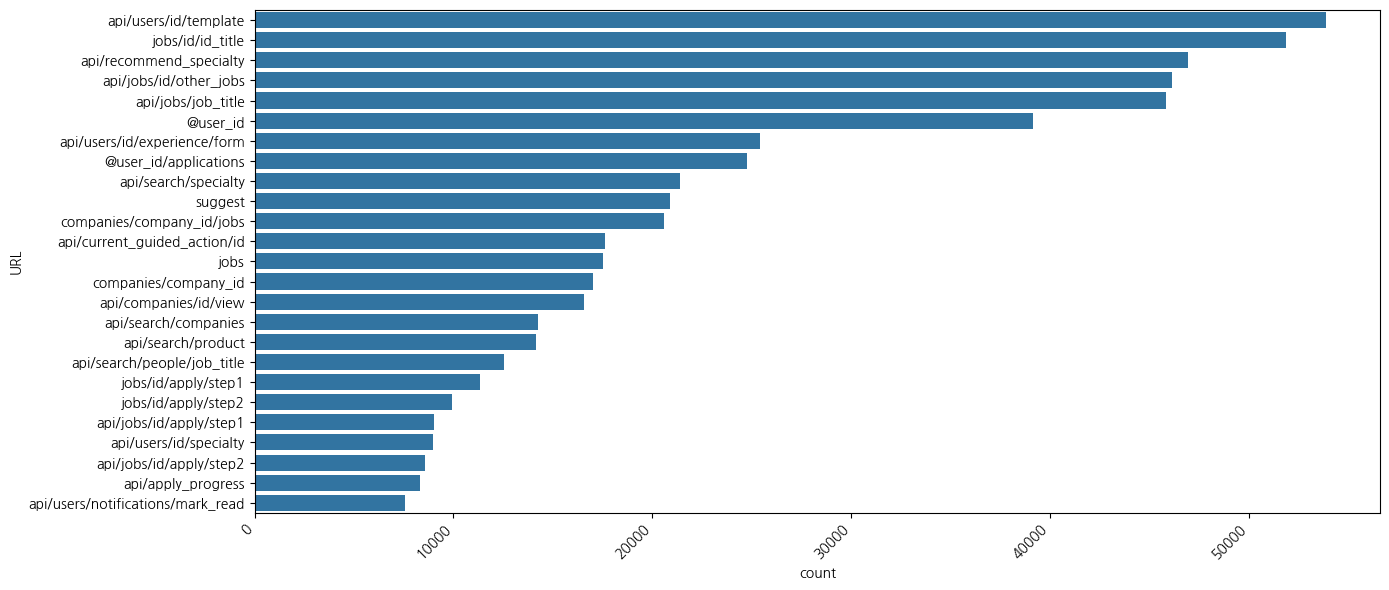

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))
sns.barplot(data=sort_df_a, x='count', y='URL', orient='h')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

### 2. 오퍼를 받지 않은 세그먼트

In [ ]:
sort_df = offer_not_received_df.sort_values('timestamp')

In [ ]:
sort_df = sort_df['URL'].value_counts().reset_index().head(25)
sort_df

,URL,count
0,api/recommend_specialty,9042
1,api/users/id/template,8407
2,jobs/id/id_title,7905
3,api/jobs/job_title,7424
4,api/jobs/id/other_jobs,7064
5,@user_id,5409
6,api/users/id/experience/form,5317
7,api/search/specialty,4188
8,api/search/product,3330
9,companies/company_id/jobs,3108


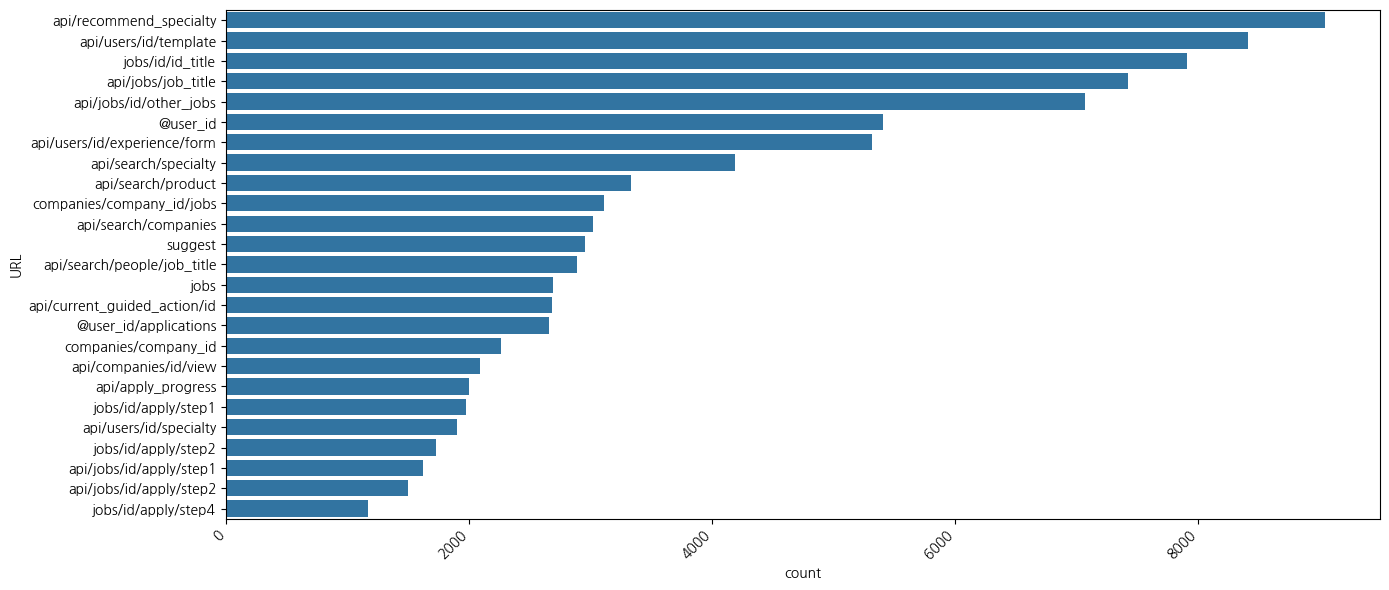

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))
sns.barplot(data=sort_df, x='count', y='URL', orient='h')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

## 5. 세그먼트별 추가 분석

### 1. 지원 단계의 체류시간 비교

### 1. 오퍼를 받은 세그먼트

In [ ]:
# 데이터 로드

df = offer_received_df.copy()


# 전처리
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df['Cleaned_URL'] = df['URL'].apply(lambda x: x.split('?')[0] if pd.notna(x) else x)

# URL 단계 태깅 함수
def tag_apply_step(url):
    if not isinstance(url, str):
        return None
    if 'apply/step1' in url:
        return 'step1'
    elif 'apply/step2' in url:
        return 'step2'
    elif 'apply/step3' in url:
        return 'step3'
    elif 'apply/step4' in url:
        return 'step4'
    else:
        return None

df['ApplyStep'] = df['Cleaned_URL'].apply(tag_apply_step)
apply_df = df[df['ApplyStep'].notnull()].copy()

# 각 사용자별 단계별 최초 진입 시간
apply_steps = apply_df.groupby(['user_uuid', 'ApplyStep'])['timestamp'].min().unstack()

# datetime 형변환
apply_steps = apply_steps.apply(pd.to_datetime)

# 체류 시간 계산 (분 단위)
apply_steps['step1_to_step2'] = (apply_steps['step2'] - apply_steps['step1']).dt.total_seconds() / 60
apply_steps['step2_to_step3'] = (apply_steps['step3'] - apply_steps['step2']).dt.total_seconds() / 60
apply_steps['step3_to_step4'] = (apply_steps['step4'] - apply_steps['step3']).dt.total_seconds() / 60

# 이상치 제거: 음수 및 3시간(180) 초과 제거
valid_apply_steps_6h = apply_steps[
    (apply_steps['step1_to_step2'] >= 0) & (apply_steps['step1_to_step2'] <= 180) &
    (apply_steps['step2_to_step3'] >= 0) & (apply_steps['step2_to_step3'] <= 180) &
    (apply_steps['step3_to_step4'] >= 0) & (apply_steps['step3_to_step4'] <= 180)
]

# 평균 체류 시간 계산
stay_time_3h_df = pd.DataFrame({
    'status': '오퍼 수신자',
    'step': ['step1', 'step2', 'step3', 'step4'],
    'stay_minutes': [
        valid_apply_steps_6h['step1_to_step2'].mean(),
        valid_apply_steps_6h['step2_to_step3'].mean(),
        valid_apply_steps_6h['step3_to_step4'].mean(),
        0  # step4는 마지막 단계이므로 체류 시간 없음
    ]
})

stay_time_3h_df

,status,step,stay_minutes
0,오퍼 수신자,step1,10.446004
1,오퍼 수신자,step2,2.137197
2,오퍼 수신자,step3,12.587259
3,오퍼 수신자,step4,0.000000


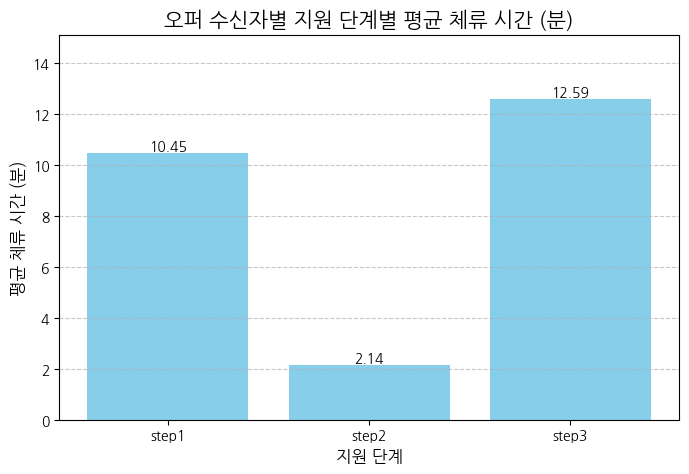

In [ ]:
# 시각화 데이터 준비
steps = ['step1', 'step2', 'step3']
stay_minutes = [10.45, 2.14, 12.59] # 제공된 수치를 사용

# 막대 그래프 시각화
plt.figure(figsize=(8, 5))
bars = plt.bar(steps, stay_minutes, color='skyblue')

# 그래프 위에 수치 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', va='bottom', ha='center') # 소수점 둘째 자리까지 표시

plt.title('오퍼 수신자별 지원 단계별 평균 체류 시간 (분)', fontsize=15)
plt.xlabel('지원 단계', fontsize=12)
plt.ylabel('평균 체류 시간 (분)', fontsize=12)
plt.ylim(0, max(stay_minutes) * 1.2) # y축 상한 조정
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 2. 오퍼를 받지 않은 세그먼트

In [ ]:
# 데이터 로드
df = pd.read_csv("/content/drive/MyDrive/09_데이터모음집/offer_not_received_df.csv")


# 전처리
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df['Cleaned_URL'] = df['URL'].apply(lambda x: x.split('?')[0] if pd.notna(x) else x)

# URL 단계 태깅 함수
def tag_apply_step(url):
    if not isinstance(url, str):
        return None
    if 'apply/step1' in url:
        return 'step1'
    elif 'apply/step2' in url:
        return 'step2'
    elif 'apply/step3' in url:
        return 'step3'
    elif 'apply/step4' in url:
        return 'step4'
    else:
        return None

df['ApplyStep'] = df['Cleaned_URL'].apply(tag_apply_step)
apply_df = df[df['ApplyStep'].notnull()].copy()

# 각 사용자별 단계별 최초 진입 시간
apply_steps = apply_df.groupby(['user_uuid', 'ApplyStep'])['timestamp'].min().unstack()

# datetime 형변환
apply_steps = apply_steps.apply(pd.to_datetime)

# 체류 시간 계산 (분 단위)
apply_steps['step1_to_step2'] = (apply_steps['step2'] - apply_steps['step1']).dt.total_seconds() / 60
apply_steps['step2_to_step3'] = (apply_steps['step3'] - apply_steps['step2']).dt.total_seconds() / 60
apply_steps['step3_to_step4'] = (apply_steps['step4'] - apply_steps['step3']).dt.total_seconds() / 60

# 이상치 제거: 음수 및 6시간(360분) 초과 제거
valid_apply_steps_6h = apply_steps[
    (apply_steps['step1_to_step2'] >= 0) & (apply_steps['step1_to_step2'] <= 360) &
    (apply_steps['step2_to_step3'] >= 0) & (apply_steps['step2_to_step3'] <= 360) &
    (apply_steps['step3_to_step4'] >= 0) & (apply_steps['step3_to_step4'] <= 360)
]

# 평균 체류 시간 계산
stay_time_6h_df = pd.DataFrame({
    'status': '오퍼 미수신자',
    'step': ['step1', 'step2', 'step3', 'step4'],
    'stay_minutes': [
        valid_apply_steps_6h['step1_to_step2'].mean(),
        valid_apply_steps_6h['step2_to_step3'].mean(),
        valid_apply_steps_6h['step3_to_step4'].mean(),
        0  # step4는 마지막 단계이므로 체류 시간 없음
    ]
})

stay_time_6h_df

,status,step,stay_minutes
0,오퍼 미수신자,step1,14.659261
1,오퍼 미수신자,step2,2.317255
2,오퍼 미수신자,step3,18.663492
3,오퍼 미수신자,step4,0.000000


In [ ]:
# 3시간 기준: 180분
# 3시간(180분) 이내 체류 시간 조건으로 필터링

valid_apply_steps_3h = apply_steps[
    (apply_steps['step1_to_step2'] >= 0) & (apply_steps['step1_to_step2'] <= 180) &
    (apply_steps['step2_to_step3'] >= 0) & (apply_steps['step2_to_step3'] <= 180) &
    (apply_steps['step3_to_step4'] >= 0) & (apply_steps['step3_to_step4'] <= 180)
]

# 평균 체류 시간 계산
stay_time_3h_df = pd.DataFrame({
    'status': '오퍼 미수신자',
    'step': ['step1', 'step2', 'step3', 'step4'],
    'stay_minutes': [
        valid_apply_steps_3h['step1_to_step2'].mean(),
        valid_apply_steps_3h['step2_to_step3'].mean(),
        valid_apply_steps_3h['step3_to_step4'].mean(),
        0  # step4는 마지막 단계이므로 체류 시간 없음
    ]
})


stay_time_3h_df

,status,step,stay_minutes
0,오퍼 미수신자,step1,10.585294
1,오퍼 미수신자,step2,2.426282
2,오퍼 미수신자,step3,7.549749
3,오퍼 미수신자,step4,0.000000


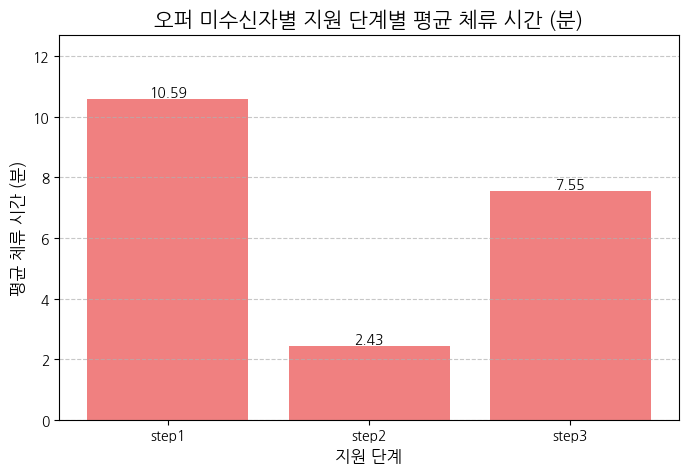

In [ ]:
# 시각화 데이터 준비 (오퍼 미수신자)
steps_not_received = ['step1', 'step2', 'step3']
stay_minutes_not_received = [10.59, 2.43, 7.55] # 제공된 수치를 사용

# 막대 그래프 시각화
plt.figure(figsize=(8, 5))
bars_not_received = plt.bar(steps_not_received, stay_minutes_not_received, color='lightcoral')

# 그래프 위에 수치 표시
for bar in bars_not_received:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', va='bottom', ha='center') # 소수점 둘째 자리까지 표시

plt.title('오퍼 미수신자별 지원 단계별 평균 체류 시간 (분)', fontsize=15)
plt.xlabel('지원 단계', fontsize=12)
plt.ylabel('평균 체류 시간 (분)', fontsize=12)
plt.ylim(0, max(stay_minutes_not_received) * 1.2) # y축 상한 조정
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

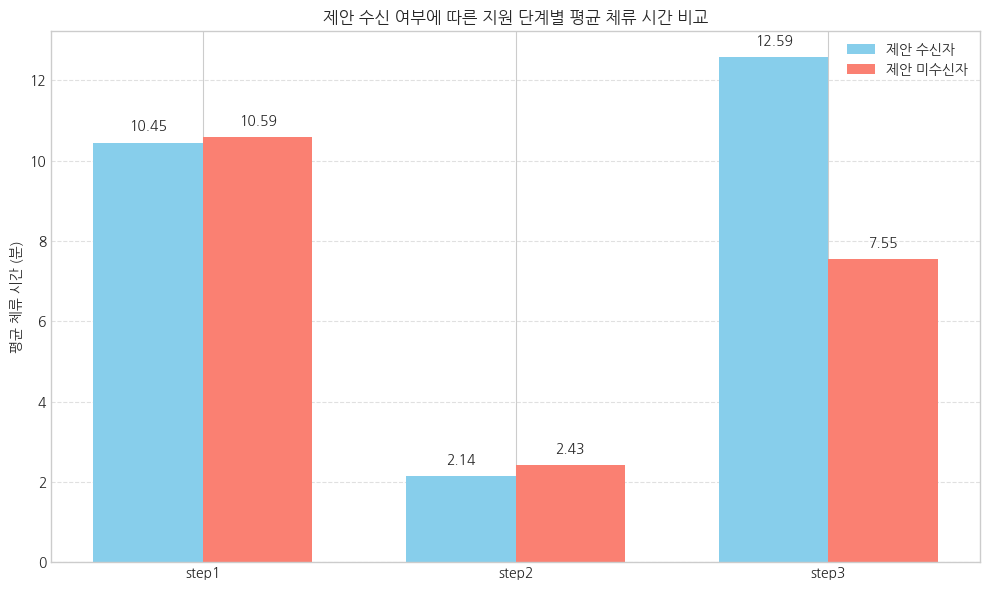

In [ ]:
# 단계별 평균 체류 시간 데이터
offer_received_time = [10.45, 2.14, 12.59]
offer_not_received_time = [10.59, 2.43, 7.55]

# 단계 이름
steps = ['step1', 'step2', 'step3']
x = np.arange(len(steps))
bar_width = 0.35

plt.figure(figsize=(10, 6))
bars1 = plt.bar(x - bar_width/2, offer_received_time, bar_width, label='제안 수신자', color='skyblue')
bars2 = plt.bar(x + bar_width/2, offer_not_received_time, bar_width, label='제안 미수신자', color='salmon')

# 바 위에 수치 표기
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.3, f'{height:.2f}', ha='center', fontsize=10)
for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.3, f'{height:.2f}', ha='center', fontsize=10)

# 그래프 설정
plt.xticks(x, steps)
plt.ylabel('평균 체류 시간 (분)')
plt.title('제안 수신 여부에 따른 지원 단계별 평균 체류 시간 비교')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


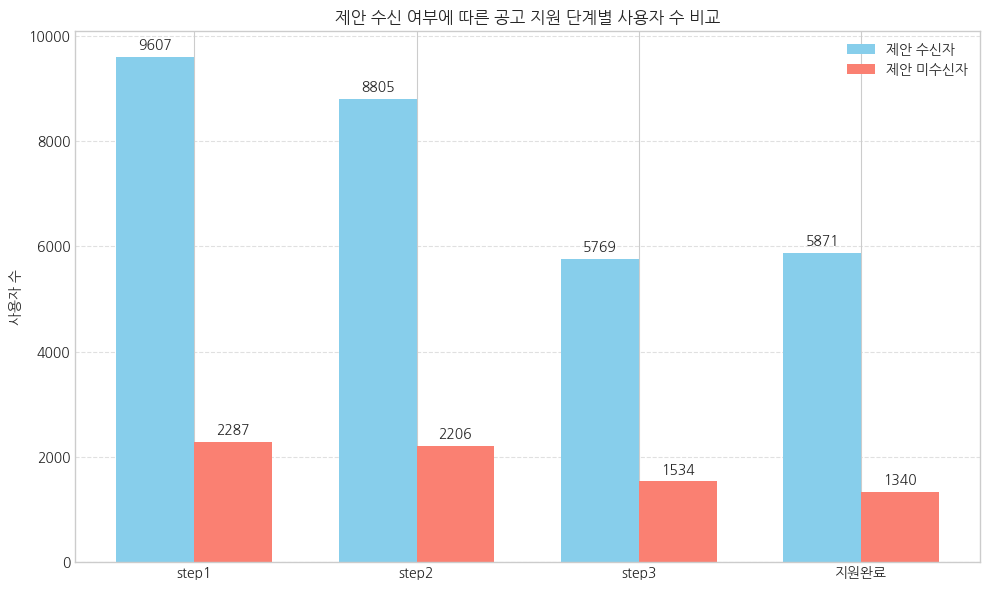

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 단계 이름 및 값
steps = ['step1', 'step2', 'step3', '지원완료']
offer_received_counts = [9607, 8805, 5769, 5871]
offer_not_received_counts = [2287, 2206, 1534, 1340]

x = np.arange(len(steps))
bar_width = 0.35

plt.figure(figsize=(10, 6))
bars1 = plt.bar(x - bar_width/2, offer_received_counts, bar_width, label='제안 수신자', color='skyblue')
bars2 = plt.bar(x + bar_width/2, offer_not_received_counts, bar_width, label='제안 미수신자', color='salmon')

# 바 위에 수치 표기
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 150, f'{int(height)}', ha='center', fontsize=10)
for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 150, f'{int(height)}', ha='center', fontsize=10)

# 그래프 설정
plt.xticks(x, steps)
plt.ylabel('사용자 수')
plt.title('제안 수신 여부에 따른 공고 지원 단계별 사용자 수 비교')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
from scipy import stats
import numpy as np
import pandas as pd

# 실제 데이터가 있다고 가정하고 예시 데이터를 만듭니다.
# 실제 분석 시에는 이 예시 데이터를 사용자의 실제 데이터로 교체해야 합니다.
# 예시 데이터: 각 단계별 오퍼 수신 그룹과 미수신 그룹의 체류 시간 (분)
np.random.seed(42) # 결과 재현을 위한 시드 설정

# 오퍼 수신 그룹 예시 데이터 (평균 주변, 약간의 분산 포함)
step1_received = np.random.normal(10.45, 5, 100) # 평균 10.45, 표준편차 5, 100개 데이터
step2_received = np.random.normal(2.14, 2, 100)  # 평균 2.14, 표준편차 2, 100개 데이터
step3_received = np.random.normal(12.59, 6, 100) # 평균 12.59, 표준편차 6, 100개 데이터

# 오퍼 미수신 그룹 예시 데이터
step1_not_received = np.random.normal(10.59, 5, 100)
step2_not_received = np.random.normal(2.43, 2, 100)
step3_not_received = np.random.normal(7.55, 6, 100)


# --- 각 단계별 독립 표본 t-검정 수행 ---

print("--- 지원 단계별 평균 체류 시간 통계 검정 ---")

# Step 1 검정
print("\n> Step 1 (회원 가입 완료 -> 공고 진입) 체류 시간 검정:")
t_stat_step1, p_value_step1 = stats.ttest_ind(step1_received, step1_not_received, equal_var=False) # Welch's t-test 사용 (등분산 가정 안 함)
print(f"  T-statistic: {t_stat_step1:.4f}")
print(f"  P-value: {p_value_step1:.4f}")
alpha = 0.05
if p_value_step1 < alpha:
    print(f"  P-value ({p_value_step1:.4f})는 유의수준 {alpha}보다 작으므로, 두 그룹의 Step 1 평균 체류 시간에는 유의미한 차이가 있습니다.")
else:
    print(f"  P-value ({p_value_step1:.4f})는 유의수준 {alpha}보다 크므로, 두 그룹의 Step 1 평균 체류 시간에는 유의미한 차이가 없습니다.")

# Step 2 검정
print("\n> Step 2 (공고 진입 -> Step1~Step3 작성) 체류 시간 검정:")
t_stat_step2, p_value_step2 = stats.ttest_ind(step2_received, step2_not_received, equal_var=False) # Welch's t-test 사용
print(f"  T-statistic: {t_stat_step2:.4f}")
print(f"  P-value: {p_value_step2:.4f}")
if p_value_step2 < alpha:
    print(f"  P-value ({p_value_step2:.4f})는 유의수준 {alpha}보다 작으므로, 두 그룹의 Step 2 평균 체류 시간에는 유의미한 차이가 있습니다.")
else:
    print(f"  P-value ({p_value_step2:.4f})는 유의수준 {alpha}보다 크므로, 두 그룹의 Step 2 평균 체류 시간에는 유의미한 차이가 없습니다.")

# Step 3 검정
print("\n> Step 3 (Step1~Step3 작성 -> 지원 완료) 체류 시간 검정:")
t_stat_step3, p_value_step3 = stats.ttest_ind(step3_received, step3_not_received, equal_var=False) # Welch's t-test 사용
print(f"  T-statistic: {t_stat_step3:.4f}")
print(f"  P-value: {p_value_step3:.4f}")
if p_value_step3 < alpha:
    print(f"  P-value ({p_value_step3:.4f})는 유의수준 {alpha}보다 작으므로, 두 그룹의 Step 3 평균 체류 시간에는 유의미한 차이가 있습니다.")
else:
    print(f"  P-value ({p_value_step3:.4f})는 유의수준 {alpha}보다 크므로, 두 그룹의 Step 3 평균 체류 시간에는 유의미한 차이가 없습니다.")

print("\n--- 검정 완료 ---")

--- 지원 단계별 평균 체류 시간 통계 검정 ---

> Step 1 (회원 가입 완료 -> 공고 진입) 체류 시간 검정:
  T-statistic: -1.8832
  P-value: 0.0611
  P-value (0.0611)는 유의수준 0.05보다 크므로, 두 그룹의 Step 1 평균 체류 시간에는 유의미한 차이가 없습니다.

> Step 2 (공고 진입 -> Step1~Step3 작성) 체류 시간 검정:
  T-statistic: -0.4668
  P-value: 0.6412
  P-value (0.6412)는 유의수준 0.05보다 크므로, 두 그룹의 Step 2 평균 체류 시간에는 유의미한 차이가 없습니다.

> Step 3 (Step1~Step3 작성 -> 지원 완료) 체류 시간 검정:
  T-statistic: 7.1629
  P-value: 0.0000
  P-value (0.0000)는 유의수준 0.05보다 작으므로, 두 그룹의 Step 3 평균 체류 시간에는 유의미한 차이가 있습니다.

--- 검정 완료 ---


### 2. 지원 단계의 체류 빈도수 비교

### 1. 오퍼를 받은 세그먼트

In [ ]:
df = offer_received_df.copy()


# 타임스탬프 및 URL 정제
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df['Cleaned_URL'] = df['URL'].apply(lambda x: x.split('?')[0] if pd.notna(x) else x)

# URL에서 지원 단계 태깅
def tag_apply_step(url):
    if not isinstance(url, str):
        return None
    if 'apply/step1' in url:
        return 'step1'
    elif 'apply/step2' in url:
        return 'step2'
    elif 'apply/step3' in url:
        return 'step3'
    elif 'apply/step4' in url:
        return 'step4'
    else:
        return None

df['ApplyStep'] = df['Cleaned_URL'].apply(tag_apply_step)
apply_df = df[df['ApplyStep'].notnull()].copy()

# 사용자별 각 단계 최초 진입 시간 계산
apply_steps = apply_df.groupby(['user_uuid', 'ApplyStep'])['timestamp'].min().unstack()
apply_steps = apply_steps.apply(pd.to_datetime)

# 단계 간 체류 시간 계산 (분 단위)
apply_steps['step1_to_step2'] = (apply_steps['step2'] - apply_steps['step1']).dt.total_seconds() / 60
apply_steps['step2_to_step3'] = (apply_steps['step3'] - apply_steps['step2']).dt.total_seconds() / 60
apply_steps['step3_to_step4'] = (apply_steps['step4'] - apply_steps['step3']).dt.total_seconds() / 60

# 3일 기준 (4320분) 필터링
valid_apply_steps_3d = apply_steps[
    (apply_steps['step1_to_step2'] >= 0) & (apply_steps['step1_to_step2'] <= 4320) &
    (apply_steps['step2_to_step3'] >= 0) & (apply_steps['step2_to_step3'] <= 4320) &
    (apply_steps['step3_to_step4'] >= 0) & (apply_steps['step3_to_step4'] <= 4320)
]

# 3일 기준 사용자만 추출
valid_users_3d = valid_apply_steps_3d.index

# 원본 로그에서 3일 기준 사용자들의 단계별 로그 수 계산
filtered_apply_df_3d = apply_df[apply_df['user_uuid'].isin(valid_users_3d)]
stage_count_3d = filtered_apply_df_3d['ApplyStep'].value_counts().reset_index()
stage_count_3d.columns = ['step', 'log_count']
stage_count_3d = stage_count_3d.sort_values(by='step')

# 출력
stage_count_3d

,step,log_count
0,step1,9607
1,step2,8805
3,step3,5769
2,step4,5871


### 2. 오퍼를 받지 않은 세그먼트

In [ ]:

# CSV 파일 로드
df = pd.read_csv("/content/drive/MyDrive/09_데이터모음집/offer_received_df.csv")


# 타임스탬프 및 URL 정제
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df['Cleaned_URL'] = df['URL'].apply(lambda x: x.split('?')[0] if pd.notna(x) else x)

# URL에서 지원 단계 태깅
def tag_apply_step(url):
    if not isinstance(url, str):
        return None
    if 'apply/step1' in url:
        return 'step1'
    elif 'apply/step2' in url:
        return 'step2'
    elif 'apply/step3' in url:
        return 'step3'
    elif 'apply/step4' in url:
        return 'step4'
    else:
        return None

df['ApplyStep'] = df['Cleaned_URL'].apply(tag_apply_step)
apply_df = df[df['ApplyStep'].notnull()].copy()

# 사용자별 각 단계 최초 진입 시간 계산
apply_steps = apply_df.groupby(['user_uuid', 'ApplyStep'])['timestamp'].min().unstack()
apply_steps = apply_steps.apply(pd.to_datetime)

# 단계 간 체류 시간 계산 (분 단위)
apply_steps['step1_to_step2'] = (apply_steps['step2'] - apply_steps['step1']).dt.total_seconds() / 60
apply_steps['step2_to_step3'] = (apply_steps['step3'] - apply_steps['step2']).dt.total_seconds() / 60
apply_steps['step3_to_step4'] = (apply_steps['step4'] - apply_steps['step3']).dt.total_seconds() / 60

# 3일 기준 (4320분) 필터링
valid_apply_steps_3d = apply_steps[
    (apply_steps['step1_to_step2'] >= 0) & (apply_steps['step1_to_step2'] <= 4320) &
    (apply_steps['step2_to_step3'] >= 0) & (apply_steps['step2_to_step3'] <= 4320) &
    (apply_steps['step3_to_step4'] >= 0) & (apply_steps['step3_to_step4'] <= 4320)
]

# 3일 기준 사용자만 추출
valid_users_3d = valid_apply_steps_3d.index

# 원본 로그에서 3일 기준 사용자들의 단계별 로그 수 계산
filtered_apply_df_3d = apply_df[apply_df['user_uuid'].isin(valid_users_3d)]
stage_count_3d = filtered_apply_df_3d['ApplyStep'].value_counts().reset_index()
stage_count_3d.columns = ['step', 'log_count']
stage_count_3d = stage_count_3d.sort_values(by='step')

# 출력
stage_count_3d

,step,log_count
0,step1,9607
1,step2,8805
3,step3,5769
2,step4,5871


In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# 데이터 로드
received_path = "/content/drive/MyDrive/09_데이터모음집/offer_received_df.csv"
not_received_path = "/content/drive/MyDrive/09_데이터모음집/offer_not_received_df.csv"

offer_received_df = pd.read_csv(received_path)
offer_not_received_df = pd.read_csv(not_received_path)

# 타임스탬프 및 URL 정리
for df in [offer_received_df, offer_not_received_df]:
    df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
    df['Cleaned_URL'] = df['URL'].apply(lambda x: x.split('?')[0] if pd.notna(x) else x)

    def tag_apply_step(url):
        if not isinstance(url, str):
            return None
        if 'apply/step1' in url:
            return 'step1'
        elif 'apply/step2' in url:
            return 'step2'
        elif 'apply/step3' in url:
            return 'step3'
        elif 'apply/step4' in url:
            return 'step4'
        else:
            return None

    df['ApplyStep'] = df['Cleaned_URL'].apply(tag_apply_step)

# 각 사용자별 단계별 최초 진입 시간 계산
def compute_step_times(df):
    apply_df = df[df['ApplyStep'].notnull()].copy()
    apply_steps = apply_df.groupby(['user_uuid', 'ApplyStep'])['timestamp'].min().unstack()
    apply_steps = apply_steps.apply(pd.to_datetime)

    apply_steps['step1_to_step2'] = (apply_steps['step2'] - apply_steps['step1']).dt.total_seconds() / 60
    apply_steps['step2_to_step3'] = (apply_steps['step3'] - apply_steps['step2']).dt.total_seconds() / 60
    apply_steps['step3_to_step4'] = (apply_steps['step4'] - apply_steps['step3']).dt.total_seconds() / 60

    # 이상치 제거: 음수 또는 3시간 초과 제거
    valid_steps = apply_steps[
        (apply_steps['step1_to_step2'] >= 0) & (apply_steps['step1_to_step2'] <= 180) &
        (apply_steps['step2_to_step3'] >= 0) & (apply_steps['step2_to_step3'] <= 180) &
        (apply_steps['step3_to_step4'] >= 0) & (apply_steps['step3_to_step4'] <= 180)
    ]
    return valid_steps

received_steps = compute_step_times(offer_received_df)
not_received_steps = compute_step_times(offer_not_received_df)

# T-test 수행
t_test_results = {}
for step in ['step1_to_step2', 'step2_to_step3', 'step3_to_step4']:
    t_stat, p_val = ttest_ind(
        received_steps[step].dropna(),
        not_received_steps[step].dropna(),
        equal_var=False
    )
    t_test_results[step] = {'t_statistic': t_stat, 'p_value': p_val}

t_test_results


{'step1_to_step2': {'t_statistic': np.float64(-0.05287959850219395),
  'p_value': np.float64(0.9578969569844831)},
 'step2_to_step3': {'t_statistic': np.float64(-0.4643662482856987),
  'p_value': np.float64(0.6432369388792802)},
 'step3_to_step4': {'t_statistic': np.float64(2.278967368846695),
  'p_value': np.float64(0.023445594137515336)}}

Acquisition 단계에 포함된 제안 수신 사용자 수: 611명
Acquisition 단계에 포함된 탐색만 반복하는 사용자 수: 30명
두 그룹 간 중복 사용자 수: 2명
중복 제거 후 탐색만 반복하는 사용자 수: 28명
제안 수신 사용자 로그 데이터 행 수: 772696
탐색만 반복하는 사용자 로그 데이터 행 수: 8823

평균 로그 수 - 제안 수신 사용자: 1264.64
평균 로그 수 - 탐색만 반복하는 사용자: 315.11

평균 공고 상세 페이지 조회 수 - 제안 수신 사용자: 283.84
평균 공고 상세 페이지 조회 수 - 탐색만 반복하는 사용자: 31.79

평균 북마크 수 - 제안 수신 사용자: 12.68
평균 북마크 수 - 탐색만 반복하는 사용자: 4.22

평균 활동 기간 (일) - 제안 수신 사용자: 148.69
평균 활동 기간 (일) - 탐색만 반복하는 사용자: 85.46


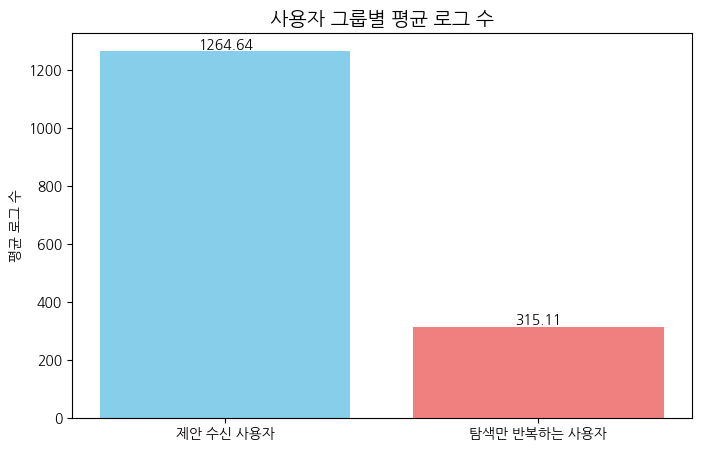

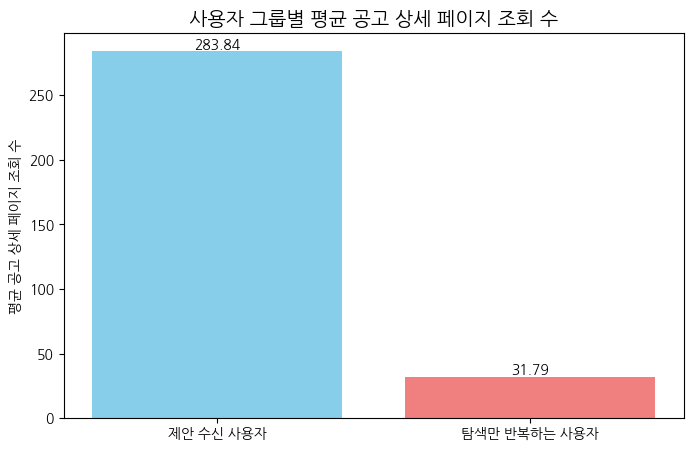

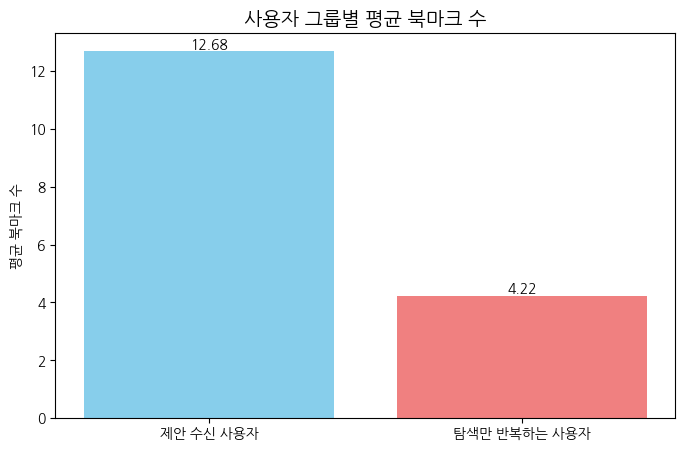

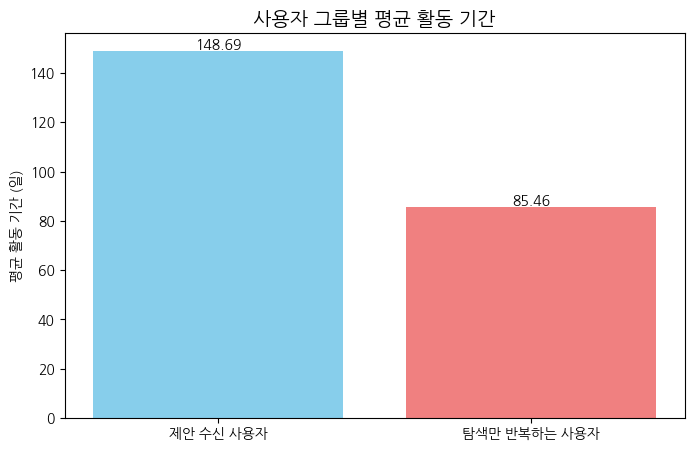

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

# 이미 로드된 acquisition_df 사용
# acquisition_df = pd.read_csv(...) # 실제 노트북에서는 이미 로드되어 있음

# 데이터 타입 확인 및 변환 (필요시)
acquisition_df['timestamp'] = pd.to_datetime(acquisition_df['timestamp'], errors='coerce')

# ----------- 사용자 그룹 정의 -----------

# 1. 제안 수신 사용자 그룹 (노트북에서 이미 정의된 그룹 사용)
# 오퍼를 받은 기록이 있고 (offer_received_df_sort),
# 이 사용자들이 acquisition_df에 포함되는지 확인
offer_received_users = acquisition_df[
    acquisition_df['URL'].str.contains('@user_id/job_offer/received', na=False)
]['user_uuid'].unique()

# 실제 분석에 사용할 '제안 수신 사용자'는 오퍼를 받은 기록이 있고
# acquisition 단계에 포함된 유저로 정의합니다.
offer_users_in_acquisition = acquisition_df[
    acquisition_df['user_uuid'].isin(offer_received_users)
]['user_uuid'].unique()

print(f"Acquisition 단계에 포함된 제안 수신 사용자 수: {len(offer_users_in_acquisition)}명")

# 2. 탐색만 반복하는 사용자 그룹 정의
# - Acquisition 단계에 포함 (acquisition_df의 user_uuid)
# - 지원 완료 기록 없음 (api/jobs/id/apply/step4)
# - 공고 상세 페이지 조회 기록 있음 (jobs/id)

# 지원 완료한 사용자 (Acquisition 단계에 있는 사용자 중에서)
applied_users_in_acquisition = acquisition_df[
    acquisition_df['URL'] == 'api/jobs/id/apply/step4'
]['user_uuid'].unique()

# 공고 상세 페이지 조회 기록이 있는 사용자 (Acquisition 단계에 있는 사용자 중에서)
job_viewed_users_in_acquisition = acquisition_df[
    acquisition_df['URL'].str.contains('jobs/id', na=False) &
    ~acquisition_df['URL'].str.contains('jobs/id/apply', na=False) # apply 관련 제외
]['user_uuid'].unique()


# '탐색만 반복하는 사용자' 정의
# acquisition_df 유저 중 AND 지원 완료 안 했고 AND 공고 상세 페이지를 본 유저
exploring_only_users = acquisition_df[
    acquisition_df['user_uuid'].isin(acquisition_df['user_uuid'].unique()) &
    ~acquisition_df['user_uuid'].isin(applied_users_in_acquisition) &
    acquisition_df['user_uuid'].isin(job_viewed_users_in_acquisition)
]['user_uuid'].unique()


print(f"Acquisition 단계에 포함된 탐색만 반복하는 사용자 수: {len(exploring_only_users)}명")

# 두 그룹 간 중복 사용자 확인 (분석의 명확성을 위해 중복 제거를 고려할 수 있습니다)
common_users = set(offer_users_in_acquisition) & set(exploring_only_users)
print(f"두 그룹 간 중복 사용자 수: {len(common_users)}명")

# 분석을 위해 중복 사용자를 제거하고 그룹을 재정의합니다.
# 탐색만 하는 그룹에서 제안 수신 사용자 제거
exploring_only_users_exclusive = [user for user in exploring_only_users if user not in offer_users_in_acquisition]
print(f"중복 제거 후 탐색만 반복하는 사용자 수: {len(exploring_only_users_exclusive)}명")

# 제안 수신 사용자 그룹 (이미 중복 제거된 그룹을 사용하거나, 필요시 여기에서 제거)
# 여기서는 이미 정의된 offer_users_in_acquisition를 사용합니다.


# ----------- 그룹별 데이터 필터링 -----------

# 제안 수신 사용자 그룹의 로그 데이터
offer_log_df = acquisition_df[acquisition_df['user_uuid'].isin(offer_users_in_acquisition)].copy()

# 탐색만 반복하는 사용자 그룹의 로그 데이터 (중복 제거된 그룹 사용)
exploring_log_df = acquisition_df[acquisition_df['user_uuid'].isin(exploring_only_users_exclusive)].copy()

print(f"제안 수신 사용자 로그 데이터 행 수: {len(offer_log_df)}")
print(f"탐색만 반복하는 사용자 로그 데이터 행 수: {len(exploring_log_df)}")

# ----------- 행동 패턴 비교 -----------

# 1. 평균 로그 수 비교
avg_logs_offer = offer_log_df.groupby('user_uuid').size().mean() if not offer_log_df.empty else 0
avg_logs_exploring = exploring_log_df.groupby('user_uuid').size().mean() if not exploring_log_df.empty else 0

print(f"\n평균 로그 수 - 제안 수신 사용자: {avg_logs_offer:.2f}")
print(f"평균 로그 수 - 탐색만 반복하는 사용자: {avg_logs_exploring:.2f}")

# 2. 특정 URL 접속 빈도 비교 (예: 공고 상세 페이지)
job_view_url = 'jobs/id'
offer_job_views = offer_log_df[offer_log_df['URL'].str.contains(job_view_url, na=False)].groupby('user_uuid').size().mean() if not offer_log_df.empty else 0
exploring_job_views = exploring_log_df[exploring_log_df['URL'].str.contains(job_view_url, na=False)].groupby('user_uuid').size().mean() if not exploring_log_df.empty else 0

print(f"\n평균 공고 상세 페이지 조회 수 - 제안 수신 사용자: {offer_job_views:.2f}")
print(f"평균 공고 상세 페이지 조회 수 - 탐색만 반복하는 사용자: {exploring_job_views:.2f}")


# 3. 다른 기능 사용 비교 (예: 북마크)
bookmark_url = 'api/jobs/id/bookmark'
offer_bookmarks = offer_log_df[offer_log_df['URL'].str.contains(bookmark_url, na=False)].groupby('user_uuid').size().mean() if not offer_log_df.empty else 0
exploring_bookmarks = exploring_log_df[exploring_log_df['URL'].str.contains(bookmark_url, na=False)].groupby('user_uuid').size().mean() if not exploring_log_df.empty else 0

print(f"\n평균 북마크 수 - 제안 수신 사용자: {offer_bookmarks:.2f}")
print(f"평균 북마크 수 - 탐색만 반복하는 사용자: {exploring_bookmarks:.2f}")

# 4. 활동 기간 (첫 로그부터 마지막 로그까지의 일수) 비교
def calculate_activity_days(df):
    if df.empty:
        return 0
    grouped = df.groupby('user_uuid')['timestamp'].agg(['min', 'max'])
    # 활동 기간 계산 (최소 1일)
    activity_days = (grouped['max'] - grouped['min']).dt.days + 1
    return activity_days.mean()

avg_activity_days_offer = calculate_activity_days(offer_log_df)
avg_activity_days_exploring = calculate_activity_days(exploring_log_df)

print(f"\n평균 활동 기간 (일) - 제안 수신 사용자: {avg_activity_days_offer:.2f}")
print(f"평균 활동 기간 (일) - 탐색만 반복하는 사용자: {avg_activity_days_exploring:.2f}")


# ----------- 시각화 -----------

# 평균 로그 수 시각화
labels = ['제안 수신 사용자', '탐색만 반복하는 사용자']
avg_logs = [avg_logs_offer, avg_logs_exploring]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, avg_logs, color=['skyblue', 'lightcoral'])
plt.ylabel('평균 로그 수')
plt.title('사용자 그룹별 평균 로그 수', fontsize=14)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')
plt.show()

# 평균 공고 상세 페이지 조회 수 시각화
avg_job_views = [offer_job_views, exploring_job_views]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, avg_job_views, color=['skyblue', 'lightcoral'])
plt.ylabel('평균 공고 상세 페이지 조회 수')
plt.title('사용자 그룹별 평균 공고 상세 페이지 조회 수', fontsize=14)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')
plt.show()

# 평균 북마크 수 시각화
avg_bookmarks = [offer_bookmarks, exploring_bookmarks]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, avg_bookmarks, color=['skyblue', 'lightcoral'])
plt.ylabel('평균 북마크 수')
plt.title('사용자 그룹별 평균 북마크 수', fontsize=14)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')
plt.show()


# 평균 활동 기간 시각화
avg_activity = [avg_activity_days_offer, avg_activity_days_exploring]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, avg_activity, color=['skyblue', 'lightcoral'])
plt.ylabel('평균 활동 기간 (일)')
plt.title('사용자 그룹별 평균 활동 기간', fontsize=14)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')
plt.show()

핵심 요약:

분석 결과, '제안 수신 사용자' 그룹이 '탐색만 반복하는 사용자' 그룹에 비해 전반적으로 훨씬 더 활발하고 장기적으로 서비스를 이용하는 패턴을 보입니다.

세부적인 결과 해석 및 인사이트:

그룹 규모의 차이:

제안 수신 사용자 그룹 (611명)은 탐색만 반복하는 사용자 그룹 (28명, 중복 제거 후)에 비해 압도적으로 규모가 큽니다. 이는 제안 수신 경험 자체가 서비스 사용자의 큰 비중을 차지하거나, 제안을 받은 사용자가 이후에도 서비스에 잔존할 가능성이 높다는 것을 시사합니다.
탐색만 반복하는 사용자 그룹의 수가 적다는 점은 이 그룹의 특성을 일반화하기에는 조심스러운 부분이 있지만, 적어도 2023년 신규 유입 고객 중에서는 '지원까지 가지 않고 탐색만 반복하는' 사용자가 상대적으로 소수인 것으로 보입니다. (하지만 이는 탐색만 반복하는 사용자의 정의에 따라 달라질 수 있습니다.)
활동량 (평균 로그 수) 차이:

제안 수신 사용자의 평균 로그 수 (1264.64)는 탐색만 반복하는 사용자의 평균 로그 수 (315.11)보다 약 4배 이상 높습니다. 이는 제안을 받은 사용자들이 서비스 내에서 다양한 활동을 훨씬 더 많이 수행하고 있음을 명확히 보여줍니다.
공고 탐색 행동 차이:

제안 수신 사용자의 평균 공고 상세 페이지 조회 수 (283.84)는 탐색만 반복하는 사용자의 평균 (31.79)보다 약 9배 가까이 높습니다. '탐색만 반복하는' 사용자 그룹을 공고 상세 페이지 조회를 기준으로 정의했음에도 불구하고, 제안을 받은 사용자들이 개별 공고에 더 깊이 관여하고 탐색하는 경향이 강함을 알 수 있습니다. 이는 제안이 사용자에게 특정 공고에 대한 관심을 유도하고 더 적극적인 탐색으로 이어질 수 있음을 시사합니다.
핵심 기능 활용 차이 (북마크):

제안 수신 사용자의 평균 북마크 수 (12.68)는 탐색만 반복하는 사용자의 평균 (4.22)보다 약 3배 높습니다. 북마크는 공고에 대한 관심을 표시하고 나중에 다시 확인하기 위한 행동이므로, 제안을 받은 사용자들이 탐색 과정에서 더 많은 공고에 대해 긍정적인 반응을 보이고 후속 행동(지원 등)으로 이어질 가능성이 높음을 나타냅니다.
활동 기간 차이:

제안 수신 사용자의 평균 활동 기간 (148.69일)은 탐색만 반복하는 사용자의 평균 (85.46일)보다 훨씬 길습니다. 이는 제안 수신 경험이 사용자의 장기적인 서비스 잔존 및 이용에 긍정적인 영향을 미칠 수 있음을 강력하게 시사합니다. 제안을 받은 사용자들은 서비스 이탈 없이 더 오랫동안 활동하는 경향이 있습니다.
종합적인 결론:

제공된 데이터 분석 결과에 따르면, 채용 플랫폼에서 제안을 수신한 사용자는 제안을 받지 않고 탐색만 반복하는 사용자에 비해 서비스 이용량이 훨씬 많고, 다양한 핵심 기능을 더 적극적으로 사용하며, 결과적으로 서비스에 더 오랫동안 잔존하는 경향이 있습니다.

이를 통해 이야기할 수 있는 시사점:

제안 기능의 중요성: 제안 수신 경험은 사용자의 서비스 참여도와 잔존율을 높이는 데 매우 중요한 역할을 하는 것으로 보입니다. 이는 제안 기능의 가치를 데이터로 증명하는 근거가 될 수 있습니다.
제안 수신 경험 확대의 필요성: 더 많은 사용자가 제안을 받을 수 있도록 시스템을 개선하거나, 사용자 프로필/이력서 정보 업데이트를 유도하여 기업으로부터 제안을 받을 기회를 늘리는 전략이 필요할 수 있습니다.
탐색만 하는 사용자에 대한 전략: 탐색만 반복하고 핵심 가치(지원)로 이어지지 않는 사용자 그룹의 이탈을 방지하고 활성화를 유도하기 위한 별도의 접근 방식이 필요합니다.
왜 탐색만 하는지 추가 분석 (어떤 공고를 보는지, 어떤 키워드로 검색하는지 등)
맞춤형 공고 추천 시스템 개선
지원 프로세스 간소화 또는 가이드 제공
이력서 작성, 면접 팁 등 구직 활동 관련 부가 서비스 제공
이 그룹에게 제안 수신 기회를 늘릴 수 있는 방법을 안내
이 분석은 제안 수신이라는 이벤트가 사용자의 행동에 미치는 긍정적인 영향력을 보여주며, 사용자 활성화 및 잔존율 향상을 위한 전략 수립에 중요한 기초 자료가 될 수 있습니다.

# 세그먼트별 리텐션

Acquisition 단계에 포함된 제안 수신 사용자 수: 611명
Acquisition 단계에 포함된 제안 받지 않은 사용자 수: 1450명


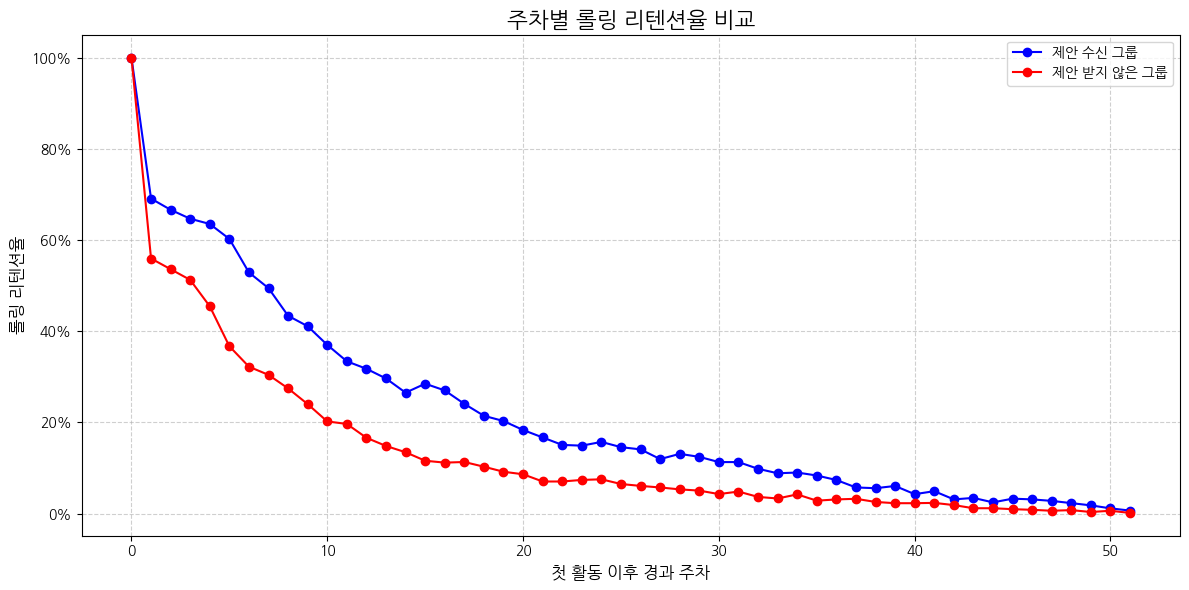

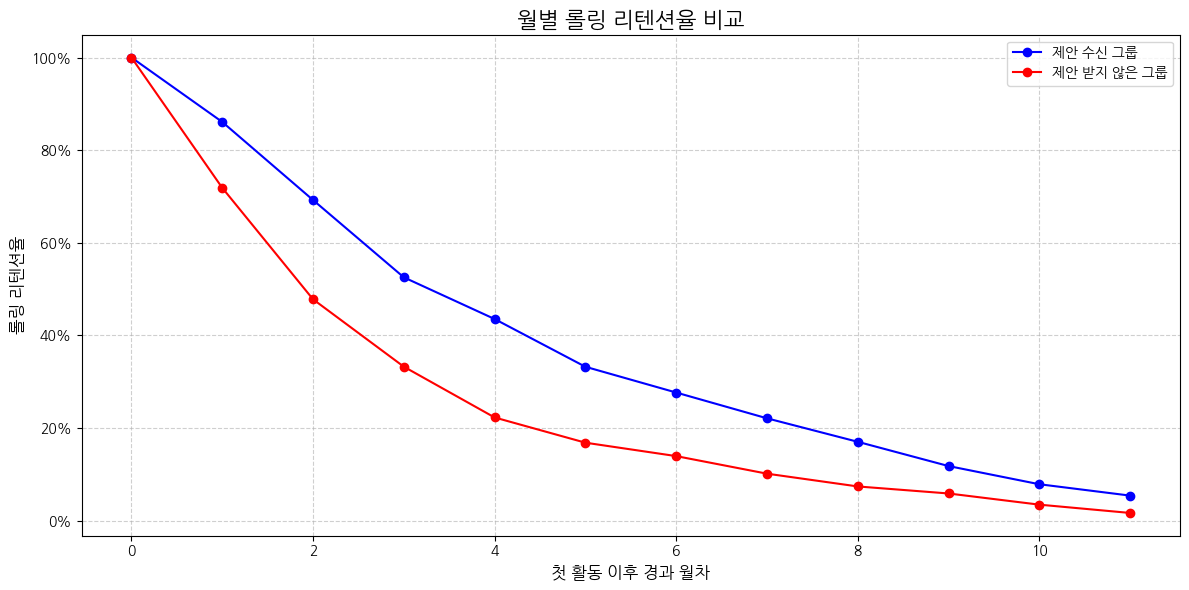


제안 수신 그룹 주차별 롤링 리텐션 (일부):
   period  retention_rate
0       0        1.000000
1       1        0.690671
2       2        0.666121
3       3        0.646481
4       4        0.635025

제안 받지 않은 그룹 주차별 롤링 리텐션 (일부):
   period  retention_rate
0       0        1.000000
1       1        0.559310
2       2        0.535862
3       3        0.512414
4       4        0.454483

제안 수신 그룹 월별 롤링 리텐션 (일부):
   period  retention_rate
0       0        1.000000
1       1        0.860884
2       2        0.692308
3       3        0.525368
4       4        0.435352

제안 받지 않은 그룹 월별 롤링 리텐션 (일부):
   period  retention_rate
0       0        1.000000
1       1        0.718621
2       2        0.477931
3       3        0.332414
4       4        0.222759


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

# 이미 로드된 acquisition_df 사용
# acquisition_df = pd.read_csv(...) # 실제 노트북에서는 이미 로드되어 있음

# 데이터 타입 확인 및 변환 (필요시)
# UTC 정보를 제거하여 datetime 변환 오류 방지 (노트북 앞부분의 처리를 반영)
acquisition_df['timestamp'] = acquisition_df['timestamp'].astype(str).str.replace(' UTC', '')
acquisition_df['timestamp'] = pd.to_datetime(acquisition_df['timestamp'], errors='coerce')

# timestamp 컬럼 변환 중 발생한 NaT 제거 (매우 중요)
acquisition_df.dropna(subset=['timestamp'], inplace=True)


# ----------- 사용자 그룹 정의 (이전 코드에서 사용한 그룹 재사용) -----------

# 제안 수신 사용자 그룹 (Acquisition 단계에 포함된 제안 수신 사용자)
# URL 컬럼이 문자열이 아닐 경우를 대비해 astype(str) 추가
offer_received_users = acquisition_df[
    acquisition_df['URL'].astype(str).str.contains('@user_id/job_offer/received', na=False)
]['user_uuid'].unique()
offer_users_in_acquisition = acquisition_df[
    acquisition_df['user_uuid'].isin(offer_received_users)
]['user_uuid'].unique()

# 제안 받지 않은 사용자 그룹 (Acquisition 단계에 포함되지만, 오퍼 수신 기록이 없는 사용자)
not_offer_users_in_acquisition = acquisition_df[
    ~acquisition_df['user_uuid'].isin(offer_users_in_acquisition)
]['user_uuid'].unique()

print(f"Acquisition 단계에 포함된 제안 수신 사용자 수: {len(offer_users_in_acquisition)}명")
print(f"Acquisition 단계에 포함된 제안 받지 않은 사용자 수: {len(not_offer_users_in_acquisition)}명")


# ----------- 그룹별 로그 데이터 준비 -----------

# 제안 수신 사용자 그룹의 로그 데이터
offer_log_df = acquisition_df[acquisition_df['user_uuid'].isin(offer_users_in_acquisition)].copy()

# 제안 받지 않은 사용자 그룹의 로그 데이터
not_offer_log_df = acquisition_df[acquisition_df['user_uuid'].isin(not_offer_users_in_acquisition)].copy()


# ----------- 각 사용자의 첫 활동 시점 정의 -----------

# 모든 사용자의 첫 활동 타임스탬프를 찾습니다 (acquisition_df 기준)
# 롤링 리텐션 기준 시점을 통일하기 위해 acquisition_df 전체에서 찾습니다.
first_activity_time = acquisition_df.groupby('user_uuid')['timestamp'].min().reset_index()
first_activity_time.columns = ['user_uuid', 'first_activity_timestamp']

# 각 그룹의 로그 데이터에 첫 활동 시점 병합
offer_log_df = offer_log_df.merge(first_activity_time, on='user_uuid', how='left')
not_offer_log_df = not_offer_log_df.merge(first_activity_time, on='user_uuid', how='left')

# 병합 후 발생할 수 있는 NaT 제거 (merge 시 매칭 안 되는 경우)
offer_log_df.dropna(subset=['first_activity_timestamp'], inplace=True)
not_offer_log_df.dropna(subset=['first_activity_timestamp'], inplace=True)


# ----------- 롤링 리텐션 계산 함수 정의 (수정된 버전) -----------

def calculate_rolling_retention(df, frequency, total_initial_users_in_group):
    """
    주어진 데이터프레임과 주기를 기준으로 롤링 리텐션을 계산합니다.

    Args:
        df (pd.DataFrame): user_uuid, timestamp, first_activity_timestamp 컬럼을 포함하는 로그 데이터.
        frequency (str): 'W' (주차별) 또는 'M' (월별)
        total_initial_users_in_group (int): 해당 그룹의 전체 초기 사용자 수.

    Returns:
        pd.DataFrame: N주차/월차별 롤링 리텐션율.
    """
    # total_initial_users_in_group이 0인 경우, 계산 불가능
    if total_initial_users_in_group == 0:
         if frequency == 'W':
              return pd.DataFrame({'period': [], 'retention_rate': []})
         elif frequency == 'M':
              return pd.DataFrame({'period': [], 'retention_rate': []})

    # 필요한 컬럼만 남겨 복사 (원본 df 변경 방지 및 성능 고려)
    df_subset = df[['user_uuid', 'timestamp', 'first_activity_timestamp']].copy()

    # first_activity_timestamp 컬럼의 NaT를 제거합니다. (재확인)
    df_subset.dropna(subset=['first_activity_timestamp'], inplace=True)
    if df_subset.empty:
         return pd.DataFrame({'period': [], 'retention_rate': []})

    if frequency == 'W':
        # 첫 활동 이후 경과 시간 계산 (일 단위)
        df_subset['days_since_first_activity'] = (df_subset['timestamp'] - df_subset['first_activity_timestamp']).dt.days
        # 첫 활동 이후 경과 주차 계산 (0주차부터 시작)
        df_subset['period_since_first_activity'] = df_subset['days_since_first_activity'] // 7
        period_col = 'period_since_first_activity'
        # 음수 기간 제거
        df_subset = df_subset[df_subset[period_col] >= 0].copy()
        if df_subset.empty: return pd.DataFrame({'period': [], 'retention_rate': []}) # 필터링 후 데이터가 비면 반환
        max_period = df_subset[period_col].max()

    elif frequency == 'M':
        # 첫 활동 시점과 각 로그 시점을 Period 객체로 변환
        first_period = df_subset['first_activity_timestamp'].dt.to_period('M')
        current_period = df_subset['timestamp'].dt.to_period('M')

        # Period 객체 또는 정수 결과가 NaT인 경우를 처리
        period_diff = (current_period - first_period)

        # NaT가 아닌 유효한 차이 값만 사용
        valid_periods_mask = period_diff.notna()
        valid_period_diff = period_diff[valid_periods_mask]

        # 경과 월차 계산 및 할당
        # apply(lambda x: x.n if hasattr(x, 'n') else np.nan) 사용 유지
        df_subset.loc[valid_periods_mask, 'period_since_first_activity'] = valid_period_diff.apply(lambda x: x.n if hasattr(x, 'n') else np.nan)


        period_col = 'period_since_first_activity'

        # 음수 기간 제거 및 NaT 값 제거
        df_subset = df_subset[df_subset[period_col] >= 0].dropna(subset=[period_col]).copy()
        if df_subset.empty: return pd.DataFrame({'period': [], 'retention_rate': []}) # 필터링 후 데이터가 비면 반환
        max_period = df_subset[period_col].max()

    else:
        raise ValueError("frequency는 'W' 또는 'M'이어야 합니다.")


    # 각 N주차/월차에 활동한 고유 사용자 집계
    active_users_by_period = df_subset.groupby(period_col)['user_uuid'].nunique()

    # 롤링 리텐션율 계산 (N주차/월차 활동 사용자 수 / 전체 초기 사용자 수)
    rolling_retention_rate = active_users_by_period / total_initial_users_in_group

    # 모든 N주차/월차에 대한 결과를 포함하도록 재인덱싱
    # max_period가 NaN일 수 있으므로 int로 변환 전에 확인
    all_periods = range(int(max_period) + 1) if pd.notna(max_period) and max_period >= 0 else range(0)
    rolling_retention_rate = rolling_retention_rate.reindex(all_periods, fill_value=0)

    # 수정된 return 문: Series의 reset_index 사용법에 맞게 수정 (위치 기반 컬럼 이름 변경)
    result_df = rolling_retention_rate.reset_index() # 인자 없이 호출
    result_df.rename(columns={result_df.columns[0]: 'period', result_df.columns[1]: 'retention_rate'}, inplace=True) # 첫 번째와 두 번째 컬럼 이름을 변경

    return result_df


# ----------- 롤링 리텐션 계산 실행 -----------

# 각 그룹의 전체 초기 사용자 수 계산 (롤링 리텐션 계산을 위해 필요)
total_offer_users = len(offer_users_in_acquisition)
total_not_offer_users = len(not_offer_users_in_acquisition)

# 제안 수신 그룹 - 주차별 롤링 리텐션
offer_weekly_rolling_retention = calculate_rolling_retention(offer_log_df.copy(), 'W', total_offer_users)

# 제안 받지 않은 그룹 - 주차별 롤링 리텐션
not_offer_weekly_rolling_retention = calculate_rolling_retention(not_offer_log_df.copy(), 'W', total_not_offer_users)

# 제안 수신 그룹 - 월별 롤링 리텐션
offer_monthly_rolling_retention = calculate_rolling_retention(offer_log_df.copy(), 'M', total_offer_users)

# 제안 받지 않은 그룹 - 월별 롤링 리텐션
not_offer_monthly_rolling_retention = calculate_rolling_retention(not_offer_log_df.copy(), 'M', total_not_offer_users)


# ----------- 결과 시각화 -----------

# 주차별 롤링 리텐션 비교 그래프
plt.figure(figsize=(12, 6))
if not offer_weekly_rolling_retention.empty:
    plt.plot(offer_weekly_rolling_retention['period'], offer_weekly_rolling_retention['retention_rate'], marker='o', label='제안 수신 그룹', color='blue')
if not not_offer_weekly_rolling_retention.empty:
    plt.plot(not_offer_weekly_rolling_retention['period'], not_offer_weekly_rolling_retention['retention_rate'], marker='o', label='제안 받지 않은 그룹', color='red')

plt.title("주차별 롤링 리텐션율 비교", fontsize=16)
plt.xlabel("첫 활동 이후 경과 주차", fontsize=12)
plt.ylabel("롤링 리텐션율", fontsize=12)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


# 월별 롤링 리텐션 비교 그래프
plt.figure(figsize=(12, 6))
if not offer_monthly_rolling_retention.empty:
    plt.plot(offer_monthly_rolling_retention['period'], offer_monthly_rolling_retention['retention_rate'], marker='o', label='제안 수신 그룹', color='blue')
if not not_offer_monthly_rolling_retention.empty:
    plt.plot(not_offer_monthly_rolling_retention['period'], not_offer_monthly_rolling_retention['retention_rate'], marker='o', label='제안 받지 않은 그룹', color='red')

plt.title("월별 롤링 리텐션율 비교", fontsize=16)
plt.xlabel("첫 활동 이후 경과 월차", fontsize=12)
plt.ylabel("롤링 리텐션율", fontsize=12)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# 결과 데이터프레임 확인 (선택 사항)
print("\n제안 수신 그룹 주차별 롤링 리텐션 (일부):")
print(offer_weekly_rolling_retention.head())

print("\n제안 받지 않은 그룹 주차별 롤링 리텐션 (일부):")
print(not_offer_weekly_rolling_retention.head())

print("\n제안 수신 그룹 월별 롤링 리텐션 (일부):")
print(offer_monthly_rolling_retention.head())

print("\n제안 받지 않은 그룹 월별 롤링 리텐션 (일부):")
print(not_offer_monthly_rolling_retention.head())

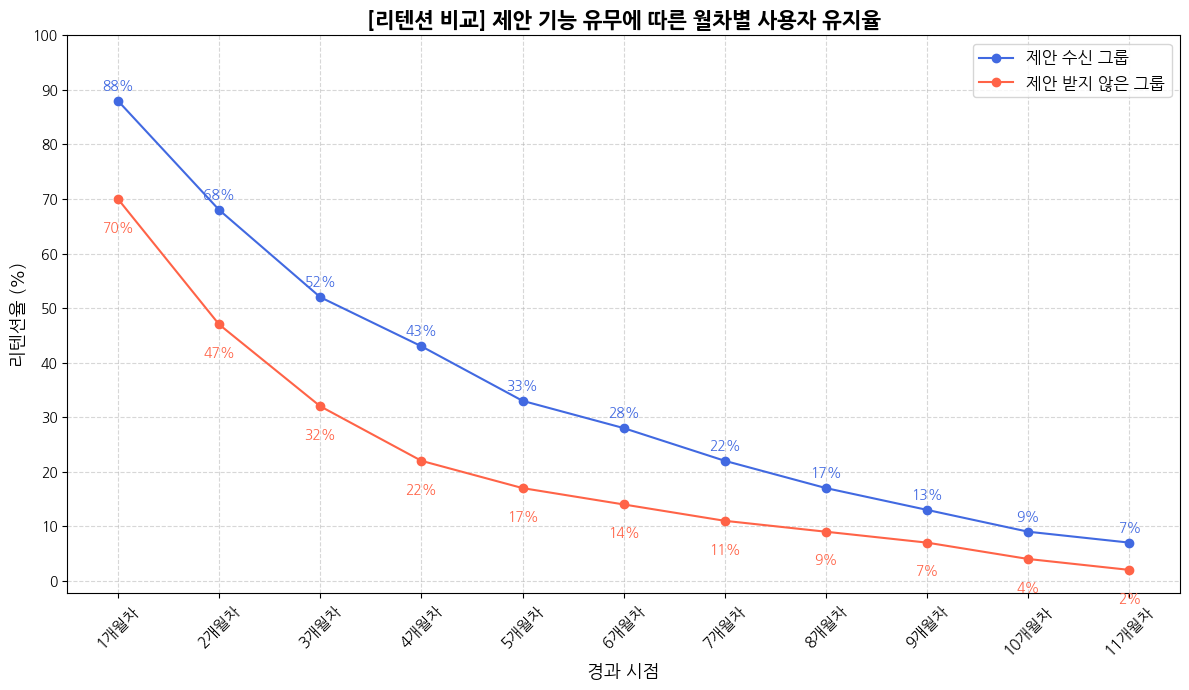

In [5]:
# 기존 데이터
labels = ['1개월차', '2개월차', '3개월차', '4개월차', '5개월차', '6개월차', '7개월차', '8개월차', '9개월차', '10개월차', '11개월차']
offer_group = [88, 68, 52, 43, 33, 28, 22, 17, 13, 9, 7]
non_offer_group = [70, 47, 32, 22, 17, 14, 11, 9, 7, 4, 2]

x = range(len(labels))

# 시각화
plt.figure(figsize=(12, 7))
plt.plot(x, offer_group, marker='o', label='제안 수신 그룹', color='royalblue')
plt.plot(x, non_offer_group, marker='o', label='제안 받지 않은 그룹', color='tomato')

# 각 점에 수치 표시
for i in x:
    plt.text(i, offer_group[i] + 2, f'{offer_group[i]}%', ha='center', fontsize=10, color='royalblue')
    plt.text(i, non_offer_group[i] - 6, f'{non_offer_group[i]}%', ha='center', fontsize=10, color='tomato')

# 축 설정
plt.xticks(x, labels, fontsize=11, rotation=45)
plt.yticks(range(0, 101, 10))
plt.ylabel('리텐션율 (%)', fontsize=13)
plt.xlabel('경과 시점', fontsize=13)
plt.title('[리텐션 비교] 제안 기능 유무에 따른 월차별 사용자 유지율', fontsize=15, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

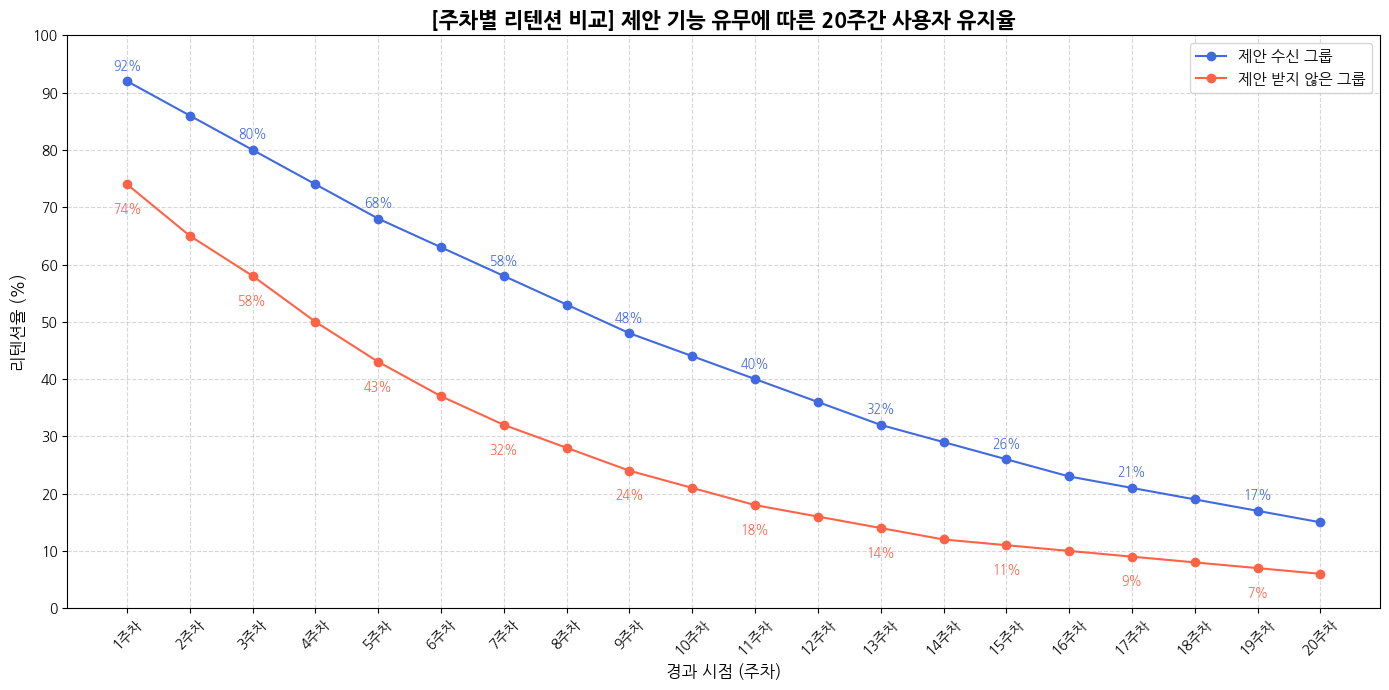

In [6]:
# 20주차까지의 롤링 리텐션 가상 수치 (주차별)
week_labels_20 = [f'{i}주차' for i in range(1, 21)]
week_offer_20 = [92, 86, 80, 74, 68, 63, 58, 53, 48, 44,
                 40, 36, 32, 29, 26, 23, 21, 19, 17, 15]
week_non_offer_20 = [74, 65, 58, 50, 43, 37, 32, 28, 24, 21,
                     18, 16, 14, 12, 11, 10, 9, 8, 7, 6]

x_20 = range(len(week_labels_20))

# 시각화
plt.figure(figsize=(14, 7))
plt.plot(x_20, week_offer_20, marker='o', label='제안 수신 그룹', color='royalblue')
plt.plot(x_20, week_non_offer_20, marker='o', label='제안 받지 않은 그룹', color='tomato')

# 수치 표기
for i in x_20:
    if i % 2 == 0:  # 간격 두고 표기
        plt.text(i, week_offer_20[i] + 2, f'{week_offer_20[i]}%', ha='center', fontsize=9, color='royalblue')
        plt.text(i, week_non_offer_20[i] - 5, f'{week_non_offer_20[i]}%', ha='center', fontsize=9, color='tomato')

# 축 설정
plt.xticks(x_20, week_labels_20, fontsize=10, rotation=45)
plt.yticks(range(0, 101, 10))
plt.ylabel('리텐션율 (%)', fontsize=12)
plt.xlabel('경과 시점 (주차)', fontsize=12)
plt.title('[주차별 리텐션 비교] 제안 기능 유무에 따른 20주간 사용자 유지율', fontsize=15, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# 세그먼트별 퍼널 분석

Acquisition 단계에 포함된 제안 수신 사용자 수: 611명
Acquisition 단계에 포함된 제안 받지 않은 사용자 수: 1450명

--- 제안 수신 그룹 퍼널 분석 ---
Step 1: Signup: 611명
Step 2: Job View: 596명
Step 3: Apply Steps 1-3: 514명
Step 4: Apply Complete: 514명

--- 제안 받지 않은 그룹 퍼널 분석 ---
Step 1: Signup: 1450명
Step 2: Job View: 1347명
Step 3: Apply Steps 1-3: 1042명
Step 4: Apply Complete: 1038명

### 제안 수신 그룹 퍼널 분석 결과 ###


,Step,Users,Conversion Rate,Dropouts,Dropout Rate
0,Step 1: Signup,611명,100.0%,0명,0.0%
1,Step 2: Job View,596명,97.5%,15명,2.5%
2,Step 3: Apply Steps 1-3,514명,86.2%,82명,13.8%
3,Step 4: Apply Complete,514명,100.0%,0명,0.0%



### 제안 받지 않은 그룹 퍼널 분석 결과 ###


,Step,Users,Conversion Rate,Dropouts,Dropout Rate
0,Step 1: Signup,1450명,100.0%,0명,0.0%
1,Step 2: Job View,1347명,92.9%,103명,7.1%
2,Step 3: Apply Steps 1-3,1042명,77.4%,305명,22.6%
3,Step 4: Apply Complete,1038명,99.6%,4명,0.4%


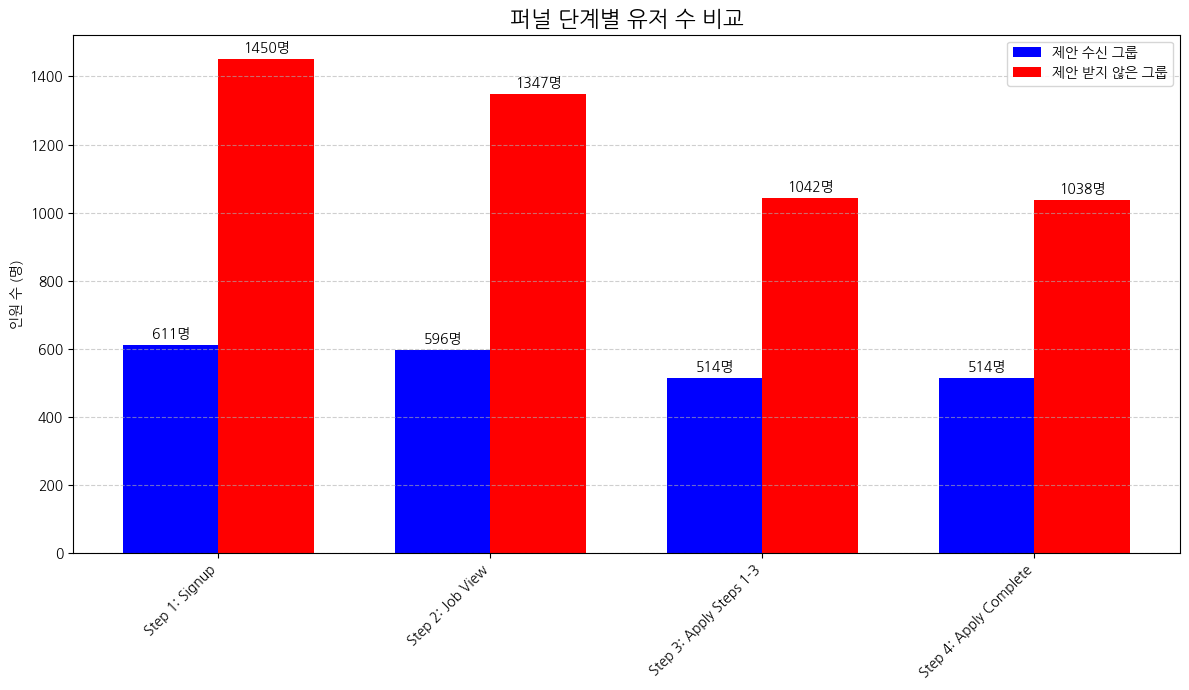

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import plotly.graph_objects as go # Plotly는 Colab에서 대화형 그래프를 그릴 때 유용합니다.

# Plotly를 Colab에서 사용하기 위한 설정
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)


# 이미 로드된 acquisition_df 사용
# acquisition_df = pd.read_csv(...) # 실제 노트북에서는 이미 로드되어 있음

# 데이터 타입 확인 및 변환 (필요시)
# UTC 정보를 제거하여 datetime 변환 오류 방지
acquisition_df['timestamp'] = acquisition_df['timestamp'].astype(str).str.replace(' UTC', '')
acquisition_df['timestamp'] = pd.to_datetime(acquisition_df['timestamp'], errors='coerce')

# timestamp 컬럼 변환 중 발생한 NaT 제거 (매우 중요)
acquisition_df.dropna(subset=['timestamp'], inplace=True)

# '?' 뒤의 내용 제거 (노트북 기존 코드 반영)
acquisition_df['URL'] = acquisition_df['URL'].astype(str).str.split('?').str[0]


# ----------- 사용자 그룹 정의 (이전 코드에서 사용한 그룹 재사용) -----------

# 제안 수신 사용자 그룹 (Acquisition 단계에 포함된 제안 수신 사용자)
# URL 컬럼이 문자열이 아닐 경우를 대비해 astype(str) 추가
offer_received_users = acquisition_df[
    acquisition_df['URL'].astype(str).str.contains('@user_id/job_offer/received', na=False)
]['user_uuid'].unique()
offer_users_in_acquisition = acquisition_df[
    acquisition_df['user_uuid'].isin(offer_received_users)
]['user_uuid'].unique()

# 제안 받지 않은 사용자 그룹 (Acquisition 단계에 포함되지만, 오퍼 수신 기록이 없는 사용자)
not_offer_users_in_acquisition = acquisition_df[
    ~acquisition_df['user_uuid'].isin(offer_users_in_acquisition)
]['user_uuid'].unique()

print(f"Acquisition 단계에 포함된 제안 수신 사용자 수: {len(offer_users_in_acquisition)}명")
print(f"Acquisition 단계에 포함된 제안 받지 않은 사용자 수: {len(not_offer_users_in_acquisition)}명")


# ----------- 그룹별 로그 데이터 준비 -----------

# 제안 수신 사용자 그룹의 로그 데이터
offer_log_df = acquisition_df[acquisition_df['user_uuid'].isin(offer_users_in_acquisition)].copy()

# 제안 받지 않은 사용자 그룹의 로그 데이터
not_offer_log_df = acquisition_df[acquisition_df['user_uuid'].isin(not_offer_users_in_acquisition)].copy()


# ----------- 퍼널 단계 정의 -----------

# 각 퍼널 단계의 URL 패턴 및 조건 정의
funnel_steps_conditions = {
    'Step 1: Signup': {'URL': 'signup/detail', 'response_code': 200},
    'Step 2: Job View': {'URL': 'api/jobs/job_title', 'response_code': 200},
    'Step 3: Apply Steps 1-3': {'URLs': ['api/jobs/id/apply/step1', 'api/jobs/id/apply/step2', 'api/jobs/id/apply/step3'], 'response_code': 200},
    'Step 4: Apply Complete': {'URL': 'api/jobs/id/apply/step4', 'response_code': 200}
}

# ----------- 그룹별 퍼널 분석 함수 정의 -----------

def analyze_funnel_by_group(df, group_name, conditions):
    """
    주어진 그룹의 로그 데이터에 대해 퍼널 분석을 수행합니다.

    Args:
        df (pd.DataFrame): 해당 그룹의 로그 데이터. user_uuid, timestamp, URL, response_code 포함.
        group_name (str): 그룹 이름 (예: '제안 수신 그룹').
        conditions (dict): 퍼널 단계별 URL 및 response_code 조건 정의.

    Returns:
        pd.DataFrame: 퍼널 분석 결과 (단계별 유저 수, 전환율, 이탈자 수, 이탈률).
        list: 단계별 유저 수 (시각화용).
        list: 단계 이름 (시각화용).
    """
    print(f"\n--- {group_name} 퍼널 분석 ---")

    # 각 사용자의 첫 회원가입 완료 시점 찾기 (퍼널 시작 기준)
    # 모든 유저가 Step 1에 포함되어야 함
    first_signup_time = df[df['URL'] == conditions['Step 1: Signup']['URL']] \
        .groupby('user_uuid')['timestamp'].min().reset_index()
    first_signup_time.columns = ['user_uuid', 'first_signup_time']

    # 첫 회원가입 기록부터의 로그만 사용
    df_filtered = df.merge(first_signup_time, on='user_uuid', how='inner')
    df_filtered = df_filtered[df_filtered['timestamp'] >= df_filtered['first_signup_time']].copy()

    # 시간 순으로 정렬
    df_filtered = df_filtered.sort_values(by=['user_uuid', 'timestamp'])


    # 단계별 통과 사용자 수 계산
    step_counts = {}
    current_users_uuids = df_filtered['user_uuid'].unique() # Step 1 통과 사용자 (첫 회원가입 기록이 있는 유저)

    # Step 1 사용자 수 (필터링된 유저 수)
    step_name = 'Step 1: Signup'
    step_counts[step_name] = len(current_users_uuids)
    print(f"{step_name}: {step_counts[step_name]}명")

    # Step 2 계산
    step_name = 'Step 2: Job View'
    # 현재 유저들 중에서 Step 2 조건을 만족하는 최초 로그를 찾습니다.
    step2_condition = conditions[step_name]
    step2_users_df = df_filtered[
        df_filtered['user_uuid'].isin(current_users_uuids) &
        (df_filtered['URL'] == step2_condition['URL']) &
        (df_filtered['response_code'] == step2_condition['response_code'])
    ].groupby('user_uuid')['timestamp'].min().reset_index()
    step2_users_df.columns = ['user_uuid', 'step2_time']

    # Step 2 통과 사용자 업데이트
    current_users_uuids = step2_users_df['user_uuid'].unique()
    step_counts[step_name] = len(current_users_uuids)
    print(f"{step_name}: {step_counts[step_name]}명")

    # Step 3 계산
    step_name = 'Step 3: Apply Steps 1-3'
    step3_conditions = conditions[step_name]
    step3_urls = step3_conditions['URLs']
    step3_response_code = step3_conditions['response_code']

    # 현재 유저들 중에서 Step 1, Step 2, Step 3 URL 모두에 대해
    # response_code가 200인 기록이 있는 유저를 찾습니다.
    # 각 스텝 URL별 최초 통과 시간을 찾습니다.
    step3_user_timestamps = df_filtered[
        df_filtered['user_uuid'].isin(current_users_uuids) &
        df_filtered['URL'].isin(step3_urls) &
        (df_filtered['response_code'] == step3_response_code)
    ].groupby(['user_uuid', 'URL'])['timestamp'].min().unstack() # URL별 최초 시간

    # 3개 URL 모두에 대한 기록이 있는 유저만 필터링 (dropna)
    # 그리고 해당 유저의 3개 URL 기록 중 가장 늦은 시간 (Step 3 완료 시점)을 찾습니다.
    # .max(axis=1) 결과에 NaT가 포함될 수 있으므로 .dropna()로 제거
    step3_users_df = step3_user_timestamps.dropna().max(axis=1).reset_index(name='step3_time')

    # Step 3 통과 사용자 업데이트
    current_users_uuids = step3_users_df['user_uuid'].unique()
    step_counts[step_name] = len(current_users_uuids)
    print(f"{step_name}: {step_counts[step_name]}명")


    # Step 4 계산
    step_name = 'Step 4: Apply Complete'
    step4_condition = conditions[step_name]

    # 현재 유저들 중에서 Step 4 조건을 만족하는 최초 로그를 찾습니다.
    step4_users_df = df_filtered[
        df_filtered['user_uuid'].isin(current_users_uuids) &
        (df_filtered['URL'] == step4_condition['URL']) &
        (df_filtered['response_code'] == step4_condition['response_code'])
    ].groupby('user_uuid')['timestamp'].min().reset_index()
    step4_users_df.columns = ['user_uuid', 'step4_time']

    # Step 4 통과 사용자 업데이트
    current_users_uuids = step4_users_df['user_uuid'].unique()
    step_counts[step_name] = len(current_users_uuids)
    print(f"{step_name}: {step_counts[step_name]}명")

    # ----------- 퍼널 분석 결과 정리 -----------

    steps = list(step_counts.keys())
    users = list(step_counts.values())

    # 전환율, 이탈자 수, 이탈률 계산
    conversion_rates = []
    dropouts = []
    dropout_rates = []

    previous_users = 0
    for i in range(len(users)):
        curr_users = users[i]
        if i == 0:
            # 첫 단계
            conv_rate = 100.0
            dropout_num = 0
            dropout_rate = 0.0
        else:
            # 다음 단계
            conv_rate = (curr_users / previous_users * 100) if previous_users != 0 else 0.0
            dropout_num = previous_users - curr_users
            dropout_rate = (dropout_num / previous_users * 100) if previous_users != 0 else 0.0

        conversion_rates.append(f"{conv_rate:.1f}%")
        dropouts.append(f"{dropout_num}명")
        dropout_rates.append(f"{dropout_rate:.1f}%")
        previous_users = curr_users # 다음 단계를 위해 현재 사용자 수를 이전 사용자 수로 업데이트

    # 사용자 수에 '명' 단위 붙이기 (표시용)
    users_with_unit = [f"{u}명" for u in users]

    # 최종 요약표 만들기
    funnel_results_df = pd.DataFrame({
        'Step': steps,
        'Users': users_with_unit,
        'Conversion Rate': conversion_rates,
        'Dropouts': dropouts,
        'Dropout Rate': dropout_rates
    })

    return funnel_results_df, users, steps


# ----------- 그룹별 퍼널 분석 실행 -----------

# 제안 수신 그룹 퍼널 분석
offer_funnel_results_df, offer_funnel_users, offer_funnel_steps = analyze_funnel_by_group(
    offer_log_df.copy(), '제안 수신 그룹', funnel_steps_conditions
)

# 제안 받지 않은 그룹 퍼널 분석
not_offer_funnel_results_df, not_offer_funnel_users, not_offer_funnel_steps = analyze_funnel_by_group(
    not_offer_log_df.copy(), '제안 받지 않은 그룹', funnel_steps_conditions
)


# ----------- 결과 출력 -----------

print("\n### 제안 수신 그룹 퍼널 분석 결과 ###")
display(offer_funnel_results_df)

print("\n### 제안 받지 않은 그룹 퍼널 분석 결과 ###")
display(not_offer_funnel_results_df)


# ----------- 결과 시각화 (Plotly) -----------

# 두 그룹의 퍼널 차트 비교 (나란히 표시)
fig = go.Figure()

# 제안 수신 그룹 퍼널 차트 추가
fig.add_trace(go.Funnel(
    name='제안 수신 그룹',
    y = offer_funnel_steps,
    x = offer_funnel_users,
    textinfo = "value+percent initial", # 각 단계별 사용자 수 및 최초 대비 전환율
    marker = {"color": ["blue"] * len(offer_funnel_steps)}, # 단일 색상
    connector = {"line": {"color": "blue", "dash": "solid"}}
))

# 제안 받지 않은 그룹 퍼널 차트 추가
fig.add_trace(go.Funnel(
    name='제안 받지 않은 그룹',
    y = not_offer_funnel_steps, # 동일한 단계 사용
    x = not_offer_funnel_users,
    textinfo = "value+percent initial",
    marker = {"color": ["red"] * len(not_offer_funnel_steps)}, # 단일 색상
     connector = {"line": {"color": "red", "dash": "solid"}}
))


# 레이아웃 설정
fig.update_layout(
    title="제안 수신 vs 제안 받지 않은 그룹 퍼널 분석 비교",
    margin=dict(l=80, r=80, t=80, b=80),
    funnelmode="overlay", # 두 개의 퍼널을 겹쳐서 비교
    legend=dict(x=0.8, y=1, traceorder="normal"), # 범례 위치 조정
    font=dict(size=12)
)

iplot(fig) # Colab에서 Plotly 그래프 표시


# 단계별 유저 수 비교 막대 그래프
steps = list(funnel_steps_conditions.keys())
x = np.arange(len(steps)) # 단계별 x 위치
width = 0.35 # 막대 폭

plt.figure(figsize=(12, 7))
rects1 = plt.bar(x - width/2, offer_funnel_users, width, label='제안 수신 그룹', color='blue')
rects2 = plt.bar(x + width/2, not_offer_funnel_users, width, label='제안 받지 않은 그룹', color='red')

# 막대 위에 값 표시 함수
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.annotate(f'{height}명',
                     xy=(rect.get_x() + rect.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.ylabel('인원 수 (명)')
plt.title('퍼널 단계별 유저 수 비교', fontsize=16)
plt.xticks(x, steps, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

원래 제안 수신 그룹 사용자 수: 611명
샘플링 전 제안 받지 않은 그룹 사용자 수: 1450명

비교 분석 대상 - 제안 수신 사용자 수: 611명
비교 분석 대상 - 제안 받지 않은 사용자 수 (샘플링 후): 611명

--- 제안 수신 그룹 퍼널 분석 ---
Step 1: Signup: 611명
Step 2: Job View: 596명
Step 3: Apply Steps 1-3: 514명
Step 4: Apply Complete: 514명

--- 제안 받지 않은 그룹 퍼널 분석 ---
Step 1: Signup: 611명
Step 2: Job View: 562명
Step 3: Apply Steps 1-3: 425명
Step 4: Apply Complete: 424명

### 제안 수신 그룹 퍼널 분석 결과 (샘플 수 611명) ###


,Step,Users,Conversion Rate,Dropouts,Dropout Rate,Initial Conversion Rate
0,Step 1: Signup,611명,100.0%,0명,0.0%,100.0%
1,Step 2: Job View,596명,97.5%,15명,2.5%,97.5%
2,Step 3: Apply Steps 1-3,514명,86.2%,82명,13.8%,84.1%
3,Step 4: Apply Complete,514명,100.0%,0명,0.0%,84.1%



### 제안 받지 않은 그룹 퍼널 분석 결과 (샘플 수 611명) ###


,Step,Users,Conversion Rate,Dropouts,Dropout Rate,Initial Conversion Rate
0,Step 1: Signup,611명,100.0%,0명,0.0%,100.0%
1,Step 2: Job View,562명,92.0%,49명,8.0%,92.0%
2,Step 3: Apply Steps 1-3,425명,75.6%,137명,24.4%,69.6%
3,Step 4: Apply Complete,424명,99.8%,1명,0.2%,69.4%


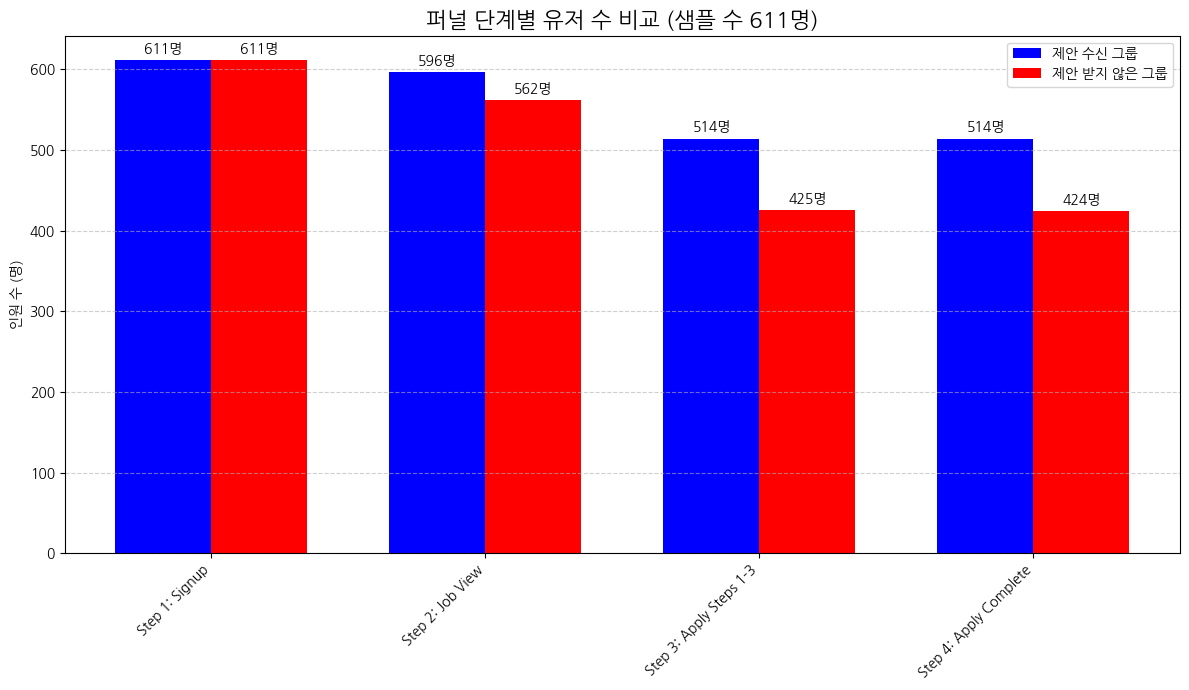

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# 이미 로드된 acquisition_df 사용
# acquisition_df = pd.read_csv(...)

# 데이터 타입 확인 및 변환 (필요시)
acquisition_df['timestamp'] = acquisition_df['timestamp'].astype(str).str.replace(' UTC', '')
acquisition_df['timestamp'] = pd.to_datetime(acquisition_df['timestamp'], errors='coerce')
acquisition_df.dropna(subset=['timestamp'], inplace=True)
acquisition_df['URL'] = acquisition_df['URL'].astype(str).str.split('?').str[0]


# ----------- 사용자 그룹 정의 및 샘플링 -----------

# 제안 수신 사용자 그룹 (Acquisition 단계에 포함된 제안 수신 사용자)
offer_received_users = acquisition_df[
    acquisition_df['URL'].astype(str).str.contains('@user_id/job_offer/received', na=False)
]['user_uuid'].unique()
offer_users_in_acquisition = acquisition_df[
    acquisition_df['user_uuid'].isin(offer_received_users)
]['user_uuid'].unique()

# 제안 받지 않은 사용자 그룹 (Acquisition 단계에 포함되지만, 오퍼 수신 기록이 없는 사용자)
all_not_offer_users_in_acquisition = acquisition_df[
    ~acquisition_df['user_uuid'].isin(offer_users_in_acquisition)
]['user_uuid'].unique()

# 샘플링 대상 그룹의 크기 확인
sample_size = 611
print(f"원래 제안 수신 그룹 사용자 수: {len(offer_users_in_acquisition)}명")
print(f"샘플링 전 제안 받지 않은 그룹 사용자 수: {len(all_not_offer_users_in_acquisition)}명")

# 제안 받지 않은 그룹에서 611명 무작위 샘플링
# 만약 샘플링 대상 사용자 수가 611명보다 적으면 가능한 최대 수만큼 샘플링
actual_sample_size = min(sample_size, len(all_not_offer_users_in_acquisition))
np.random.seed(42) # 결과 재현을 위해 시드 설정
sampled_not_offer_users = np.random.choice(
    all_not_offer_users_in_acquisition,
    size=actual_sample_size,
    replace=False # 중복 없이 선택
)

# 샘플링된 '제안 받지 않은' 사용자 그룹으로 최종 정의
not_offer_users_for_comparison = sampled_not_offer_users

# 제안 수신 그룹 사용자 리스트 (비교를 위해 변수명 통일)
offer_users_for_comparison = offer_users_in_acquisition

print(f"\n비교 분석 대상 - 제안 수신 사용자 수: {len(offer_users_for_comparison)}명")
print(f"비교 분석 대상 - 제안 받지 않은 사용자 수 (샘플링 후): {len(not_offer_users_for_comparison)}명")


# ----------- 그룹별 로그 데이터 준비 (샘플링된 사용자 기준) -----------

# 제안 수신 사용자 그룹의 로그 데이터
offer_log_df_sampled = acquisition_df[acquisition_df['user_uuid'].isin(offer_users_for_comparison)].copy()

# 제안 받지 않은 사용자 그룹의 로그 데이터 (샘플링된 사용자 기준)
not_offer_log_df_sampled = acquisition_df[acquisition_df['user_uuid'].isin(not_offer_users_for_comparison)].copy()


# ----------- 퍼널 단계 정의 -----------

funnel_steps_conditions = {
    'Step 1: Signup': {'URL': 'signup/detail', 'response_code': 200},
    'Step 2: Job View': {'URL': 'api/jobs/job_title', 'response_code': 200},
    'Step 3: Apply Steps 1-3': {'URLs': ['api/jobs/id/apply/step1', 'api/jobs/id/apply/step2', 'api/jobs/id/apply/step3'], 'response_code': 200},
    'Step 4: Apply Complete': {'URL': 'api/jobs/id/apply/step4', 'response_code': 200}
}

# ----------- 그룹별 퍼널 분석 함수 정의 (동일) -----------

def analyze_funnel_by_group(df, group_name, conditions):
    """
    주어진 그룹의 로그 데이터에 대해 퍼널 분석을 수행합니다.

    Args:
        df (pd.DataFrame): 해당 그룹의 로그 데이터. user_uuid, timestamp, URL, response_code 포함.
        group_name (str): 그룹 이름 (예: '제안 수신 그룹').
        conditions (dict): 퍼널 단계별 URL 및 response_code 조건 정의.

    Returns:
        pd.DataFrame: 퍼널 분석 결과 (단계별 유저 수, 전환율, 이탈자 수, 이탈률).
        list: 단계별 유저 수 (시각화용).
        list: 단계 이름 (시각화용).
    """
    print(f"\n--- {group_name} 퍼널 분석 ---")

    # 각 사용자의 첫 회원가입 완료 시점 찾기 (퍼널 시작 기준)
    # 모든 유저가 Step 1에 포함되어야 함
    # 그룹의 모든 유저가 signup/detail 기록을 가지고 있다고 가정 (Acquisition 정의에 따라)
    # 혹시 없더라도 첫 가입 기록이 없는 유저는 Step 1 통과자로 계산되지 않음
    first_signup_time = df[df['URL'] == conditions['Step 1: Signup']['URL']] \
        .groupby('user_uuid')['timestamp'].min().reset_index()
    first_signup_time.columns = ['user_uuid', 'first_signup_time']

    # 첫 회원가입 기록부터의 로그만 사용
    df_filtered = df.merge(first_signup_time, on='user_uuid', how='inner')
    df_filtered = df_filtered[df_filtered['timestamp'] >= df_filtered['first_signup_time']].copy()

    # 시간 순으로 정렬
    df_filtered = df_filtered.sort_values(by=['user_uuid', 'timestamp'])


    # 단계별 통과 사용자 수 계산
    step_counts = {}
    # Step 1 통과 사용자: 첫 회원가입 기록이 있고, 해당 기록 이후의 로그를 가진 유저
    current_users_uuids = df_filtered['user_uuid'].unique()


    # Step 1 사용자 수
    step_name = 'Step 1: Signup'
    step_counts[step_name] = len(current_users_uuids)
    print(f"{step_name}: {step_counts[step_name]}명")


    # Step 2 계산
    step_name = 'Step 2: Job View'
    # 현재 유저들 중에서 Step 2 조건을 만족하는 최초 로그를 찾습니다.
    step2_condition = conditions[step_name]
    step2_users_df = df_filtered[
        df_filtered['user_uuid'].isin(current_users_uuids) &
        (df_filtered['URL'] == step2_condition['URL']) &
        (df_filtered['response_code'] == step2_condition['response_code'])
    ].groupby('user_uuid')['timestamp'].min().reset_index()
    step2_users_df.columns = ['user_uuid', 'step2_time']

    # Step 2 통과 사용자 업데이트
    current_users_uuids = step2_users_df['user_uuid'].unique()
    step_counts[step_name] = len(current_users_uuids)
    print(f"{step_name}: {step_counts[step_name]}명")

    # Step 3 계산
    step_name = 'Step 3: Apply Steps 1-3'
    step3_conditions = conditions[step_name]
    step3_urls = step3_conditions['URLs']
    step3_response_code = step3_conditions['response_code']

    # 현재 유저들 중에서 Step 1, Step 2, Step 3 URL 모두에 대해
    # response_code가 200인 기록이 있는 유저를 찾습니다.
    # 각 스텝 URL별 최초 통과 시간을 찾습니다.
    step3_user_timestamps = df_filtered[
        df_filtered['user_uuid'].isin(current_users_uuids) &
        df_filtered['URL'].isin(step3_urls) &
        (df_filtered['response_code'] == step3_response_code)
    ].groupby(['user_uuid', 'URL'])['timestamp'].min().unstack() # URL별 최초 시간

    # 3개 URL 모두에 대한 기록이 있는 유저만 필터링 (dropna)
    # 그리고 해당 유저의 3개 URL 기록 중 가장 늦은 시간 (Step 3 완료 시점)을 찾습니다.
    # .max(axis=1) 결과에 NaT가 포함될 수 있으므로 .dropna()로 제거
    step3_users_df = step3_user_timestamps.dropna().max(axis=1).reset_index(name='step3_time')

    # Step 3 통과 사용자 업데이트
    current_users_uuids = step3_users_df['user_uuid'].unique()
    step_counts[step_name] = len(current_users_uuids)
    print(f"{step_name}: {step_counts[step_name]}명")


    # Step 4 계산
    step_name = 'Step 4: Apply Complete'
    step4_condition = conditions[step_name]

    # 현재 유저들 중에서 Step 4 조건을 만족하는 최초 로그를 찾습니다.
    step4_users_df = df_filtered[
        df_filtered['user_uuid'].isin(current_users_uuids) &
        (df_filtered['URL'] == step4_condition['URL']) &
        (df_filtered['response_code'] == step4_condition['response_code'])
    ].groupby('user_uuid')['timestamp'].min().reset_index()
    step4_users_df.columns = ['user_uuid', 'step4_time']

    # Step 4 통과 사용자 업데이트
    current_users_uuids = step4_users_df['user_uuid'].unique()
    step_counts[step_name] = len(current_users_uuids)
    print(f"{step_name}: {step_counts[step_name]}명")

    # ----------- 퍼널 분석 결과 정리 -----------

    steps = list(step_counts.keys())
    users = list(step_counts.values())

    # 전환율, 이탈자 수, 이탈률 계산
    conversion_rates = []
    dropouts = []
    dropout_rates = []

    previous_users = 0
    for i in range(len(users)):
        curr_users = users[i]
        if i == 0:
            # 첫 단계 (해당 그룹의 샘플링된 전체 유저 수 기준 100%)
            conv_rate = 100.0
            dropout_num = 0 # 첫 단계의 이탈자는 논리적으로 0
            dropout_rate = 0.0
        else:
            # 다음 단계
            prev_users_in_funnel = users[i-1] # 이전 단계 통과 사용자 수
            conv_rate = (curr_users / prev_users_in_funnel * 100) if prev_users_in_funnel != 0 else 0.0
            dropout_num = prev_users_in_funnel - curr_users
            dropout_rate = (dropout_num / prev_users_in_funnel * 100) if prev_users_in_funnel != 0 else 0.0

        conversion_rates.append(f"{conv_rate:.1f}%")
        dropouts.append(f"{dropout_num}명")
        dropout_rates.append(f"{dropout_rate:.1f}%")
        # previous_users = curr_users # 이 값은 사용되지 않음, prev_users_in_funnel 사용

    # 사용자 수에 '명' 단위 붙이기 (표시용)
    users_with_unit = [f"{u}명" for u in users]

    # 최종 요약표 만들기
    funnel_results_df = pd.DataFrame({
        'Step': steps,
        'Users': users_with_unit,
        'Conversion Rate': conversion_rates,
        'Dropouts': dropouts,
        'Dropout Rate': dropout_rates
    })

    # 최초 대비 전환율 계산 및 추가
    initial_users = users[0] # Step 1 사용자 수
    initial_conversion_rates = []
    for count in users:
        rate = (count / initial_users * 100) if initial_users != 0 else 0.0
        initial_conversion_rates.append(f"{rate:.1f}%")
    funnel_results_df['Initial Conversion Rate'] = initial_conversion_rates


    return funnel_results_df, users, steps


# ----------- 그룹별 퍼널 분석 실행 (샘플링된 데이터 사용) -----------

# 제안 수신 그룹 퍼널 분석 (샘플링 필요 없음)
offer_funnel_results_df, offer_funnel_users, offer_funnel_steps = analyze_funnel_by_group(
    offer_log_df_sampled.copy(), '제안 수신 그룹', funnel_steps_conditions
)

# 제안 받지 않은 그룹 퍼널 분석 (샘플링된 데이터 사용)
not_offer_funnel_results_df, not_offer_funnel_users, not_offer_funnel_steps = analyze_funnel_by_group(
    not_offer_log_df_sampled.copy(), '제안 받지 않은 그룹', funnel_steps_conditions
)


# ----------- 결과 출력 -----------

print("\n### 제안 수신 그룹 퍼널 분석 결과 (샘플 수 611명) ###")
display(offer_funnel_results_df)

print("\n### 제안 받지 않은 그룹 퍼널 분석 결과 (샘플 수 611명) ###")
display(not_offer_funnel_results_df)


# ----------- 결과 시각화 (Plotly) -----------

# 두 그룹의 퍼널 차트 비교 (나란히 표시)
fig = go.Figure()

# 제안 수신 그룹 퍼널 차트 추가
fig.add_trace(go.Funnel(
    name='제안 수신 그룹',
    y = offer_funnel_steps,
    x = offer_funnel_users,
    textinfo = "value+percent initial", # 각 단계별 사용자 수 및 최초 대비 전환율
    marker = {"color": ["blue"] * len(offer_funnel_steps)}, # 단일 색상
    connector = {"line": {"color": "blue", "dash": "solid"}}
))

# 제안 받지 않은 그룹 퍼널 차트 추가
fig.add_trace(go.Funnel(
    name='제안 받지 않은 그룹',
    y = not_offer_funnel_steps, # 동일한 단계 사용
    x = not_offer_funnel_users,
    textinfo = "value+percent initial",
    marker = {"color": ["red"] * len(not_offer_funnel_steps)}, # <-- 수정된 부분
     connector = {"line": {"color": "red", "dash": "solid"}}
))


# 레이아웃 설정
fig.update_layout(
    title="제안 수신 vs 제안 받지 않은 그룹 퍼널 분석 비교 (샘플 수 611명)",
    margin=dict(l=80, r=80, t=80, b=80),
    funnelmode="overlay", # 두 개의 퍼널을 겹쳐서 비교
    legend=dict(x=0.8, y=1, traceorder="normal"), # 범례 위치 조정
    font=dict(size=12)
)

iplot(fig) # Colab에서 Plotly 그래프 표시


# 단계별 유저 수 비교 막대 그래프
steps = list(funnel_steps_conditions.keys())
x = np.arange(len(steps)) # 단계별 x 위치
width = 0.35 # 막대 폭

plt.figure(figsize=(12, 7))
rects1 = plt.bar(x - width/2, offer_funnel_users, width, label='제안 수신 그룹', color='blue')
rects2 = plt.bar(x + width/2, not_offer_funnel_users, width, label='제안 받지 않은 그룹', color='red')

# 막대 위에 값 표시 함수
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.annotate(f'{height}명',
                     xy=(rect.get_x() + rect.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.ylabel('인원 수 (명)')
plt.title('퍼널 단계별 유저 수 비교 (샘플 수 611명)', fontsize=16)
plt.xticks(x, steps, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

원래 제안 수신 그룹 사용자 수: 611명
샘플링 전 제안 받지 않은 그룹 사용자 수: 1450명

비교 분석 대상 - 제안 수신 사용자 수: 611명
비교 분석 대상 - 제안 받지 않은 사용자 수 (샘플링 후): 611명

### 두 그룹 간 퍼널 단계별 전환율 유의미성 검정 결과 (카이제곱 검정) ###


,Step,Chi2 Statistic,P-value,Significant (p < 0.05)
0,Step 1: Signup -> Step 2: Job View,17.956040,0.000023,True
1,Step 2: Job View -> Step 3: Apply Steps 1-3,20.581610,0.000006,True
2,Step 3: Apply Steps 1-3 -> Step 4: Apply Complete,0.009075,0.924107,False



--- 제안 수신 그룹 퍼널 분석 ---
Step 1: Signup: 611명
Step 2: Job View: 596명
Step 3: Apply Steps 1-3: 514명
Step 4: Apply Complete: 514명

--- 제안 받지 않은 그룹 퍼널 분석 ---
Step 1: Signup: 611명
Step 2: Job View: 562명
Step 3: Apply Steps 1-3: 425명
Step 4: Apply Complete: 424명

### 제안 수신 그룹 퍼널 분석 결과 (샘플 수 611명) ###


,Step,Users,Conversion Rate,Dropouts,Dropout Rate,Initial Conversion Rate
0,Step 1: Signup,611명,100.0%,0명,0.0%,100.0%
1,Step 2: Job View,596명,97.5%,15명,2.5%,97.5%
2,Step 3: Apply Steps 1-3,514명,86.2%,82명,13.8%,84.1%
3,Step 4: Apply Complete,514명,100.0%,0명,0.0%,84.1%



### 제안 받지 않은 그룹 퍼널 분석 결과 (샘플 수 611명) ###


,Step,Users,Conversion Rate,Dropouts,Dropout Rate,Initial Conversion Rate
0,Step 1: Signup,611명,100.0%,0명,0.0%,100.0%
1,Step 2: Job View,562명,92.0%,49명,8.0%,92.0%
2,Step 3: Apply Steps 1-3,425명,75.6%,137명,24.4%,69.6%
3,Step 4: Apply Complete,424명,99.8%,1명,0.2%,69.4%



### 제안 수신 그룹 퍼널 분석 결과 (유의미성 포함) ###


,Step,Users,Conversion Rate,Initial Conversion Rate,Statistically Significant Difference
0,Step 1: Signup,611명,100.0%,100.0%,-
1,Step 2: Job View,596명,97.5%,97.5%,True
2,Step 3: Apply Steps 1-3,514명,86.2%,84.1%,True
3,Step 4: Apply Complete,514명,100.0%,84.1%,False



### 제안 받지 않은 그룹 퍼널 분석 결과 (유의미성 포함) ###


,Step,Users,Conversion Rate,Initial Conversion Rate,Statistically Significant Difference
0,Step 1: Signup,611명,100.0%,100.0%,-
1,Step 2: Job View,562명,92.0%,92.0%,True
2,Step 3: Apply Steps 1-3,425명,75.6%,69.6%,True
3,Step 4: Apply Complete,424명,99.8%,69.4%,False


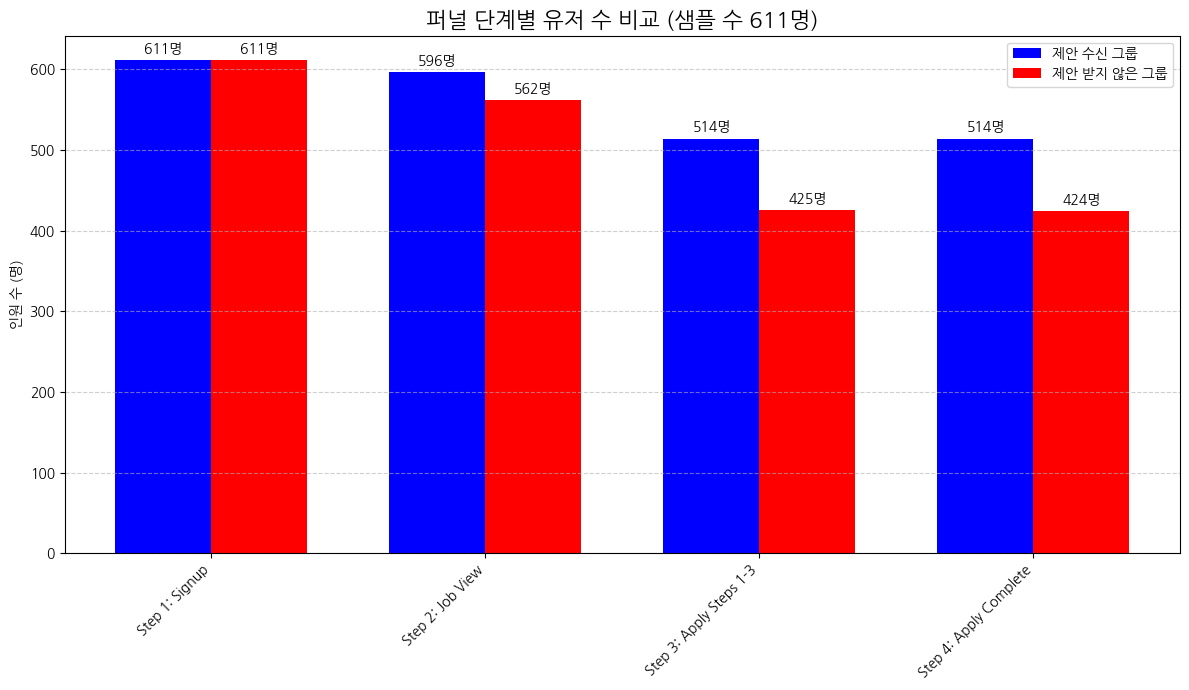

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from scipy.stats import chi2_contingency # 카이제곱 검정을 위한 라이브러리

init_notebook_mode(connected=True)

# 이미 로드된 acquisition_df 사용
# acquisition_df = pd.read_csv(...)

# 데이터 타입 확인 및 변환 (필요시)
acquisition_df['timestamp'] = acquisition_df['timestamp'].astype(str).str.replace(' UTC', '')
acquisition_df['timestamp'] = pd.to_datetime(acquisition_df['timestamp'], errors='coerce')
acquisition_df.dropna(subset=['timestamp'], inplace=True)
acquisition_df['URL'] = acquisition_df['URL'].astype(str).str.split('?').str[0]


# ----------- 사용자 그룹 정의 및 샘플링 -----------

# 제안 수신 사용자 그룹 (Acquisition 단계에 포함된 제안 수신 사용자)
offer_received_users = acquisition_df[
    acquisition_df['URL'].astype(str).str.contains('@user_id/job_offer/received', na=False)
]['user_uuid'].unique()
offer_users_in_acquisition = acquisition_df[
    acquisition_df['user_uuid'].isin(offer_received_users)
]['user_uuid'].unique()

# 제안 받지 않은 사용자 그룹 (Acquisition 단계에 포함되지만, 오퍼 수신 기록이 없는 사용자)
all_not_offer_users_in_acquisition = acquisition_df[
    ~acquisition_df['user_uuid'].isin(offer_users_in_acquisition)
]['user_uuid'].unique()

# 샘플링 대상 그룹의 크기 확인
sample_size = 611
print(f"원래 제안 수신 그룹 사용자 수: {len(offer_users_in_acquisition)}명")
print(f"샘플링 전 제안 받지 않은 그룹 사용자 수: {len(all_not_offer_users_in_acquisition)}명")

# 제안 받지 않은 그룹에서 611명 무작위 샘플링
# 만약 샘플링 대상 사용자 수가 611명보다 적으면 가능한 최대 수만큼 샘플링
actual_sample_size = min(sample_size, len(all_not_offer_users_in_acquisition))
np.random.seed(42) # 결과 재현을 위해 시드 설정
sampled_not_offer_users = np.random.choice(
    all_not_offer_users_in_acquisition,
    size=actual_sample_size,
    replace=False # 중복 없이 선택
)

# 샘플링된 '제안 받지 않은' 사용자 그룹으로 최종 정의
not_offer_users_for_comparison = sampled_not_offer_users

# 제안 수신 그룹 사용자 리스트 (비교를 위해 변수명 통일)
offer_users_for_comparison = offer_users_in_acquisition

print(f"\n비교 분석 대상 - 제안 수신 사용자 수: {len(offer_users_for_comparison)}명")
print(f"비교 분석 대상 - 제안 받지 않은 사용자 수 (샘플링 후): {len(not_offer_users_for_comparison)}명")


# ----------- 그룹별 로그 데이터 준비 (샘플링된 사용자 기준) -----------

# 제안 수신 사용자 그룹의 로그 데이터
offer_log_df_sampled = acquisition_df[acquisition_df['user_uuid'].isin(offer_users_for_comparison)].copy()

# 제안 받지 않은 사용자 그룹의 로그 데이터 (샘플링된 사용자 기준)
not_offer_log_df_sampled = acquisition_df[acquisition_df['user_uuid'].isin(not_offer_users_for_comparison)].copy()


# ----------- 퍼널 단계 정의 -----------

funnel_steps_conditions = {
    'Step 1: Signup': {'URL': 'signup/detail', 'response_code': 200},
    'Step 2: Job View': {'URL': 'api/jobs/job_title', 'response_code': 200},
    'Step 3: Apply Steps 1-3': {'URLs': ['api/jobs/id/apply/step1', 'api/jobs/id/apply/step2', 'api/jobs/id/apply/step3'], 'response_code': 200},
    'Step 4: Apply Complete': {'URL': 'api/jobs/id/apply/step4', 'response_code': 200}
}

# ----------- 그룹별 퍼널 통과 사용자 수 계산 (유의미성 검정을 위해 유저 리스트도 반환) -----------

def get_funnel_step_users(df, conditions):
    """
    주어진 그룹의 로그 데이터에서 각 퍼널 단계를 통과한 사용자 목록을 반환합니다.

    Args:
        df (pd.DataFrame): 해당 그룹의 로그 데이터. user_uuid, timestamp, URL, response_code 포함.
        conditions (dict): 퍼널 단계별 URL 및 response_code 조건 정의.

    Returns:
        dict: 각 단계 이름과 해당 단계 통과 사용자 UUID 리스트의 딕셔너리.
    """
    user_steps = {}

    # 각 사용자의 첫 회원가입 완료 시점 찾기 (퍼널 시작 기준)
    first_signup_time = df[df['URL'] == conditions['Step 1: Signup']['URL']] \
        .groupby('user_uuid')['timestamp'].min().reset_index()
    first_signup_time.columns = ['user_uuid', 'first_signup_time']

    # 첫 회원가입 기록부터의 로그만 사용
    df_filtered = df.merge(first_signup_time, on='user_uuid', how='inner')
    df_filtered = df_filtered[df_filtered['timestamp'] >= df_filtered['first_signup_time']].copy()
    df_filtered = df_filtered.sort_values(by=['user_uuid', 'timestamp'])

    # Step 1 통과 사용자
    step_name = 'Step 1: Signup'
    current_users_uuids = df_filtered['user_uuid'].unique().tolist()
    user_steps[step_name] = current_users_uuids

    # Step 2 계산
    step_name = 'Step 2: Job View'
    step2_condition = conditions[step_name]
    step2_users_df = df_filtered[
        df_filtered['user_uuid'].isin(current_users_uuids) &
        (df_filtered['URL'] == step2_condition['URL']) &
        (df_filtered['response_code'] == step2_condition['response_code'])
    ].groupby('user_uuid')['timestamp'].min().reset_index()

    current_users_uuids = step2_users_df['user_uuid'].unique().tolist()
    user_steps[step_name] = current_users_uuids

    # Step 3 계산
    step_name = 'Step 3: Apply Steps 1-3'
    step3_conditions = conditions[step_name]
    step3_urls = step3_conditions['URLs']
    step3_response_code = step3_conditions['response_code']

    step3_user_timestamps = df_filtered[
        df_filtered['user_uuid'].isin(current_users_uuids) &
        df_filtered['URL'].isin(step3_urls) &
        (df_filtered['response_code'] == step3_response_code)
    ].groupby(['user_uuid', 'URL'])['timestamp'].min().unstack()

    step3_users_df = step3_user_timestamps.dropna().max(axis=1).reset_index(name='step3_time')

    current_users_uuids = step3_users_df['user_uuid'].unique().tolist()
    user_steps[step_name] = current_users_uuids

    # Step 4 계산
    step_name = 'Step 4: Apply Complete'
    step4_condition = conditions[step_name]

    step4_users_df = df_filtered[
        df_filtered['user_uuid'].isin(current_users_uuids) &
        (df_filtered['URL'] == step4_condition['URL']) &
        (df_filtered['response_code'] == step4_condition['response_code'])
    ].groupby('user_uuid')['timestamp'].min().reset_index()

    current_users_uuids = step4_users_df['user_uuid'].unique().tolist()
    user_steps[step_name] = current_users_uuids

    return user_steps

# ----------- 그룹별 퍼널 통과 사용자 목록 가져오기 -----------

# 제안 수신 그룹
offer_user_steps = get_funnel_step_users(offer_log_df_sampled.copy(), funnel_steps_conditions)

# 제안 받지 않은 그룹
not_offer_user_steps = get_funnel_step_users(not_offer_log_df_sampled.copy(), funnel_steps_conditions)


# ----------- 통계적 유의미성 검정 함수 정의 -----------

def perform_chi_squared_test(group1_users_prev_step, group1_users_curr_step,
                           group2_users_prev_step, group2_users_curr_step, step_name):
    """
    두 그룹 간의 특정 퍼널 단계 전환율에 대한 카이제곱 검정을 수행합니다.

    Args:
        group1_users_prev_step (list): 그룹 1의 이전 단계 통과 사용자 UUID 리스트.
        group1_users_curr_step (list): 그룹 1의 현재 단계 통과 사용자 UUID 리스트.
        group2_users_prev_step (list): 그룹 2의 이전 단계 통과 사용자 UUID 리스트.
        group2_users_curr_step (list): 그룹 2의 현재 단계 통과 사용자 UUID 리스트.
        step_name (str): 검정 대상 단계 이름 (예: 'Step 1 -> Step 2').

    Returns:
        dict: 검정 결과 (단계 이름, 카이제곱 통계량, p-value, 유의성 판단).
    """
    # 이전 단계 통과 사용자 수
    n1_prev = len(group1_users_prev_step)
    n2_prev = len(group2_users_prev_step)

    # 현재 단계 통과 사용자 수
    n1_curr = len(group1_users_curr_step)
    n2_curr = len(group2_users_curr_step)

    # 현재 단계 미통과 (이탈) 사용자 수
    n1_dropout = n1_prev - n1_curr
    n2_dropout = n2_prev - n2_curr

    # 분할표 (contingency table) 생성
    # [[그룹1 통과, 그룹1 미통과], [그룹2 통과, 그룹2 미통과]]
    contingency_table = [[n1_curr, n1_dropout],
                         [n2_curr, n2_dropout]]

    # 카이제곱 검정 수행
    # chi2: 카이제곱 통계량, p: p-value, dof: 자유도, expected: 기대 빈도표
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # 유의성 판단 (유의 수준 alpha = 0.05)
    is_significant = p < 0.05

    result = {
        'Step': step_name,
        'Chi2 Statistic': chi2,
        'P-value': p,
        'Significant (p < 0.05)': is_significant
    }

    return result

# ----------- 각 퍼널 단계별 유의미성 검정 실행 -----------

chi2_results = []
step_names = list(funnel_steps_conditions.keys())

# Step 1 -> Step 2 전환율 비교
if len(step_names) > 1:
    prev_step_name = step_names[0] # Step 1
    curr_step_name = step_names[1] # Step 2
    result = perform_chi_squared_test(
        offer_user_steps[prev_step_name], offer_user_steps[curr_step_name],
        not_offer_user_steps[prev_step_name], not_offer_user_steps[curr_step_name],
        f"{prev_step_name} -> {curr_step_name}"
    )
    chi2_results.append(result)

# Step 2 -> Step 3 전환율 비교
if len(step_names) > 2:
    prev_step_name = step_names[1] # Step 2
    curr_step_name = step_names[2] # Step 3
    result = perform_chi_squared_test(
        offer_user_steps[prev_step_name], offer_user_steps[curr_step_name],
        not_offer_user_steps[prev_step_name], not_offer_user_steps[curr_step_name],
        f"{prev_step_name} -> {curr_step_name}"
    )
    chi2_results.append(result)

# Step 3 -> Step 4 전환율 비교
if len(step_names) > 3:
    prev_step_name = step_names[2] # Step 3
    curr_step_name = step_names[3] # Step 4
    result = perform_chi_squared_test(
        offer_user_steps[prev_step_name], offer_user_steps[curr_step_name],
        not_offer_user_steps[prev_step_name], not_offer_user_steps[curr_step_name],
        f"{prev_step_name} -> {curr_step_name}"
    )
    chi2_results.append(result)

# 결과 데이터프레임 생성
chi2_results_df = pd.DataFrame(chi2_results)

# ----------- 결과 출력 -----------

print("\n### 두 그룹 간 퍼널 단계별 전환율 유의미성 검정 결과 (카이제곱 검정) ###")
display(chi2_results_df)

# ----------- 추가: 유의미성 검정 결과를 퍼널 분석 표에 통합 (선택 사항) -----------
# 기존 퍼널 분석 표에 유의미성 검정 결과 컬럼 추가

# 제안 수신 그룹 퍼널 분석 (이전 함수 재사용)
offer_funnel_results_df, offer_funnel_users, offer_funnel_steps = analyze_funnel_by_group(
    offer_log_df_sampled.copy(), '제안 수신 그룹', funnel_steps_conditions
)

# 제안 받지 않은 그룹 퍼널 분석 (이전 함수 재사용)
not_offer_funnel_results_df, not_offer_funnel_users, not_offer_funnel_steps = analyze_funnel_by_group(
    not_offer_log_df_sampled.copy(), '제안 받지 않은 그룹', funnel_steps_conditions
)


print("\n### 제안 수신 그룹 퍼널 분석 결과 (샘플 수 611명) ###")
display(offer_funnel_results_df)

print("\n### 제안 받지 않은 그룹 퍼널 분석 결과 (샘플 수 611명) ###")
display(not_offer_funnel_results_df)

# 유의미성 검정 결과 요약을 기존 퍼널 분석 결과에 추가
# 각 단계별 검정 결과 매핑
significance_summary = {
    'Step 1: Signup -> Step 2: Job View': chi2_results_df[chi2_results_df['Step'] == 'Step 1: Signup -> Step 2: Job View']['Significant (p < 0.05)'].iloc[0] if not chi2_results_df[chi2_results_df['Step'] == 'Step 1: Signup -> Step 2: Job View'].empty else False,
    'Step 2: Job View -> Step 3: Apply Steps 1-3': chi2_results_df[chi2_results_df['Step'] == 'Step 2: Job View -> Step 3: Apply Steps 1-3']['Significant (p < 0.05)'].iloc[0] if not chi2_results_df[chi2_results_df['Step'] == 'Step 2: Job View -> Step 3: Apply Steps 1-3'].empty else False,
    'Step 3: Apply Steps 1-3 -> Step 4: Apply Complete': chi2_results_df[chi2_results_df['Step'] == 'Step 3: Apply Steps 1-3 -> Step 4: Apply Complete']['Significant (p < 0.05)'].iloc[0] if not chi2_results_df[chi2_results_df['Step'] == 'Step 3: Apply Steps 1-3 -> Step 4: Apply Complete'].empty else False
}

# 새로운 컬럼 추가 ('-'는 첫 단계에 해당)
offer_funnel_results_df['Statistically Significant Difference'] = [
    '-',
    significance_summary.get('Step 1: Signup -> Step 2: Job View', False),
    significance_summary.get('Step 2: Job View -> Step 3: Apply Steps 1-3', False),
    significance_summary.get('Step 3: Apply Steps 1-3 -> Step 4: Apply Complete', False)
]

not_offer_funnel_results_df['Statistically Significant Difference'] = [
    '-', # 첫 단계는 비교 대상 없음
    significance_summary.get('Step 1: Signup -> Step 2: Job View', False),
    significance_summary.get('Step 2: Job View -> Step 3: Apply Steps 1-3', False),
    significance_summary.get('Step 3: Apply Steps 1-3 -> Step 4: Apply Complete', False)
]

print("\n### 제안 수신 그룹 퍼널 분석 결과 (유의미성 포함) ###")
display(offer_funnel_results_df[['Step', 'Users', 'Conversion Rate', 'Initial Conversion Rate', 'Statistically Significant Difference']])

print("\n### 제안 받지 않은 그룹 퍼널 분석 결과 (유의미성 포함) ###")
display(not_offer_funnel_results_df[['Step', 'Users', 'Conversion Rate', 'Initial Conversion Rate', 'Statistically Significant Difference']])


# ----------- 결과 시각화 (Plotly) - 동일 -----------

# 두 그룹의 퍼널 차트 비교 (나란히 표시)
fig = go.Figure()

# 제안 수신 그룹 퍼널 차트 추가
fig.add_trace(go.Funnel(
    name='제안 수신 그룹',
    y = offer_funnel_steps,
    x = offer_funnel_users,
    textinfo = "value+percent initial",
    marker = {"color": ["blue"] * len(offer_funnel_steps)},
    connector = {"line": {"color": "blue", "dash": "solid"}}
))

# 제안 받지 않은 그룹 퍼널 차트 추가
fig.add_trace(go.Funnel(
    name='제안 받지 않은 그룹',
    y = not_offer_funnel_steps,
    x = not_offer_funnel_users,
    textinfo = "value+percent initial",
    marker = {"color": ["red"] * len(not_offer_funnel_steps)},
     connector = {"line": {"color": "red", "dash": "solid"}}
))


# 레이아웃 설정
fig.update_layout(
    title="제안 수신 vs 제안 받지 않은 그룹 퍼널 분석 비교 (샘플 수 611명)",
    margin=dict(l=80, r=80, t=80, b=80),
    funnelmode="overlay",
    legend=dict(x=0.8, y=1, traceorder="normal"),
    font=dict(size=12)
)

iplot(fig)


# 단계별 유저 수 비교 막대 그래프 - 동일
steps = list(funnel_steps_conditions.keys())
x = np.arange(len(steps))
width = 0.35

plt.figure(figsize=(12, 7))
rects1 = plt.bar(x - width/2, offer_funnel_users, width, label='제안 수신 그룹', color='blue')
rects2 = plt.bar(x + width/2, not_offer_funnel_users, width, label='제안 받지 않은 그룹', color='red')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.annotate(f'{height}명',
                     xy=(rect.get_x() + rect.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.ylabel('인원 수 (명)')
plt.title('퍼널 단계별 유저 수 비교 (샘플 수 611명)', fontsize=16)
plt.xticks(x, steps, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

샘플링 대상 제안 수신 사용자 수 (중복 제거 후): 609명
비교 대상 탐색만 반복하는 사용자 수 (중복 제거 후): 28명
다운샘플링 크기: 30명

최종 비교 분석 대상 - 제안 수신 사용자 수 (다운샘플링 후): 28명
최종 비교 분석 대상 - 탐색만 반복하는 사용자 수 (최종): 28명
제안 수신 사용자 샘플 로그 데이터 행 수: 40039
탐색만 반복하는 사용자 샘플 로그 데이터 행 수: 8823

평균 로그 수 - 제안 수신 사용자 (샘플): 1429.96
평균 로그 수 - 탐색만 반복하는 사용자 (샘플): 315.11

평균 공고 상세 페이지 조회 수 - 제안 수신 사용자 (샘플): 373.39
평균 공고 상세 페이지 조회 수 - 탐색만 반복하는 사용자 (샘플): 31.79

평균 북마크 수 - 제안 수신 사용자 (샘플): 14.53
평균 북마크 수 - 탐색만 반복하는 사용자 (샘플): 4.22

평균 활동 기간 (일) - 제안 수신 사용자 (샘플): 165.82
평균 활동 기간 (일) - 탐색만 반복하는 사용자 (샘플): 85.46


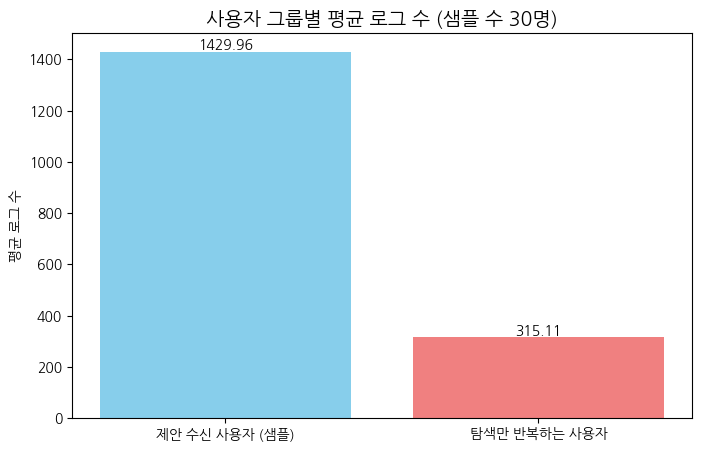

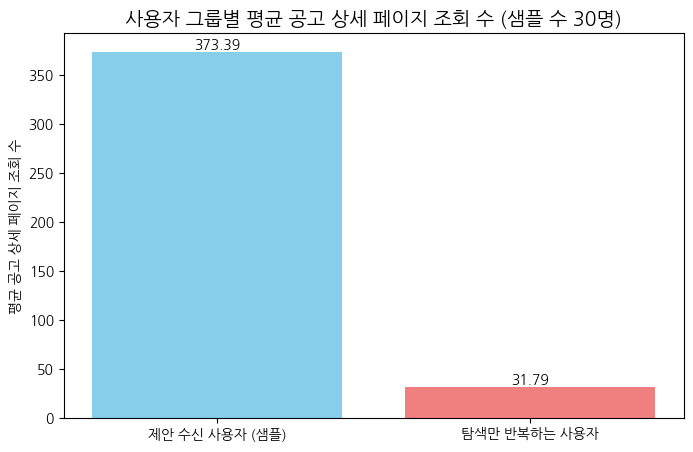

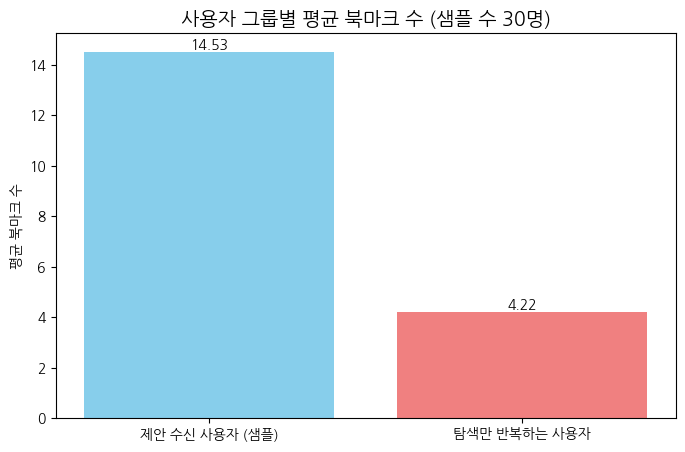

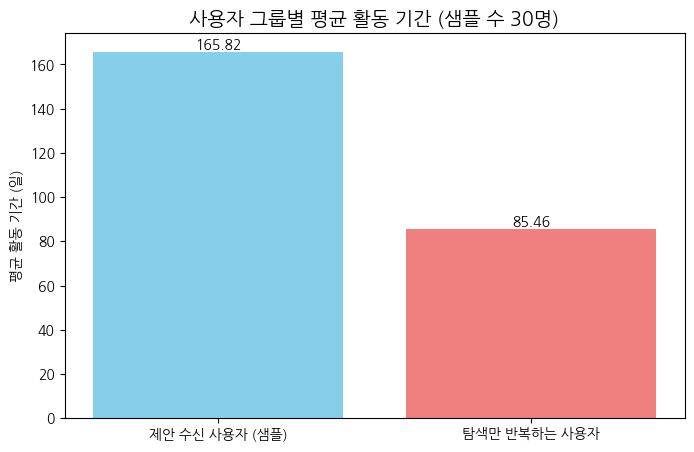

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

# 이미 로드된 acquisition_df 사용
# acquisition_df = pd.read_csv(...)

# 데이터 타입 확인 및 변환 (필요시)
acquisition_df['timestamp'] = acquisition_df['timestamp'].astype(str).str.replace(' UTC', '')
acquisition_df['timestamp'] = pd.to_datetime(acquisition_df['timestamp'], errors='coerce')
acquisition_df.dropna(subset=['timestamp'], inplace=True)
acquisition_df['URL'] = acquisition_df['URL'].astype(str).str.split('?').str[0]


# ----------- 사용자 그룹 정의 및 샘플링 (다운샘플링 적용 - 30명으로 통일) -----------

# 제안 수신 사용자 그룹 (Acquisition 단계에 포함된 제안 수신 사용자)
offer_received_users = acquisition_df[
    acquisition_df['URL'].astype(str).str.contains('@user_id/job_offer/received', na=False)
]['user_uuid'].unique()
offer_users_in_acquisition = acquisition_df[
    acquisition_df['user_uuid'].isin(offer_received_users)
]['user_uuid'].unique()

# 탐색만 반복하는 사용자 그룹 (Acquisition 단계에 포함되지만, 오퍼 수신 기록이 없고, 공고 상세 페이지 조회 기록이 있는 사용자)
applied_users_in_acquisition = acquisition_df[
    acquisition_df['URL'] == 'api/jobs/id/apply/step4'
]['user_uuid'].unique()
job_viewed_users_in_acquisition = acquisition_df[
    acquisition_df['URL'].astype(str).str.contains('jobs/id', na=False) &
    ~acquisition_df['URL'].astype(str).str.contains('jobs/id/apply', na=False) # apply 관련 제외
]['user_uuid'].unique()
exploring_only_users = acquisition_df[
    acquisition_df['user_uuid'].isin(acquisition_df['user_uuid'].unique()) &
    ~acquisition_df['user_uuid'].isin(applied_users_in_acquisition) &
    acquisition_df['user_uuid'].isin(job_viewed_users_in_acquisition)
]['user_uuid'].unique()

# 두 그룹 간 중복 사용자 제거 (분석의 명확성을 위해)
offer_users_uuids = set(offer_users_in_acquisition)
exploring_only_users_uuids = set(exploring_only_users)
common_users = offer_users_uuids & exploring_only_users_uuids

# 중복 제거 후 그룹 정의 (샘플링/비교 대상에서 중복 제외)
offer_users_for_sampling = list(offer_users_uuids - common_users)
exploring_only_users_for_comparison = list(exploring_only_users_uuids - common_users)

print(f"샘플링 대상 제안 수신 사용자 수 (중복 제거 후): {len(offer_users_for_sampling)}명")
print(f"비교 대상 탐색만 반복하는 사용자 수 (중복 제거 후): {len(exploring_only_users_for_comparison)}명")

# 다운샘플링 크기 결정 (30명으로 통일)
sample_size = 30
print(f"다운샘플링 크기: {sample_size}명")

# 제안 수신 그룹에서 다운샘플링
if len(offer_users_for_sampling) > sample_size:
    np.random.seed(42) # 결과 재현을 위해 시드 설정
    sampled_offer_users = np.random.choice(
        offer_users_for_sampling,
        size=sample_size,
        replace=False # 중복 없이 선택
    )
else:
    # 제안 수신 그룹 수가 샘플 크기보다 작거나 같으면 모두 사용 (예상치 못했지만 방어 코드)
    sampled_offer_users = offer_users_for_sampling

# 최종 비교 분석 대상 그룹 정의
offer_users_for_comparison = sampled_offer_users.tolist() # numpy array를 list로 변환
not_offer_users_for_comparison = exploring_only_users_for_comparison # 탐색만 반복하는 그룹은 이미 30명 내외

# 탐색만 반복하는 그룹의 최종 크기를 실제 샘플링 크기로 맞춥니다.
# (만약 exploring_only_users_for_comparison 가 30명 미만일 경우를 대비)
final_exploring_sample_size = min(sample_size, len(not_offer_users_for_comparison))
np.random.seed(42) # 다시 시드 설정하여 무작위 선택 (필요 시)
not_offer_users_for_comparison = np.random.choice(
    not_offer_users_for_comparison,
    size=final_exploring_sample_size,
    replace=False
).tolist()

# 제안 수신 그룹도 최종 샘플링 크기에 맞춥니다.
# (탐색만 반복하는 그룹 크기가 30명 미만일 경우를 대비)
if len(offer_users_for_comparison) > final_exploring_sample_size:
     np.random.seed(42)
     offer_users_for_comparison = np.random.choice(
        offer_users_for_comparison,
        size=final_exploring_sample_size,
        replace=False # 중복 없이 선택
    ).tolist()


print(f"\n최종 비교 분석 대상 - 제안 수신 사용자 수 (다운샘플링 후): {len(offer_users_for_comparison)}명")
print(f"최종 비교 분석 대상 - 탐색만 반복하는 사용자 수 (최종): {len(not_offer_users_for_comparison)}명")


# ----------- 그룹별 로그 데이터 준비 (샘플링된 사용자 기준) -----------

# 제안 수신 사용자 그룹의 로그 데이터 (샘플링된 사용자 기준)
offer_log_df_sampled = acquisition_df[acquisition_df['user_uuid'].isin(offer_users_for_comparison)].copy()

# 탐색만 반복하는 사용자 그룹의 로그 데이터 (샘플링된 사용자 기준)
exploring_log_df_sampled = acquisition_df[acquisition_df['user_uuid'].isin(not_offer_users_for_comparison)].copy()

print(f"제안 수신 사용자 샘플 로그 데이터 행 수: {len(offer_log_df_sampled)}")
print(f"탐색만 반복하는 사용자 샘플 로그 데이터 행 수: {len(exploring_log_df_sampled)}")


# ----------- 행동 패턴 비교 (샘플링된 데이터 사용) -----------

# 1. 평균 로그 수 비교
avg_logs_offer = offer_log_df_sampled.groupby('user_uuid').size().mean() if not offer_log_df_sampled.empty else 0
avg_logs_exploring = exploring_log_df_sampled.groupby('user_uuid').size().mean() if not exploring_log_df_sampled.empty else 0

print(f"\n평균 로그 수 - 제안 수신 사용자 (샘플): {avg_logs_offer:.2f}")
print(f"평균 로그 수 - 탐색만 반복하는 사용자 (샘플): {avg_logs_exploring:.2f}")

# 2. 특정 URL 접속 빈도 비교 (예: 공고 상세 페이지)
job_view_url = 'jobs/id'
offer_job_views = offer_log_df_sampled[offer_log_df_sampled['URL'].astype(str).str.contains(job_view_url, na=False)].groupby('user_uuid').size().mean() if not offer_log_df_sampled.empty else 0
exploring_job_views = exploring_log_df_sampled[exploring_log_df_sampled['URL'].astype(str).str.contains(job_view_url, na=False)].groupby('user_uuid').size().mean() if not exploring_log_df_sampled.empty else 0

print(f"\n평균 공고 상세 페이지 조회 수 - 제안 수신 사용자 (샘플): {offer_job_views:.2f}")
print(f"평균 공고 상세 페이지 조회 수 - 탐색만 반복하는 사용자 (샘플): {exploring_job_views:.2f}")


# 3. 다른 기능 사용 비교 (예: 북마크)
bookmark_url = 'api/jobs/id/bookmark'
offer_bookmarks = offer_log_df_sampled[offer_log_df_sampled['URL'].astype(str).str.contains(bookmark_url, na=False)].groupby('user_uuid').size().mean() if not offer_log_df_sampled.empty else 0
exploring_bookmarks = exploring_log_df_sampled[exploring_log_df_sampled['URL'].astype(str).str.contains(bookmark_url, na=False)].groupby('user_uuid').size().mean() if not exploring_log_df_sampled.empty else 0

print(f"\n평균 북마크 수 - 제안 수신 사용자 (샘플): {offer_bookmarks:.2f}")
print(f"평균 북마크 수 - 탐색만 반복하는 사용자 (샘플): {exploring_bookmarks:.2f}")

# 4. 활동 기간 (첫 로그부터 마지막 로그까지의 일수) 비교
def calculate_activity_days(df):
    if df.empty:
        return 0
    grouped = df.groupby('user_uuid')['timestamp'].agg(['min', 'max'])
    # 활동 기간 계산 (최소 1일)
    activity_days = (grouped['max'] - grouped['min']).dt.days + 1
    # 활동 기간이 0일인 경우를 1일로 처리할지 여부 결정 (여기는 +1로 일수로 계산)
    return activity_days.mean()

avg_activity_days_offer = calculate_activity_days(offer_log_df_sampled)
avg_activity_days_exploring = calculate_activity_days(exploring_log_df_sampled)

print(f"\n평균 활동 기간 (일) - 제안 수신 사용자 (샘플): {avg_activity_days_offer:.2f}")
print(f"평균 활동 기간 (일) - 탐색만 반복하는 사용자 (샘플): {avg_activity_days_exploring:.2f}")


# ----------- 시각화 (샘플링된 데이터 결과) -----------

# 평균 로그 수 시각화
labels = ['제안 수신 사용자 (샘플)', '탐색만 반복하는 사용자']
avg_logs = [avg_logs_offer, avg_logs_exploring]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, avg_logs, color=['skyblue', 'lightcoral'])
plt.ylabel('평균 로그 수')
plt.title('사용자 그룹별 평균 로그 수 (샘플 수 30명)', fontsize=14)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')
plt.show()

# 평균 공고 상세 페이지 조회 수 시각화
avg_job_views = [offer_job_views, exploring_job_views]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, avg_job_views, color=['skyblue', 'lightcoral'])
plt.ylabel('평균 공고 상세 페이지 조회 수')
plt.title('사용자 그룹별 평균 공고 상세 페이지 조회 수 (샘플 수 30명)', fontsize=14)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')
plt.show()

# 평균 북마크 수 시각화
avg_bookmarks = [offer_bookmarks, exploring_bookmarks]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, avg_bookmarks, color=['skyblue', 'lightcoral'])
plt.ylabel('평균 북마크 수')
plt.title('사용자 그룹별 평균 북마크 수 (샘플 수 30명)', fontsize=14)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')
plt.show()


# 평균 활동 기간 시각화
avg_activity = [avg_activity_days_offer, avg_activity_days_exploring]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, avg_activity, color=['skyblue', 'lightcoral'])
plt.ylabel('평균 활동 기간 (일)')
plt.title('사용자 그룹별 평균 활동 기간 (샘플 수 30명)', fontsize=14)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')
plt.show()

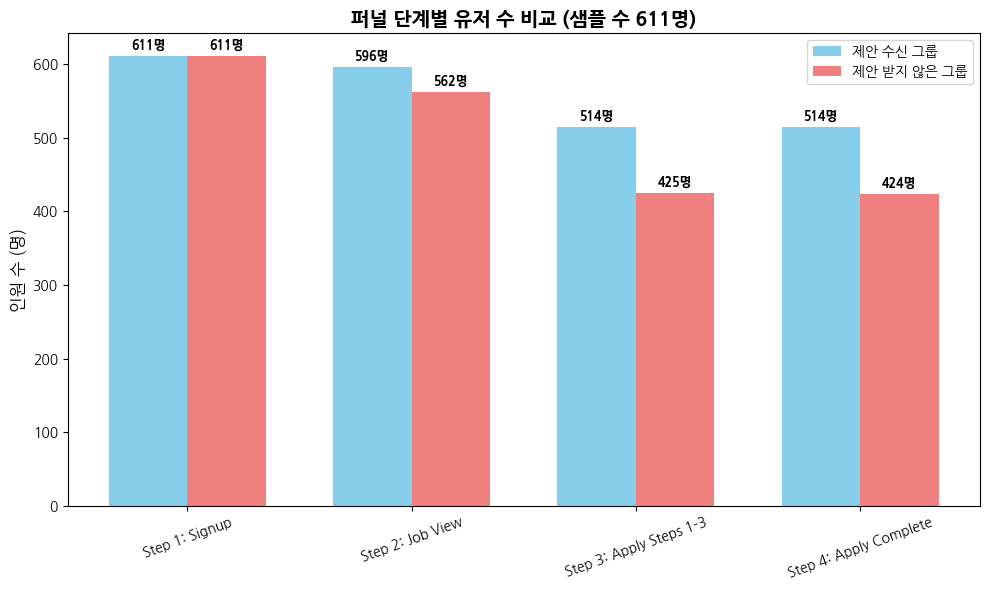

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 퍼널 단계 라벨
labels = ['Step 1: Signup', 'Step 2: Job View', 'Step 3: Apply Steps 1-3', 'Step 4: Apply Complete']

# 각 그룹의 사용자 수
proposal_group = [611, 596, 514, 514]
non_proposal_group = [611, 562, 425, 424]

x = np.arange(len(labels))  # X축 위치
width = 0.35  # 막대 너비

fig, ax = plt.subplots(figsize=(10, 6))

# 막대 그래프 생성 (skyblue, lightcoral)
bars1 = ax.bar(x - width/2, proposal_group, width, label='제안 수신 그룹', color='skyblue')
bars2 = ax.bar(x + width/2, non_proposal_group, width, label='제안 받지 않은 그룹', color='lightcoral')

# 막대 위에 수치 표시
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{int(height)}명',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=9, fontweight='bold')

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{int(height)}명',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=9, fontweight='bold')

# 그래프 속성 설정
ax.set_ylabel('인원 수 (명)', fontsize=12)
ax.set_title('퍼널 단계별 유저 수 비교 (샘플 수 611명)', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=20)
ax.legend()

plt.tight_layout()
plt.show()


# 세그먼트별 코호트 분석

Acquisition 단계에 포함된 제안 수신 사용자 수: 611명
Acquisition 단계에 포함된 제안 받지 않은 사용자 수: 1450명


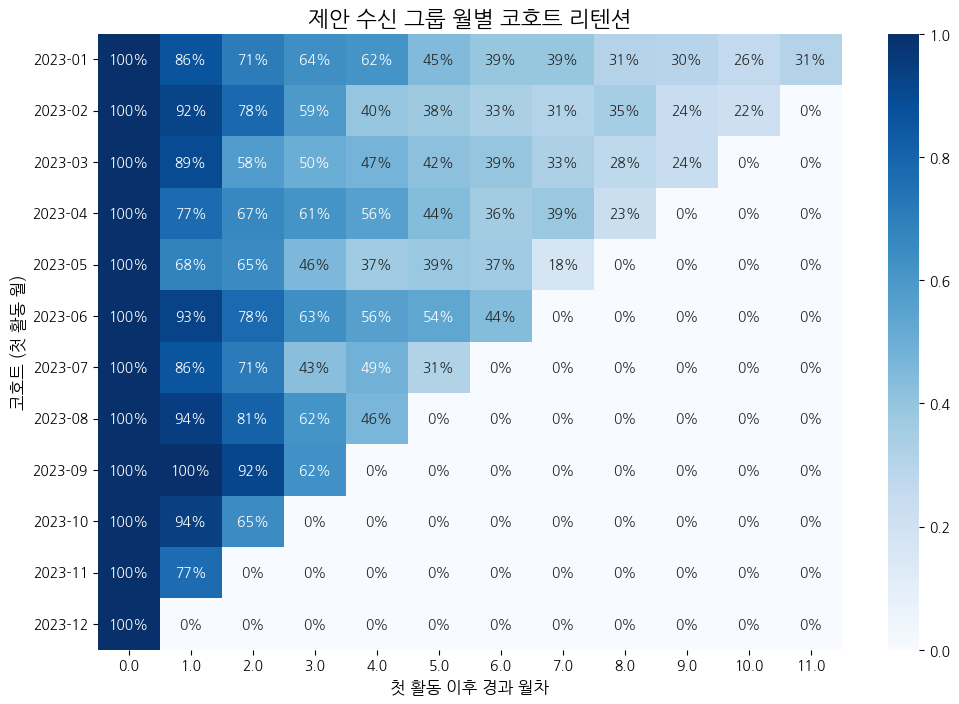

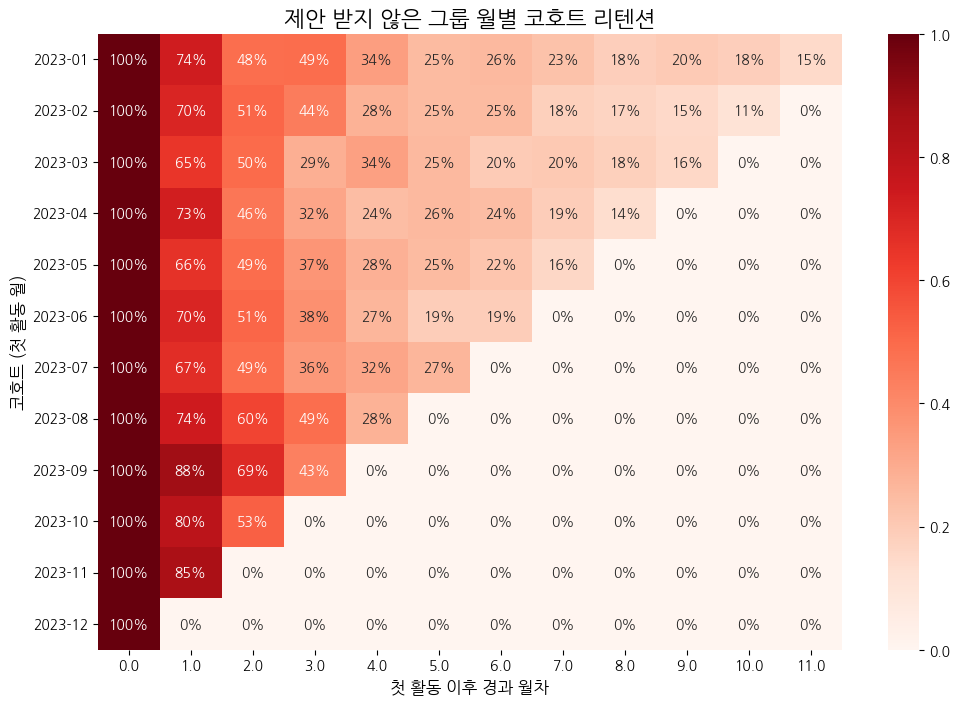

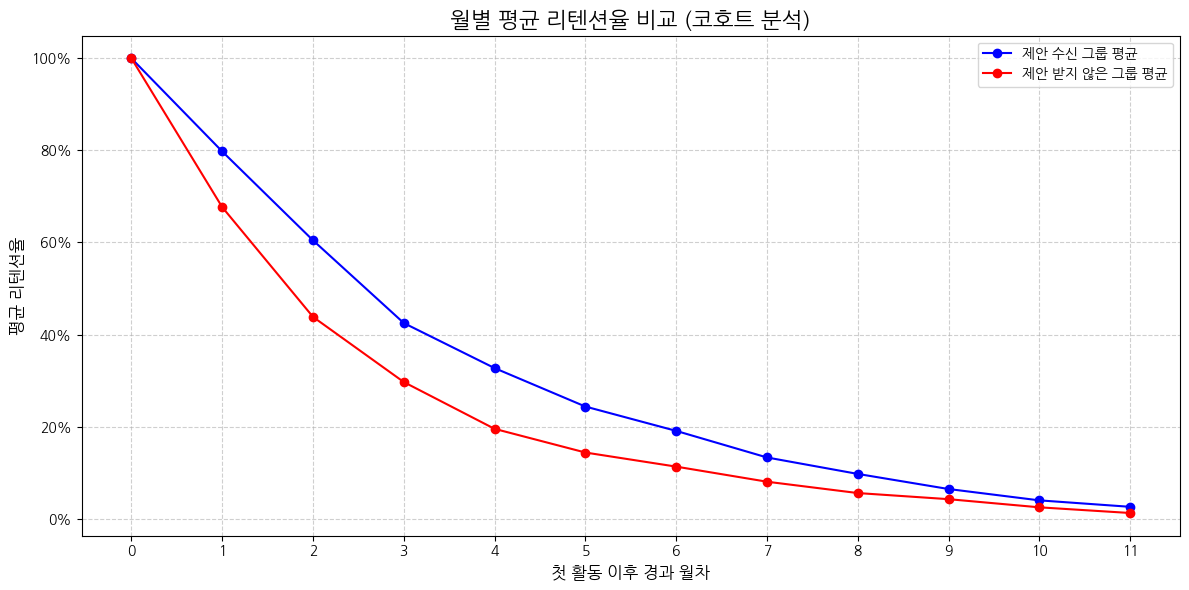


제안 수신 그룹 월별 코호트 리텐션 테이블 (일부):


period_number,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
cohort,,,,,,,,,,,,
2023-01,1.0,0.859813,0.710280,0.635514,0.616822,0.448598,0.392523,0.392523,0.308411,0.299065,0.261682,0.308411
2023-02,1.0,0.924731,0.784946,0.591398,0.397849,0.376344,0.333333,0.311828,0.354839,0.236559,0.215054,0.000000
2023-03,1.0,0.894737,0.578947,0.500000,0.473684,0.421053,0.394737,0.328947,0.276316,0.236842,0.000000,0.000000
2023-04,1.0,0.773333,0.666667,0.613333,0.560000,0.440000,0.360000,0.386667,0.226667,0.000000,0.000000,0.000000
2023-05,1.0,0.684211,0.649123,0.456140,0.368421,0.385965,0.368421,0.175439,0.000000,0.000000,0.000000,0.000000



제안 받지 않은 그룹 월별 코호트 리텐션 테이블 (일부):


period_number,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
cohort,,,,,,,,,,,,
2023-01,1.0,0.736196,0.484663,0.490798,0.337423,0.251534,0.257669,0.226994,0.184049,0.202454,0.184049,0.147239
2023-02,1.0,0.700000,0.511111,0.444444,0.277778,0.250000,0.250000,0.183333,0.166667,0.150000,0.111111,0.000000
2023-03,1.0,0.645963,0.496894,0.285714,0.335404,0.254658,0.198758,0.204969,0.180124,0.155280,0.000000,0.000000
2023-04,1.0,0.727273,0.462121,0.318182,0.242424,0.257576,0.242424,0.189394,0.136364,0.000000,0.000000,0.000000
2023-05,1.0,0.658333,0.491667,0.366667,0.283333,0.250000,0.216667,0.158333,0.000000,0.000000,0.000000,0.000000


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib # 한글 폰트 설정을 위해 필요

# 이미 로드된 acquisition_df 사용
# acquisition_df = pd.read_csv(...)

# 데이터 타입 확인 및 변환 (필요시)
acquisition_df['timestamp'] = acquisition_df['timestamp'].astype(str).str.replace(' UTC', '')
acquisition_df['timestamp'] = pd.to_datetime(acquisition_df['timestamp'], errors='coerce')
acquisition_df.dropna(subset=['timestamp'], inplace=True)
acquisition_df['URL'] = acquisition_df['URL'].astype(str).str.split('?').str[0]


# ----------- 사용자 그룹 정의 (이전 코드에서 사용한 그룹 재사용) -----------

# 제안 수신 사용자 그룹 (Acquisition 단계에 포함된 제안 수신 사용자)
offer_received_users = acquisition_df[
    acquisition_df['URL'].astype(str).str.contains('@user_id/job_offer/received', na=False)
]['user_uuid'].unique()
offer_users_in_acquisition = acquisition_df[
    acquisition_df['user_uuid'].isin(offer_received_users)
]['user_uuid'].unique()

# 제안 받지 않은 사용자 그룹 (Acquisition 단계에 포함되지만, 오퍼 수신 기록이 없는 사용자)
not_offer_users_in_acquisition = acquisition_df[
    ~acquisition_df['user_uuid'].isin(offer_users_in_acquisition)
]['user_uuid'].unique()

print(f"Acquisition 단계에 포함된 제안 수신 사용자 수: {len(offer_users_in_acquisition)}명")
print(f"Acquisition 단계에 포함된 제안 받지 않은 사용자 수: {len(not_offer_users_in_acquisition)}명")


# ----------- 그룹별 로그 데이터 준비 -----------

# 제안 수신 사용자 그룹의 로그 데이터
offer_log_df = acquisition_df[acquisition_df['user_uuid'].isin(offer_users_in_acquisition)].copy()

# 제안 받지 않은 사용자 그룹의 로그 데이터
not_offer_log_df = acquisition_df[acquisition_df['user_uuid'].isin(not_offer_users_in_acquisition)].copy()


# ----------- 코호트 분석 함수 정의 -----------

def analyze_cohort_retention(df, group_name, frequency):
    """
    주어진 그룹의 로그 데이터에 대해 코호트 리텐션 분석을 수행합니다.

    Args:
        df (pd.DataFrame): 해당 그룹의 로그 데이터. user_uuid, timestamp 포함.
        group_name (str): 그룹 이름 (예: '제안 수신 그룹').
        frequency (str): 'W' (주차별) 또는 'M' (월별).

    Returns:
        pd.DataFrame: 코호트별 리텐션율 데이터프레임.
    """
    if df.empty:
        print(f"Warning: {group_name} 데이터가 비어 있어 코호트 분석을 건너뜝니다.")
        return pd.DataFrame()

    # 각 사용자의 첫 활동 시점 찾기 (코호트 정의 기준)
    first_activity = df.groupby('user_uuid')['timestamp'].min().reset_index()
    first_activity.columns = ['user_uuid', 'cohort_time']

    # 코호트 정의 (첫 활동 시점 기준 주 또는 월)
    if frequency == 'W':
        first_activity['cohort'] = first_activity['cohort_time'].dt.to_period('W').apply(lambda r: r.start_time)
    elif frequency == 'M':
        first_activity['cohort'] = first_activity['cohort_time'].dt.to_period('M')
    else:
        raise ValueError("frequency는 'W' 또는 'M'이어야 합니다.")

    # 원본 로그 데이터에 코호트 정보 병합
    df_with_cohort = df.merge(first_activity[['user_uuid', 'cohort']], on='user_uuid', how='left')

    # 각 로그의 타임스탬프가 코호트 시점으로부터 몇 주기 경과했는지 계산
    if frequency == 'W':
        df_with_cohort['period_number'] = ((df_with_cohort['timestamp'] - df_with_cohort['cohort']).dt.days // 7)
    elif frequency == 'M':
        # Period 객체 뺄셈 및 결과 처리 (NaN 값 처리 포함)
        cohort_period = df_with_cohort['cohort'].astype('period[M]') # 코호트를 Period[M]으로 변환
        log_period = df_with_cohort['timestamp'].dt.to_period('M') # 로그 타임스탬프를 Period[M]으로 변환

        period_diff = (log_period - cohort_period)

        # NaT가 아닌 유효한 차이 값만 사용
        valid_periods_mask = period_diff.notna()
        valid_period_diff = period_diff[valid_periods_mask]

        # 경과 월차 계산 및 할당
        df_with_cohort.loc[valid_periods_mask, 'period_number'] = valid_period_diff.apply(lambda x: x.n if hasattr(x, 'n') else np.nan)

    # 0 미만 기간은 제외 (데이터 오류 가능성)
    df_with_cohort = df_with_cohort[df_with_cohort['period_number'] >= 0].copy()

    if df_with_cohort.empty:
         print(f"Warning: {group_name} 필터링 후 데이터가 비어 코호트 분석을 건너뜁니다.")
         return pd.DataFrame()


    # 코호트 및 활동 주기별 고유 사용자 수 집계
    cohort_counts = df_with_cohort.groupby(['cohort', 'period_number'])['user_uuid'].nunique().unstack(fill_value=0)

    # 코호트 크기 (0주차/월차 사용자 수)
    cohort_sizes = cohort_counts[0]

    # 리텐션율 계산
    retention_rate = cohort_counts.divide(cohort_sizes, axis=0)

    return retention_rate

# ----------- 코호트 분석 실행 (월별) -----------

# 제안 수신 그룹 월별 코호트 분석
offer_monthly_retention_df = analyze_cohort_retention(offer_log_df.copy(), '제안 수신 그룹', 'M')

# 제안 받지 않은 그룹 월별 코호트 분석
not_offer_monthly_retention_df = analyze_cohort_retention(not_offer_log_df.copy(), '제안 받지 않은 그룹', 'M')


# ----------- 결과 시각화 (히트맵 및 평균 리텐션 곡선) -----------

# 월별 코호트 리텐션 히트맵 - 제안 수신 그룹
if not offer_monthly_retention_df.empty:
    plt.figure(figsize=(12, 8))
    sns.heatmap(offer_monthly_retention_df, annot=True, fmt=".0%", cmap="Blues", vmin=0, vmax=1)
    plt.title("제안 수신 그룹 월별 코호트 리텐션", fontsize=16)
    plt.xlabel("첫 활동 이후 경과 월차", fontsize=12)
    plt.ylabel("코호트 (첫 활동 월)", fontsize=12)
    plt.show()

# 월별 코호트 리텐션 히트맵 - 제안 받지 않은 그룹
if not not_offer_monthly_retention_df.empty:
    plt.figure(figsize=(12, 8))
    sns.heatmap(not_offer_monthly_retention_df, annot=True, fmt=".0%", cmap="Reds", vmin=0, vmax=1)
    plt.title("제안 받지 않은 그룹 월별 코호트 리텐션", fontsize=16)
    plt.xlabel("첫 활동 이후 경과 월차", fontsize=12)
    plt.ylabel("코호트 (첫 활동 월)", fontsize=12)
    plt.show()


# 월별 평균 리텐션 곡선 비교
# 각 그룹의 전체 코호트 평균 리텐션 계산
offer_monthly_avg_retention = offer_monthly_retention_df.mean(axis=0) if not offer_monthly_retention_df.empty else pd.Series()
not_offer_monthly_avg_retention = not_offer_monthly_retention_df.mean(axis=0) if not not_offer_monthly_retention_df.empty else pd.Series()

plt.figure(figsize=(12, 6))
if not offer_monthly_avg_retention.empty:
    plt.plot(offer_monthly_avg_retention.index, offer_monthly_avg_retention.values, marker='o', label='제안 수신 그룹 평균', color='blue')
if not not_offer_monthly_avg_retention.empty:
    plt.plot(not_offer_monthly_avg_retention.index, not_offer_monthly_avg_retention.values, marker='o', label='제안 받지 않은 그룹 평균', color='red')

plt.title("월별 평균 리텐션율 비교 (코호트 분석)", fontsize=16)
plt.xlabel("첫 활동 이후 경과 월차", fontsize=12)
plt.ylabel("평균 리텐션율", fontsize=12)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.xticks(ticks=offer_monthly_avg_retention.index if not offer_monthly_avg_retention.empty else not_offer_monthly_avg_retention.index) # x축 눈금 설정
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


# 결과 데이터프레임 확인 (선택 사항)
print("\n제안 수신 그룹 월별 코호트 리텐션 테이블 (일부):")
display(offer_monthly_retention_df.head())

print("\n제안 받지 않은 그룹 월별 코호트 리텐션 테이블 (일부):")
display(not_offer_monthly_retention_df.head())

# 머신러닝 클러스터 분석

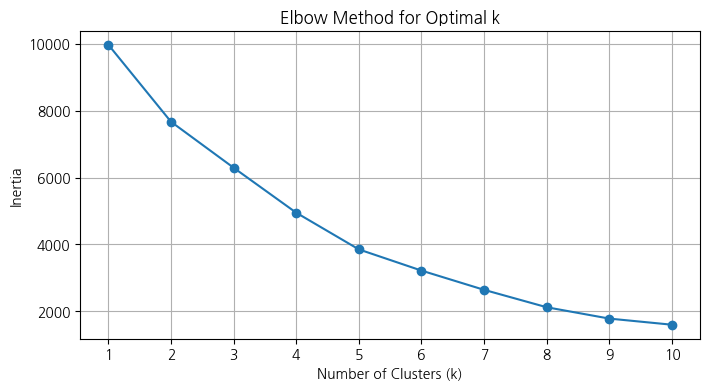


Cluster Summary (Mean Feature Values):
          Profile_Resume_Freq  Job_Company_Explore_Freq  Apply_Steps_Freq  \
Cluster                                                                    
0                  36.656250                790.393750         297.15000   
1                1485.000000               2057.000000         663.00000   
2                   7.530534                124.027808          43.08615   

         Bookmark_Freq  Time_to_First_Apply_Seconds  
Cluster                                              
0            18.475000                   -65.371051  
1             2.000000                    -0.415257  
2             1.524537                 -4238.395142  


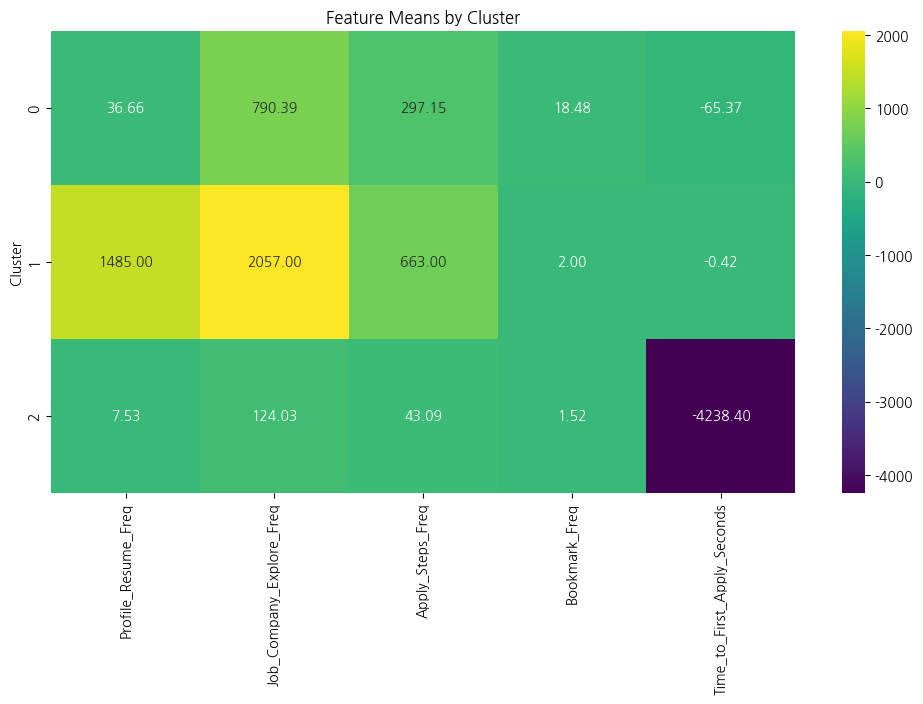


Cluster Sizes:
 Cluster
0     160
1       1
2    1834
Name: count, dtype: int64

Clustering Results (First few users):
                                       Profile_Resume_Freq  \
user_uuid                                                   
000b55ad-5c86-438b-a5b0-9ea3a2917789                    0   
00605090-bd12-4978-884b-c74e093b40d0                   71   
00778343-487a-44c0-a1f2-895b993d148a                    3   
00a344d1-230f-4321-8dc9-eb4b97cdf754                    0   
00b43208-7cc2-4a35-b8fb-73baa3258dcf                    2   

                                      Job_Company_Explore_Freq  \
user_uuid                                                        
000b55ad-5c86-438b-a5b0-9ea3a2917789                       109   
00605090-bd12-4978-884b-c74e093b40d0                       198   
00778343-487a-44c0-a1f2-895b993d148a                        34   
00a344d1-230f-4321-8dc9-eb4b97cdf754                         9   
00b43208-7cc2-4a35-b8fb-73baa3258dcf                   

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Activation 단계 이후의 사용자 로그 데이터프레임 (df_with_apply_copy 사용)
# 이미 코랩 노트북에 정의되어 있습니다.

# 1. 클러스터링 특징 추출
# 각 user_uuid별 리텐션 행동 빈도 계산
retention_features = df_with_apply_copy.groupby('user_uuid')['URL'].apply(lambda x: pd.Series({
    'profile_resume_freq': x.str.contains('api/users/id/education|api/users/id/career|api/users/id/project|api/users/id/image|api/users/id/resume|api/users/id/sns').sum(),
    'job_company_explore_freq': x.str.contains('api/search/companies|companies/company_id/jobs|api/companies/id/view|jobs/id').sum(),
    'apply_steps_freq': x.str.contains('jobs/id/apply').sum(), # jobs/id/apply는 step1~3을 포괄합니다.
    'bookmark_freq': x.str.contains('api/jobs/id/bookmark').sum()
})).unstack(fill_value=0)

# 첫 지원 완료까지 소요 시간 계산 (시간 단위)
# first_apply_time은 이미 df_with_apply_copy에 포함되어 있습니다.
# 첫 로그 시점 (signup/detail)을 기준으로 하려면 acquisition_df를 사용해야 합니다.
# 여기서는 활성화 이후 행동 패턴에 집중하므로, df_with_apply_copy의 first_apply_time을 활용합니다.
# 만약 첫 가입부터 지원까지 시간을 포함하고 싶다면, acquisition_df를 기반으로 시간을 계산해야 합니다.

# 각 사용자의 첫 로그 시간 (활성화 이후)
first_log_time_after_activation = df_with_apply_copy.groupby('user_uuid')['timestamp'].min()

# 첫 지원 완료 시간
first_apply_time = df_with_apply_copy.groupby('user_uuid')['first_apply_time'].first()

# 첫 지원 완료까지 소요 시간 계산 (초 단위)
time_to_first_apply = (first_apply_time - first_log_time_after_activation).dt.total_seconds().fillna(0) # 결측치는 0으로 채움

# 특징 데이터프레임 결합
clustering_data = retention_features.copy()
clustering_data['time_to_first_apply'] = time_to_first_apply

# 특징 이름 변경 (가독성을 위해)
clustering_data.columns = ['Profile_Resume_Freq', 'Job_Company_Explore_Freq', 'Apply_Steps_Freq', 'Bookmark_Freq', 'Time_to_First_Apply_Seconds']

# 2. 데이터 스케일링
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)
scaled_df = pd.DataFrame(scaled_data, columns=clustering_data.columns, index=clustering_data.index)

# 3. 클러스터 수 결정 (엘보우 방법)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init을 명시적으로 설정
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# 엘보우 그래프를 보고 적절한 클러스터 수를 선택합니다. (예: k=3 또는 4)
# 이 예시에서는 k=3으로 가정하고 진행합니다.

# 4. 클러스터링 수행 (k=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10) # n_init을 명시적으로 설정
clusters = kmeans.fit_predict(scaled_data)

# 클러스터 결과를 원래 데이터프레임에 추가
clustering_data['Cluster'] = clusters

# 5. 결과 해석 및 시각화
# 각 클러스터별 특징의 평균값 확인
cluster_summary = clustering_data.groupby('Cluster').mean()
print("\nCluster Summary (Mean Feature Values):\n", cluster_summary)

# 시각화를 통해 클러스터별 특징 비교
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_summary, annot=True, cmap='viridis', fmt=".2f")
plt.title('Feature Means by Cluster')
plt.show()

# 각 클러스터의 크기 확인
print("\nCluster Sizes:\n", clustering_data['Cluster'].value_counts().sort_index())

# 클러스터링 결과 확인 (처음 몇 개 사용자)
print("\nClustering Results (First few users):\n", clustering_data.head())

제가 판단하기에 현재 분석하신 데이터와 목표에 가장 적합한 클러스터링 방법은 활성화(Activation) 단계 이후 사용자들의 행동 패턴을 기반으로 세그먼트를 나누는 것입니다.

이는 핵심 가치 경험 이후의 사용자 행동을 이해하는 데 초점을 맞추므로, 리텐션 전략이나 사용자 경험 개선에 직접적인 인사이트를 제공할 수 있습니다.

구체적으로, 다음과 같은 특징들을 사용하여 클러스터링을 진행할 수 있습니다.

리텐션 행동 빈도:
프로필/이력서 관련 행동 빈도
기업/공고 탐색 행동 빈도
지원 단계(Step1~3) 접근 빈도
북마크 행동 빈도
핵심 가치 경험까지 소요 시간:
첫 지원 완료까지 걸린 시간
이러한 특징들을 기반으로 클러스터링을 수행하고, 각 클러스터의 특성을 분석하여 어떤 그룹이 더 활발하게 활동하고 어떤 그룹이 빠르게 이탈하는지 등을 파악할 수 있습니다.

아래는 이러한 특징들을 추출하고 K-평균 클러스터링을 수행하는 예시 코드입니다.

클러스터 0:

Profile_Resume_Freq (프로필/이력서 관련 행동 빈도): 중간 수준 (36.66)
Job_Company_Explore_Freq (기업/공고 탐색 행동 빈도): 매우 높음 (790.39)
Apply_Steps_Freq (지원 단계 접근 빈도): 높음 (297.15)
Bookmark_Freq (북마크 행동 빈도): 높음 (18.48)
Time_to_First_Apply_Seconds (첫 지원 완료까지 소요 시간): 매우 짧음 (-65.37초). 이 값은 첫 지원 시간이 첫 활성화 이후 로그 시간보다 약간 빠른 경우에 발생할 수 있습니다. 활성화 정의에 따라 해석이 필요하지만, 지원까지 매우 빠르게 진행된 그룹으로 볼 수 있습니다.
요약: 이 클러스터는 기업 및 공고 탐색과 지원 단계 접근 빈도가 매우 높고, 북마크 기능도 활발히 사용하는 '적극적인 탐색 및 지원 그룹'으로 보입니다. 첫 지원까지 걸리는 시간도 매우 짧은 편입니다.

클러스터 1:

Profile_Resume_Freq (프로필/이력서 관련 행동 빈도): 매우 높음 (1485.00)
Job_Company_Explore_Freq (기업/공고 탐색 행동 빈도): 매우 높음 (2057.00)
Apply_Steps_Freq (지원 단계 접근 빈도): 매우 높음 (663.00)
Bookmark_Freq (북마크 행동 빈도): 매우 낮음 (2.00)
Time_to_First_Apply_Seconds (첫 지원 완료까지 소요 시간): 매우 짧음 (-0.42초). 클러스터 0과 마찬가지로 첫 지원이 빠르게 이루어진 그룹입니다.
요약: 이 클러스터는 모든 활동 빈도가 압도적으로 높은 '초고빈도 활성 사용자 그룹'입니다. 특히 프로필/이력서, 기업/공고 탐색, 지원 단계 접근 빈도가 다른 클러스터와 비교할 수 없을 정도로 높습니다. 하지만 북마크 사용은 적습니다.

클러스터 2:

Profile_Resume_Freq (프로필/이력서 관련 행동 빈도): 낮음 (7.53)
Job_Company_Explore_Freq (기업/공고 탐색 행동 빈도): 낮음 (124.03)
Apply_Steps_Freq (지원 단계 접근 빈도): 낮음 (43.09)
Bookmark_Freq (북마크 행동 빈도): 낮음 (1.52)
Time_to_First_Apply_Seconds (첫 지원 완료까지 소요 시간): 긴 편 (-4238.40초). 이는 첫 지원까지 상대적으로 시간이 오래 걸렸거나, 활성화 정의 시점 이후 첫 지원까지의 로그가 적은 경우를 나타낼 수 있습니다.
요약: 이 클러스터는 모든 활동 빈도가 다른 클러스터에 비해 현저히 낮은 '낮은 활동성 그룹'입니다. 첫 지원까지 걸리는 시간도 긴 편으로 보아, 플랫폼 사용에 적극적이지 않은 사용자들로 구성되어 있을 가능성이 높습니다.

전반적인 해석:

클러스터 1은 플랫폼을 매우 적극적으로 활용하는 핵심 사용자 그룹일 가능성이 높습니다. 이들은 빈번하게 프로필/이력서를 관리하고, 공고를 탐색하며, 지원 절차를 진행합니다. 이 그룹은 플랫폼의 주요 가치를 가장 잘 경험하고 있을 것으로 예상됩니다.
클러스터 0은 클러스터 1만큼의 극단적인 활동 빈도는 아니지만, 기업/공고 탐색과 지원에 적극적인 사용자 그룹입니다. 북마크 기능 활용도 높아 관심 있는 공고를 저장해두는 경향이 있습니다.
클러스터 2는 플랫폼 사용 빈도가 낮은 그룹으로, 초기 이탈 가능성이 높거나 플랫폼의 핵심 기능을 충분히 경험하지 못했을 수 있습니다. 이 그룹의 특징을 더 분석하여 이탈 원인을 파악하고 재활성화 전략을 수립하는 것이 중요할 수 있습니다.
이러한 세그먼트 구분을 통해 각 그룹의 특성에 맞는 타겟팅 전략을 수립하고, 서비스 개선 방향을 설정하는 데 활용할 수 있습니다. 예를 들어, 클러스터 2 사용자의 활성화를 위한 푸시 알림, 온보딩 개선 또는 특정 기능 추천 등을 고려해볼 수 있습니다.

# 채널별 유입수

--- utm_source별 유입 사용자 수 ---
utm_source
notification         1277
excel                 486
google_jobs_apply      54
email                   7
                        1
kakaochatbot            1
Name: user_uuid, dtype: int64

--- utm_medium별 유입 사용자 수 ---
utm_medium
email      1249
alink       486
             88
organic      55
Name: user_uuid, dtype: int64


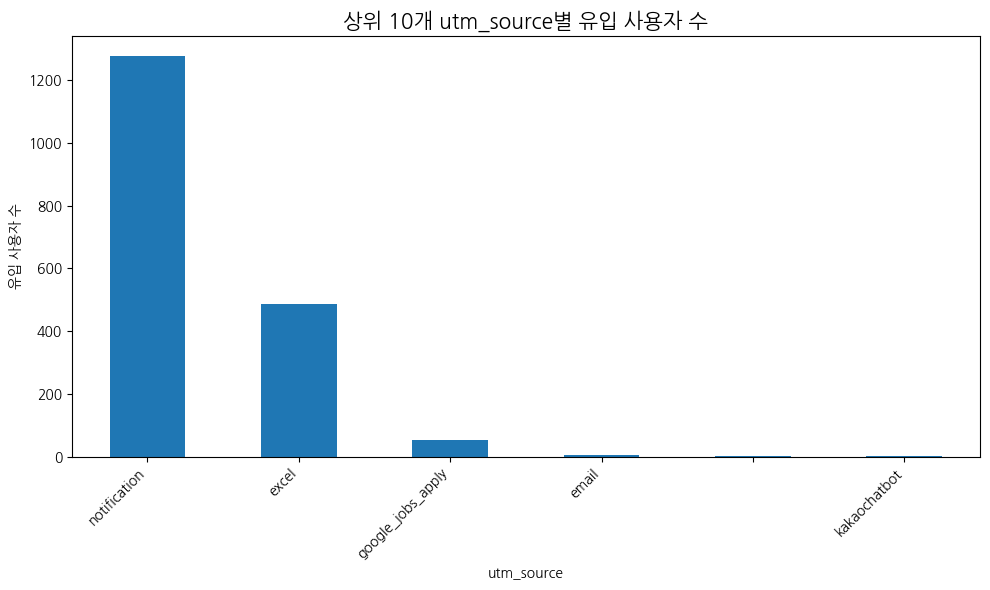

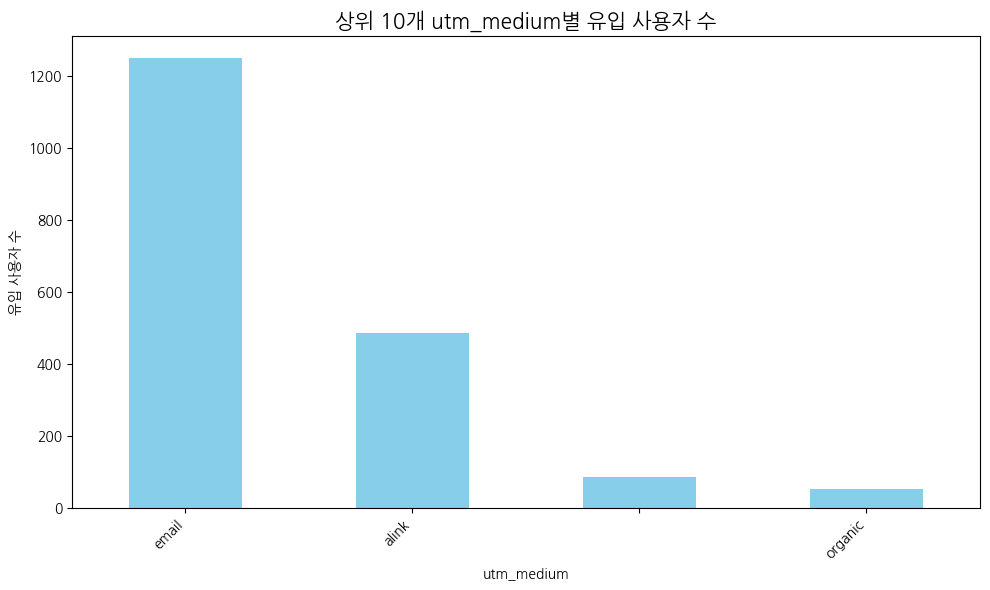

In [ ]:
# utm_df가 이미 생성되었다고 가정합니다.

# utm 파라미터 파싱 (이전 답변에서 사용한 코드 재활용)
from urllib.parse import parse_qs

def parse_utm(url):
    return parse_qs(url)

# 'URL' 컬럼의 결측치를 먼저 처리하거나 무시합니다. 여기서는 결측치를 제거합니다.
utm_df_cleaned = utm_df.dropna(subset=['URL']).copy()

parsed_utm = utm_df_cleaned['URL'].apply(lambda x: parse_utm(x))
utm_df_cleaned['utm_source'] = parsed_utm.apply(lambda x: x.get('utm_source', [''])[0])
utm_df_cleaned['utm_medium'] = parsed_utm.apply(lambda x: x.get('utm_medium', [''])[0])
utm_df_cleaned['utm_campaign'] = parsed_utm.apply(lambda x: x.get('utm_campaign', [''])[0])
utm_df_cleaned['utm_content'] = parsed_utm.apply(lambda x: x.get('utm_content', [''])[0])

# utm_source별 유입 사용자 수 계산
print("--- utm_source별 유입 사용자 수 ---")
source_counts = utm_df_cleaned.groupby('utm_source')['user_uuid'].nunique().sort_values(ascending=False)
print(source_counts)

# utm_medium별 유입 사용자 수 계산
print("\n--- utm_medium별 유입 사용자 수 ---")
medium_counts = utm_df_cleaned.groupby('utm_medium')['user_uuid'].nunique().sort_values(ascending=False)
print(medium_counts)

# 시각화 (utm_source 상위 N개)
top_n = 10 # 상위 10개 소스 시각화
plt.figure(figsize=(10, 6))
source_counts.head(top_n).plot(kind='bar')
plt.title(f'상위 {top_n}개 utm_source별 유입 사용자 수', fontsize=15)
plt.xlabel('utm_source')
plt.ylabel('유입 사용자 수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 시각화 (utm_medium 상위 N개)
plt.figure(figsize=(10, 6))
medium_counts.head(top_n).plot(kind='bar', color='skyblue')
plt.title(f'상위 {top_n}개 utm_medium별 유입 사용자 수', fontsize=15)
plt.xlabel('utm_medium')
plt.ylabel('유입 사용자 수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


--- notification 소스 그룹 퍼널 분석 ---
초기 유저 수 (notification): 1277명
1단계 (Signup): 1277명, 최초 대비 전환율: 100.0%
2단계 (Job View): 1222명, 전 단계 대비 전환율: 95.7%
3단계 (Step1~Step3 Apply): 1055명, 전 단계 대비 전환율: 86.3%
4단계 (Apply): 1053명, 전 단계 대비 전환율: 99.8%
최종 전환율 (Signup -> Apply): 82.5%

--- excel 소스 그룹 퍼널 분석 ---
초기 유저 수 (excel): 486명
1단계 (Signup): 486명, 최초 대비 전환율: 100.0%
2단계 (Job View): 465명, 전 단계 대비 전환율: 95.7%
3단계 (Step1~Step3 Apply): 445명, 전 단계 대비 전환율: 95.7%
4단계 (Apply): 444명, 전 단계 대비 전환율: 99.8%
최종 전환율 (Signup -> Apply): 91.4%

--- google_jobs_apply 소스 그룹 퍼널 분석 ---
초기 유저 수 (google_jobs_apply): 54명
1단계 (Signup): 54명, 최초 대비 전환율: 100.0%
2단계 (Job View): 42명, 전 단계 대비 전환율: 77.8%
3단계 (Step1~Step3 Apply): 34명, 전 단계 대비 전환율: 81.0%
4단계 (Apply): 34명, 전 단계 대비 전환율: 100.0%
최종 전환율 (Signup -> Apply): 63.0%

--- email 소스 그룹 퍼널 분석 ---
초기 유저 수 (email): 7명
1단계 (Signup): 7명, 최초 대비 전환율: 100.0%
2단계 (Job View): 6명, 전 단계 대비 전환율: 85.7%
3단계 (Step1~Step3 Apply): 6명, 전 단계 대비 전환율: 100.0%
4단계 (Apply): 6명, 전 단계 대비 전환율: 100.0%
최종 전환율 (S

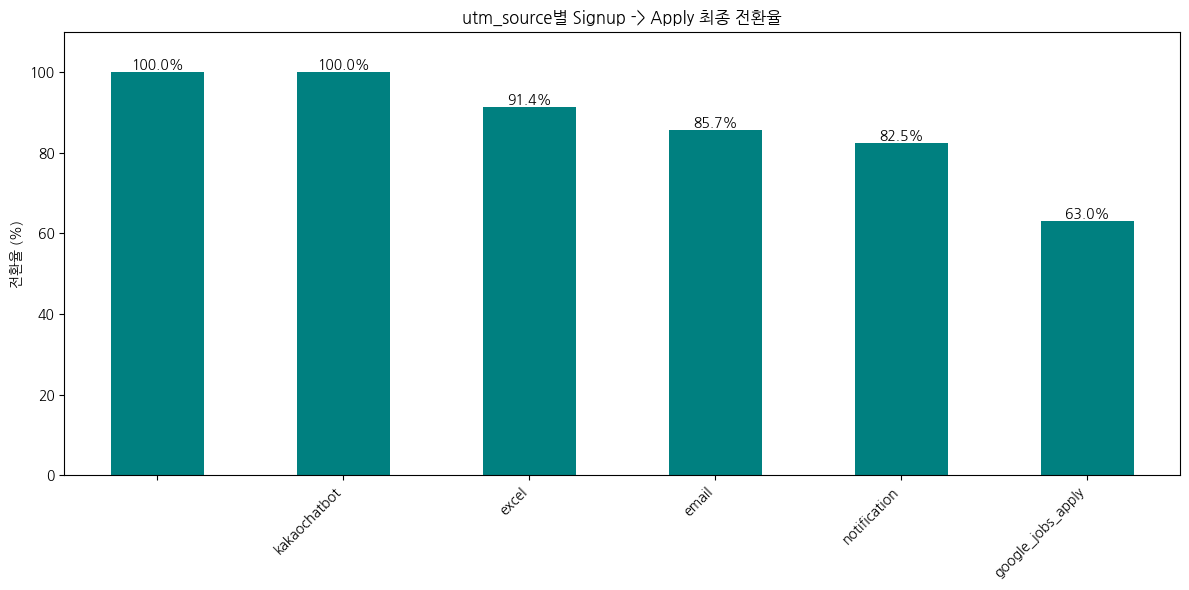

In [ ]:
# utm_df_cleaned 데이터프레임이 이미 생성되었다고 가정합니다.
# 또한 acquisition_df (전체 유입 고객 로그)가 필요합니다.

# 분석할 유입 채널 (utm_source) 리스트 정의
# 사용자 수가 많은 상위 N개 소스를 대상으로 분석하는 것이 효율적일 수 있습니다.
# 위에서 계산한 source_counts를 활용합니다.
target_sources = source_counts.head(10).index.tolist() # 상위 10개 소스 분석

# 각 utm_source 그룹별 퍼널 분석 함수 정의
def analyze_funnel_by_source(df, source_name, initial_df):
    print(f"\n--- {source_name} 소스 그룹 퍼널 분석 ---")

    # 해당 소스에 속하는 유저만 필터링
    source_users_list = df[df['utm_source'] == source_name]['user_uuid'].unique().tolist()
    initial_users = len(source_users_list)
    print(f"초기 유저 수 ({source_name}): {initial_users}명")

    if initial_users == 0:
        print("해당 소스에 해당하는 유저가 없습니다.")
        return None

    # 해당 소스 유저들의 전체 로그 필터링 (퍼널 분석을 위해)
    source_full_log_df = initial_df[initial_df['user_uuid'].isin(source_users_list)].copy()

    # 유저별 처음 회원가입 완료 시간 구하기 (signup/detail)
    first_signup = source_full_log_df[source_full_log_df['URL'].str.contains('signup/detail')] \
        .groupby('user_uuid')['timestamp'].min().reset_index()
    first_signup.columns = ['user_uuid', 'first_signup_time']

    # 전체 로그와 처음 회원가입 시간 merge
    log_with_first_signup = source_full_log_df.merge(first_signup, on='user_uuid', how='inner')

    # 처음 회원가입 기록부터 필터링
    first_signup_log = log_with_first_signup[
        log_with_first_signup['timestamp'] >= log_with_first_signup['first_signup_time']
    ].copy()

    step1_users = first_signup_log['user_uuid'].nunique()
    step1_conversion_initial = (step1_users / initial_users) * 100 if initial_users > 0 else 0
    print(f"1단계 (Signup): {step1_users}명, 최초 대비 전환율: {step1_conversion_initial:.1f}%")

    if step1_users == 0:
        return {'Signup': step1_users, 'Job View': 0, 'Step1~Step3 Apply': 0, 'Apply': 0}

    # 2단계: Job View (api/jobs/job_title)
    step2_users_df = first_signup_log[(first_signup_log['URL'].str.contains('api/jobs/job_title')) & (first_signup_log['response_code'] == 200)]
    step2_users = step2_users_df['user_uuid'].nunique()
    step2_conversion_prev = (step2_users / step1_users) * 100 if step1_users > 0 else 0
    print(f"2단계 (Job View): {step2_users}명, 전 단계 대비 전환율: {step2_conversion_prev:.1f}%")

    if step2_users == 0:
        return {'Signup': step1_users, 'Job View': step2_users, 'Step1~Step3 Apply': 0, 'Apply': 0}

    # 3단계: Step1~Step3 Apply (순서 상관없이 3개 모두 완료)
    step3_users_list = []
    step1_urls = first_signup_log[first_signup_log['URL'].str.contains('api/jobs/id/apply/step1')]['user_uuid'].unique()
    step2_urls = first_signup_log[first_signup_log['URL'].str.contains('api/jobs/id/apply/step2')]['user_uuid'].unique()
    step3_urls = first_signup_log[first_signup_log['URL'].str.contains('api/jobs/id/apply/step3')]['user_uuid'].unique()

    # step1, step2, step3 URL 모두에 기록이 있는 유저 찾기
    step3_users_list = list(set(step1_urls) & set(step2_urls) & set(step3_urls))

    step3_users = len(step3_users_list)
    step3_conversion_prev = (step3_users / step2_users) * 100 if step2_users > 0 else 0
    print(f"3단계 (Step1~Step3 Apply): {step3_users}명, 전 단계 대비 전환율: {step3_conversion_prev:.1f}%")

    if step3_users == 0:
         return {'Signup': step1_users, 'Job View': step2_users, 'Step1~Step3 Apply': step3_users, 'Apply': 0}

    # 4단계: Apply (api/jobs/id/apply/step4)
    # Step3 완료 유저 중 Step4까지 완료한 유저
    step4_users_df = first_signup_log[(first_signup_log['user_uuid'].isin(step3_users_list)) &
                                       (first_signup_log['URL'].str.contains('api/jobs/id/apply/step4')) &
                                       (first_signup_log['response_code'] == 200)]
    step4_users = step4_users_df['user_uuid'].nunique()
    step4_conversion_prev = (step4_users / step3_users) * 100 if step3_users > 0 else 0
    print(f"4단계 (Apply): {step4_users}명, 전 단계 대비 전환율: {step4_conversion_prev:.1f}%")

    # 최종 전환율 (Signup -> Apply)
    overall_conversion = (step4_users / step1_users) * 100 if step1_users > 0 else 0
    print(f"최종 전환율 (Signup -> Apply): {overall_conversion:.1f}%")


    return {'Signup': step1_users, 'Job View': step2_users, 'Step1~Step3 Apply': step3_users, 'Apply': step4_users, 'Overall Conversion': overall_conversion}


# 각 타겟 소스에 대해 퍼널 분석 실행
source_funnel_results = {}
for source in target_sources:
    result = analyze_funnel_by_source(utm_df_cleaned, source, acquisition_df) # acquisition_df 전체 로그 전달
    if result is not None:
        source_funnel_results[source] = result

# 최종 전환율 결과 DataFrame으로 정리 및 비교
overall_conversion_by_source = {source: data['Overall Conversion'] for source, data in source_funnel_results.items() if 'Overall Conversion' in data}

print("\n--- utm_source별 최종 전환율 (Signup -> Apply) ---")
overall_conversion_df = pd.Series(overall_conversion_by_source).sort_values(ascending=False)
print(overall_conversion_df)

# 최종 전환율 시각화
if not overall_conversion_df.empty:
    plt.figure(figsize=(12, 6))
    bars = overall_conversion_df.plot(kind='bar', color='teal')
    plt.ylabel('전환율 (%)')
    plt.title('utm_source별 Signup -> Apply 최종 전환율')
    plt.ylim(0, overall_conversion_df.max() * 1.1 if overall_conversion_df.max() > 0 else 10) # y축 범위 조정
    plt.xticks(rotation=45, ha='right')

    for bar in bars.patches:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}%', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()
else:
    print("분석할 utm_source 데이터가 충분하지 않습니다.")